In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

# Load dataset
merged_df = pd.read_csv("merged_crop_data.csv")

# Data Exploration
print("Dataset Overview:\n", merged_df.head())
print("\nMissing Values:\n", merged_df.isnull().sum())

# Fill missing values (if any)
merged_df.fillna(method='ffill', inplace=True)

# Automatically fill Rainfall and Soil Type based on State
state_rainfall = merged_df.groupby("State")["Annual_Rainfall"].mean()
merged_df["Annual_Rainfall"] = merged_df["State"].map(state_rainfall)

# Placeholder: Soil Type mapping (external dataset required)
# merged_df['Soil_Type'] = merged_df['State'].map(soil_type_mapping)

# Define features and target for Crop Recommendation
features = ["Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]
target = "Crop"

X = merged_df[features]
y = merged_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Crop Recommendation Model
crop_model = RandomForestClassifier(n_estimators=100, random_state=42)
crop_model.fit(X_train, y_train)

# Evaluate Model
y_pred = crop_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Crop Recommendation Model Accuracy:", accuracy)

# Train Yield Prediction Model
yield_features = features
yield_target = "Yield"

X_yield = merged_df[yield_features]
y_yield = merged_df[yield_target]

X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(X_yield, y_yield, test_size=0.2, random_state=42)

yield_model = RandomForestRegressor(n_estimators=100, random_state=42)
yield_model.fit(X_train_yield, y_train_yield)

y_pred_yield = yield_model.predict(X_test_yield)
yield_mae = mean_absolute_error(y_test_yield, y_pred_yield)
print("Yield Prediction Model MAE:", yield_mae)

# Future steps: Integrate market trend analysis for cost prediction and deploy model in a Flask/Django app.


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
merged_df = pd.read_csv("merged_crop_data.csv")

# Data Exploration
print("Dataset Overview:\n", merged_df.head())
print("\nMissing Values:\n", merged_df.isnull().sum())

# Fill missing values (if any)
merged_df.fillna(method='ffill', inplace=True)

# Automatically fill Rainfall based on State
state_rainfall = merged_df.groupby("State")["Annual_Rainfall"].mean()
merged_df["Annual_Rainfall"] = merged_df["State"].map(state_rainfall)

# Define features and target for Crop Recommendation
features = ["Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]
target = "Crop"

X = merged_df[features]
y = merged_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Crop Recommendation Model
crop_model = RandomForestClassifier(n_estimators=100, random_state=42)
crop_model.fit(X_train, y_train)

# Evaluate Model
y_pred = crop_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Crop Recommendation Model Accuracy:", accuracy)

# Function to recommend crops based on user input
def recommend_crops(state, area, fertilizer, pesticide):
    rainfall = state_rainfall.get(state, np.mean(merged_df["Annual_Rainfall"]))
    input_data = pd.DataFrame([[rainfall, fertilizer, pesticide, area]], columns=["Annual_Rainfall", "Fertilizer", "Pesticide", "Area"])
    recommended_crop = crop_model.predict(input_data)[0]
    return recommended_crop

# Example Usage
state_input = "Andhra Pradesh"
area_input = 500
fertilizer_input = 50  # Example value
pesticide_input = 10  # Example value
recommended_crop = recommend_crops(state_input, area_input, fertilizer_input, pesticide_input)
print("Recommended Crop:", recommended_crop)


Dataset Overview:
             State  District_Name  Crop_Year       Season       Crop   Area  \
0  Andhra Pradesh  EAST GODAVARI       2013  Rabi             Mesta   52.0   
1  Andhra Pradesh  EAST GODAVARI       2014  Rabi             Mesta   52.0   
2  Andhra Pradesh         KADAPA       1998  Kharif            Gram  100.0   
3  Andhra Pradesh         KADAPA       2014  Kharif         Linseed  361.0   
4  Andhra Pradesh        KURNOOL       2014  Kharif       Safflower   85.0   

   Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
0       472.0           1062.3     7513.48      14.04   9.08  
1       355.0            687.6     7849.92      17.16   6.83  
2       100.0           1048.3     9880.00      29.00   1.00  
3       174.0            687.6    54496.56     119.13   0.48  
4        37.0            687.6    12831.60      28.05   0.44  

Missing Values:
 State              0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area       

C:\Users\ELWIN G\AppData\Local\Temp\ipykernel_32780\3488081575.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


Crop Recommendation Model Accuracy: 0.3584905660377358
Recommended Crop: Bajra


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
merged_df = pd.read_csv("merged_crop_data.csv")

# Data Exploration
print("Dataset Overview:\n", merged_df.head())
print("\nMissing Values:\n", merged_df.isnull().sum())

# Fill missing values (if any)
merged_df.fillna(method='ffill', inplace=True)

# Automatically fill Rainfall based on State
state_rainfall = merged_df.groupby("State")["Annual_Rainfall"].mean()
merged_df["Annual_Rainfall"] = merged_df["State"].map(state_rainfall)

# Define features and target for Crop Recommendation
features = ["Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]
target = "Crop"

X = merged_df[features]
y = merged_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Crop Recommendation Model
crop_model = RandomForestClassifier(n_estimators=100, random_state=42)
crop_model.fit(X_train, y_train)

# Evaluate Model
y_pred = crop_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Crop Recommendation Model Accuracy:", accuracy)

# Function to recommend crops based on user input and estimate yield
def recommend_crops(state, area, fertilizer, pesticide):
    rainfall = state_rainfall.get(state, np.mean(merged_df["Annual_Rainfall"]))
    input_data = pd.DataFrame([[rainfall, fertilizer, pesticide, area]], columns=["Annual_Rainfall", "Fertilizer", "Pesticide", "Area"])
    recommended_crop = crop_model.predict(input_data)[0]
    
    # Estimate yield based on area (Assumption: Yield per unit area is available in dataset)
    crop_yield_data = merged_df[merged_df["Crop"] == recommended_crop]
    avg_yield_per_unit_area = crop_yield_data["Yield"].mean()
    estimated_yield = avg_yield_per_unit_area * area
    
    return recommended_crop, estimated_yield

# Example Usage
state_input = "Andhra Pradesh"
area_input = 500
fertilizer_input = 50  # Example value
pesticide_input = 10  # Example value
recommended_crop, estimated_yield = recommend_crops(state_input, area_input, fertilizer_input, pesticide_input)
print("Recommended Crop:", recommended_crop)
print("Estimated Yield (kg):", estimated_yield)

Dataset Overview:
             State  District_Name  Crop_Year       Season       Crop   Area  \
0  Andhra Pradesh  EAST GODAVARI       2013  Rabi             Mesta   52.0   
1  Andhra Pradesh  EAST GODAVARI       2014  Rabi             Mesta   52.0   
2  Andhra Pradesh         KADAPA       1998  Kharif            Gram  100.0   
3  Andhra Pradesh         KADAPA       2014  Kharif         Linseed  361.0   
4  Andhra Pradesh        KURNOOL       2014  Kharif       Safflower   85.0   

   Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
0       472.0           1062.3     7513.48      14.04   9.08  
1       355.0            687.6     7849.92      17.16   6.83  
2       100.0           1048.3     9880.00      29.00   1.00  
3       174.0            687.6    54496.56     119.13   0.48  
4        37.0            687.6    12831.60      28.05   0.44  

Missing Values:
 State              0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area       

C:\Users\ELWIN G\AppData\Local\Temp\ipykernel_32780\440649767.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


Crop Recommendation Model Accuracy: 0.3584905660377358
Recommended Crop: Bajra
Estimated Yield (kg): 767.25


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
merged_df = pd.read_csv("merged_crop_data.csv")

# Data Exploration
print("Dataset Overview:\n", merged_df.head())
print("\nMissing Values:\n", merged_df.isnull().sum())

# Fill missing values (if any)
merged_df.fillna(method='ffill', inplace=True)

# Automatically fill Rainfall based on State
state_rainfall = merged_df.groupby("State")["Annual_Rainfall"].mean()
merged_df["Annual_Rainfall"] = merged_df["State"].map(state_rainfall)

# Define features and target for Crop Recommendation
features = ["Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]
target = "Crop"

X = merged_df[features]
y = merged_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42)

# Create ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('gb', gb_model)
], voting='hard')

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate Model
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)

# Function to recommend crops based on user input and estimate yield
def recommend_crops(state, area, fertilizer, pesticide):
    rainfall = state_rainfall.get(state, np.mean(merged_df["Annual_Rainfall"]))
    input_data = pd.DataFrame([[rainfall, fertilizer, pesticide, area]], columns=["Annual_Rainfall", "Fertilizer", "Pesticide", "Area"])
    recommended_crop = ensemble_model.predict(input_data)[0]
    
    # Estimate yield based on area (Assumption: Yield per unit area is available in dataset)
    crop_yield_data = merged_df[merged_df["Crop"] == recommended_crop]
    avg_yield_per_unit_area = crop_yield_data["Yield"].mean()
    estimated_yield = avg_yield_per_unit_area * area
    
    return recommended_crop, estimated_yield

# Example Usage
state_input = "Andhra Pradesh"
area_input = 500
fertilizer_input = 50  # Example value
pesticide_input = 10  # Example value
recommended_crop, estimated_yield = recommend_crops(state_input, area_input, fertilizer_input, pesticide_input)
print("Recommended Crop:", recommended_crop)
print("Estimated Yield (kg):", estimated_yield)


Dataset Overview:
             State  District_Name  Crop_Year       Season       Crop   Area  \
0  Andhra Pradesh  EAST GODAVARI       2013  Rabi             Mesta   52.0   
1  Andhra Pradesh  EAST GODAVARI       2014  Rabi             Mesta   52.0   
2  Andhra Pradesh         KADAPA       1998  Kharif            Gram  100.0   
3  Andhra Pradesh         KADAPA       2014  Kharif         Linseed  361.0   
4  Andhra Pradesh        KURNOOL       2014  Kharif       Safflower   85.0   

   Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
0       472.0           1062.3     7513.48      14.04   9.08  
1       355.0            687.6     7849.92      17.16   6.83  
2       100.0           1048.3     9880.00      29.00   1.00  
3       174.0            687.6    54496.56     119.13   0.48  
4        37.0            687.6    12831.60      28.05   0.44  

Missing Values:
 State              0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area       

C:\Users\ELWIN G\AppData\Local\Temp\ipykernel_32780\67603899.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


Ensemble Model Accuracy: 0.3490566037735849
Recommended Crop: Bajra
Estimated Yield (kg): 767.25


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import BorderlineSMOTE

# Load dataset
df = pd.read_csv("merged_crop_data.csv")

# Display dataset overview
print("Dataset Overview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values (if any)
df.fillna(method='ffill', inplace=True)

# Automatically fill Rainfall based on State
state_rainfall = df.groupby("State")["Annual_Rainfall"].mean()
df["Annual_Rainfall"] = df["State"].map(state_rainfall)

# Define features and target for Crop Recommendation
features = ["Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]
target = "Crop"

X = df[features]
y = df[target]

# Encode target variable using LabelEncoder (Ensures proper mapping for classification)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Handle rare classes (classes with fewer than 2 occurrences)
class_counts = Counter(y_encoded)
rare_classes = [cls for cls, count in class_counts.items() if count < 2]

if rare_classes:
    mask = ~np.isin(y_encoded, rare_classes)  # Fix applied here
    X_filtered = X[mask]
    y_filtered = y_encoded[mask]
else:
    X_filtered, y_filtered = X, y_encoded



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

# Apply BorderlineSMOTE only if enough samples exist
if min(Counter(y_train).values()) > 5:
    smote = BorderlineSMOTE(random_state=42, k_neighbors=min(5, min(Counter(y_train).values()) - 1))
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
else:
    X_train_resampled, y_train_resampled = X_train, y_train

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Count the number of unique classes in y_train_resampled
num_classes = len(np.unique(y_train_resampled))

# Hyperparameter tuning for RandomForestClassifier
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train_resampled)
rf_best = rf_grid.best_estimator_

# Hyperparameter tuning for XGBClassifier
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7]}
xgb_grid = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='mlogloss', use_label_encoder=False),
    xgb_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
xgb_grid.fit(X_train_scaled, y_train_resampled)
xgb_best = xgb_grid.best_estimator_

# Hyperparameter tuning for GradientBoostingClassifier
gb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5]}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid.fit(X_train_scaled, y_train_resampled)
gb_best = gb_grid.best_estimator_

# Create ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_best),
    ('xgb', xgb_best),
    ('gb', gb_best)
], voting='hard')

# Train ensemble model with resampled and scaled data
ensemble_model.fit(X_train_scaled, y_train_resampled)

# Evaluate Model
y_pred = ensemble_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)

# Function to recommend crops based on user input and estimate yield
def recommend_crops(state, area, fertilizer, pesticide):
    rainfall = state_rainfall.get(state, np.mean(df["Annual_Rainfall"]))
    input_data = pd.DataFrame([[rainfall, fertilizer, pesticide, area]], columns=features)
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    recommended_crop_encoded = ensemble_model.predict(input_data_scaled)[0]
    recommended_crop = label_encoder.inverse_transform([recommended_crop_encoded])[0]
    
    # Estimate yield based on area (Assumption: Yield per unit area is available in dataset)
    crop_yield_data = df[df["Crop"] == recommended_crop]
    avg_yield_per_unit_area = crop_yield_data["Yield"].mean()
    estimated_yield = avg_yield_per_unit_area * area
    
    return recommended_crop, estimated_yield

# Example Usage
state_input = "Andhra Pradesh"
area_input = 500
fertilizer_input = 50  # Example value
pesticide_input = 10  # Example value
recommended_crop, estimated_yield = recommend_crops(state_input, area_input, fertilizer_input, pesticide_input)
print("Recommended Crop:", recommended_crop)
print("Estimated Yield (kg):", estimated_yield)

# Evaluate models individually
models = {
    "Random Forest": rf_best,
    "XGBoost": xgb_best,
    "Gradient Boosting": gb_best
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}\n")


Dataset Overview:
             State  District_Name  Crop_Year       Season       Crop   Area  \
0  Andhra Pradesh  EAST GODAVARI       2013  Rabi             Mesta   52.0   
1  Andhra Pradesh  EAST GODAVARI       2014  Rabi             Mesta   52.0   
2  Andhra Pradesh         KADAPA       1998  Kharif            Gram  100.0   
3  Andhra Pradesh         KADAPA       2014  Kharif         Linseed  361.0   
4  Andhra Pradesh        KURNOOL       2014  Kharif       Safflower   85.0   

   Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
0       472.0           1062.3     7513.48      14.04   9.08  
1       355.0            687.6     7849.92      17.16   6.83  
2       100.0           1048.3     9880.00      29.00   1.00  
3       174.0            687.6    54496.56     119.13   0.48  
4        37.0            687.6    12831.60      28.05   0.44  

Missing Values:
 State              0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area       

C:\Users\ELWIN G\AppData\Local\Temp\ipykernel_32780\650719871.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\sklearn.py", line 1559, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40], got [ 0  1  2  3  4  5  7  8  9 10 11 12 13 15 16 17 19 20 21 22 23 24 26 27
 28 29 30 31 32 33 36 37 38 39 40 41 42 43 44 45 46]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable (Crop) into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(merged_df[target])

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Other Models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
svc_model = SVC(kernel='rbf', probability=True, random_state=42)

# Ensemble Learning: Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('xgb', xgb_model),
    ('svc', svc_model)
], voting='soft')

# Train the ensemble model
voting_clf.fit(X_train_scaled, y_train)

# Evaluate Models
models = {
    "Random Forest": best_rf_model,
    "XGBoost": xgb_model,
    "SVM": svc_model,
    "Voting Classifier": voting_clf
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Fit each model
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}\n")

# Function to recommend crops based on user input and estimate yield
def recommend_crops(state, area, fertilizer, pesticide):
    rainfall = state_rainfall.get(state, np.mean(merged_df["Annual_Rainfall"]))
    input_data = pd.DataFrame([[rainfall, fertilizer, pesticide, area, rainfall * fertilizer, rainfall * pesticide]],
                              columns=["Annual_Rainfall", "Fertilizer", "Pesticide", "Area", "Rainfall_Fertilizer", "Rainfall_Pesticide"])
    input_data_scaled = scaler.transform(input_data)
    
    # Predict the encoded crop label
    recommended_crop_encoded = voting_clf.predict(input_data_scaled)[0]
    
    # Decode the crop label back to its original name
    recommended_crop = label_encoder.inverse_transform([recommended_crop_encoded])[0]
    
    # Estimate yield based on area
    crop_yield_data = merged_df[merged_df["Crop"] == recommended_crop]
    avg_yield_per_unit_area = crop_yield_data["Yield"].mean()
    estimated_yield = avg_yield_per_unit_area * area
    
    return recommended_crop, estimated_yield

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:02:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy: 0.3302
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         0
           2       0.29      0.57      0.38         7
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           7       0.75      1.00      0.86         3
           8       0.00      0.00      0.00         3
           9       0.75      0.27      0.40        11
          10       0.00      0.00      0.00         3
          11       0.25      0.25      0.25         4
          12       0.00      0.00      0.00         1
          13       0.50      1.00      0.67         4
          16       0.67      0.29      0.40         7
          17       0.00      0.00      0.00         1
          19       1.00      0.50      0.67         2
          21       0.00      0.00      0.00         1
         

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: 

XGBoost Accuracy: 0.3113
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       0.38      0.71      0.50         7
           3       0.00      0.00      0.00         1
           5       0.33      1.00      0.50         1
           7       0.75      1.00      0.86         3
           8       0.00      0.00      0.00         3
           9       1.00      0.27      0.43        11
          10       0.00      0.00      0.00         3
          11       0.25      0.25      0.25         4
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         4
          14       0.00      0.00      0.00         0
          16       0.50      0.14      0.22         7
          17       0.00      0.00      0.00         1
          19       1.00      0.50      0.67         2
          20       0.00      0.00      0.00         0
          21       0.

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: 

SVM Accuracy: 0.1509
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.10      0.86      0.18         7
           3       0.00      0.00      0.00         1
           5       0.25      1.00      0.40         1
           7       0.19      1.00      0.32         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         3
          11       0.12      0.50      0.19         4
          12       0.00      0.00      0.00         1
          13       0.43      0.75      0.55         4
          16       0.00      0.00      0.00         7
          17       0.00      0.00      0.00         1
          19       1.00      0.50      0.67         2
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: 

Voting Classifier Accuracy: 0.3396
Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       0.36      0.71      0.48         7
           3       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           7       0.75      1.00      0.86         3
           8       0.00      0.00      0.00         3
           9       0.75      0.27      0.40        11
          10       0.00      0.00      0.00         3
          11       0.25      0.25      0.25         4
          12       0.00      0.00      0.00         1
          13       0.80      1.00      0.89         4
          16       0.67      0.29      0.40         7
          17       0.00      0.00      0.00         1
          19       1.00      0.50      0.67         2
          20       0.00      0.00      0.00         0
 

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# ------------------------------
# 1. Data Loading and Exploration
# ------------------------------
merged_df = pd.read_csv("merged_crop_data.csv")
print("Dataset Overview:\n", merged_df.head())
print("\nMissing Values:\n", merged_df.isnull().sum())

# Fill missing values using forward fill (or consider more sophisticated imputation)
merged_df = merged_df.ffill()

# Automatically update Annual_Rainfall based on State averages
state_rainfall = merged_df.groupby("State")["Annual_Rainfall"].mean()
merged_df["Annual_Rainfall"] = merged_df["State"].map(state_rainfall)

# ------------------------------
# 2. Feature and Target Selection
# ------------------------------
# For crop recommendation, we now use additional features:
#   Categorical: "State", "Season"
#   Numerical: "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"
features = ["State", "Season", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]
target = "Crop"

X = merged_df[features]
y = merged_df[target]

# ------------------------------
# 3. Split Data into Training and Test Sets
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# 4. Preprocessing Pipeline
# ------------------------------
# Define which features are categorical and which are numerical
categorical_features = ["State", "Season"]
numerical_features = ["Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# ------------------------------
# 5. Build an Improved Ensemble Model
# ------------------------------
# Tuned base classifiers
rf_model = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42)
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42,
                          use_label_encoder=False, eval_metric='mlogloss')
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)

# Use a VotingClassifier with soft voting (probability estimates)
ensemble = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('gb', gb_model)
], voting='soft')

# Create a full pipeline that first preprocesses the data then applies the ensemble classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', ensemble)
])

# ------------------------------
# 6. Train the Pipeline
# ------------------------------
pipeline.fit(X_train, y_train)

# ------------------------------
# 7. Evaluate the Model
# ------------------------------
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)

# ------------------------------
# 8. Prepare Yield Estimation Data
# ------------------------------
# Compute the average yield per unit area for each crop
yield_per_unit = merged_df.groupby("Crop").apply(lambda df: (df["Yield"] / df["Area"]).mean())

# ------------------------------
# 9. Define the Crop Recommendation Function
# ------------------------------
def recommend_crops(state, area, fertilizer, pesticide, season="Kharif"):
    """
    Given inputs for state, area, fertilizer, pesticide, and optionally season,
    this function predicts the recommended crop and estimates yield.
    
    Parameters:
      - state (str): State name.
      - area (float): Area in the same units as in the dataset.
      - fertilizer (float): Fertilizer quantity.
      - pesticide (float): Pesticide quantity.
      - season (str): Season (default "Kharif").
    
    Returns:
      - recommended_crop (str): Predicted crop name.
      - estimated_yield (float): Estimated yield in kg.
    """
    # Retrieve average rainfall for the state; if not found, use overall mean rainfall
    rainfall = state_rainfall.get(state, np.mean(merged_df["Annual_Rainfall"]))
    
    # Create input data as a DataFrame with the proper feature names and order
    input_data = pd.DataFrame([{
        "State": state,
        "Season": season,
        "Annual_Rainfall": rainfall,
        "Fertilizer": fertilizer,
        "Pesticide": pesticide,
        "Area": area
    }])
    
    # Predict the recommended crop using the trained pipeline
    recommended_crop = pipeline.predict(input_data)[0]
    
    # Estimate yield using average yield per unit area for the predicted crop
    avg_yield_per_unit = yield_per_unit.get(recommended_crop, 0)
    estimated_yield = avg_yield_per_unit * area
    
    return recommended_crop, estimated_yield

# ------------------------------
# 10. Example Usage
# ------------------------------
state_input = "Kerala"
area_input = 500
fertilizer_input = 50000   # Example value
pesticide_input = 200    # Example value
season_input = "Kharif" # Adjust if needed ("Kharif" or "Rabi")

recommended_crop, estimated_yield = recommend_crops(state_input, area_input, fertilizer_input, pesticide_input, season_input)
print("Recommended Crop:", recommended_crop)
print("Estimated Yield (kg):", estimated_yield)


Dataset Overview:
             State  District_Name  Crop_Year       Season       Crop   Area  \
0  Andhra Pradesh  EAST GODAVARI       2013  Rabi             Mesta   52.0   
1  Andhra Pradesh  EAST GODAVARI       2014  Rabi             Mesta   52.0   
2  Andhra Pradesh         KADAPA       1998  Kharif            Gram  100.0   
3  Andhra Pradesh         KADAPA       2014  Kharif         Linseed  361.0   
4  Andhra Pradesh        KURNOOL       2014  Kharif       Safflower   85.0   

   Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
0       472.0           1062.3     7513.48      14.04   9.08  
1       355.0            687.6     7849.92      17.16   6.83  
2       100.0           1048.3     9880.00      29.00   1.00  
3       174.0            687.6    54496.56     119.13   0.48  
4        37.0            687.6    12831.60      28.05   0.44  

Missing Values:
 State              0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area       

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:45:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Accuracy: 0.4056603773584906
Recommended Crop: Groundnut
Estimated Yield (kg): 30.28581484005939


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# ------------------------------
# 1. Data Loading and Exploration
# ------------------------------
merged_df = pd.read_csv("merged_crop_data.csv")
print("Dataset Overview:\n", merged_df.head())
print("\nMissing Values:\n", merged_df.isnull().sum())

# Fill missing values using forward fill (or consider more sophisticated imputation)
merged_df = merged_df.ffill()

# Automatically update Annual_Rainfall based on State averages
state_rainfall = merged_df.groupby("State")["Annual_Rainfall"].mean()
merged_df["Annual_Rainfall"] = merged_df["State"].map(state_rainfall)

# ------------------------------
# 2. Feature and Target Selection
# ------------------------------
# For crop recommendation, we use these features:
#   Categorical: "State", "District_Name", "Season"
#   Numerical: "Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"
features = ["State", "District_Name", "Season", "Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]
target = "Crop"

X = merged_df[features]
y = merged_df[target]

# ------------------------------
# 3. Remove Rare Classes for Stratification
# ------------------------------
# Check class distribution and remove classes with fewer than 2 instances
class_counts = y.value_counts()
print("Class Counts:\n", class_counts)

rare_classes = class_counts[class_counts < 2].index.tolist()
if rare_classes:
    print("Removing classes with fewer than 2 instances:", rare_classes)
    mask = ~y.isin(rare_classes)
    X = X[mask]
    y = y[mask]

# ------------------------------
# 4. Split Data into Training and Test Sets (with stratification)
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ------------------------------
# 5. Preprocessing Pipeline
# ------------------------------
# Categorical features: "State", "District_Name", "Season"
# Numerical features: "Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"
categorical_features = ["State", "District_Name", "Season"]
numerical_features = ["Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# ------------------------------
# 6. Build an Improved Ensemble Model
# ------------------------------
# Tuned base classifiers
rf_model = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=7, random_state=42,
                          use_label_encoder=False, eval_metric='mlogloss')
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42)

# Use VotingClassifier with soft voting to leverage probability estimates.
ensemble = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('gb', gb_model)
], voting='soft')

# Create a pipeline that first preprocesses the data then applies the ensemble classifier.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', ensemble)
])

# ------------------------------
# 7. Train the Pipeline
# ------------------------------
pipeline.fit(X_train, y_train)

# ------------------------------
# 8. Evaluate the Model
# ------------------------------
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)

# ------------------------------
# 9. Prepare Yield Estimation Data
# ------------------------------
# Compute average yield per unit area for each crop.
yield_per_unit = merged_df.groupby("Crop").apply(lambda df: (df["Yield"] / df["Area"]).mean())

# ------------------------------
# 10. Define the Crop Recommendation Function
# ------------------------------
def recommend_crops(state, area, fertilizer, pesticide, season="Kharif", district=None, crop_year=None):
    """
    Predicts the recommended crop and estimates yield given input parameters.
    
    Parameters:
      - state (str): State name.
      - area (float): Area (in same units as dataset).
      - fertilizer (float): Fertilizer amount.
      - pesticide (float): Pesticide amount.
      - season (str): Season (default "Kharif").
      - district (str): District name (if None, uses the most common district for the state).
      - crop_year (int): Crop year (if None, uses the most frequent crop year in dataset).
    
    Returns:
      - recommended_crop (str): Predicted crop.
      - estimated_yield (float): Estimated yield in kg.
    """
    # Retrieve average rainfall for the state; if not found, use overall mean.
    rainfall = state_rainfall.get(state, np.mean(merged_df["Annual_Rainfall"]))
    
    # Default district: most frequent district in the state.
    if district is None:
        district = merged_df[merged_df["State"] == state]["District_Name"].mode().iloc[0]
    # Default crop_year: most common crop year in dataset.
    if crop_year is None:
        crop_year = merged_df["Crop_Year"].mode().iloc[0]
    
    # Create input DataFrame with proper order of features.
    input_data = pd.DataFrame([{
        "State": state,
        "District_Name": district,
        "Season": season,
        "Crop_Year": crop_year,
        "Annual_Rainfall": rainfall,
        "Fertilizer": fertilizer,
        "Pesticide": pesticide,
        "Area": area
    }])
    
    # Predict the recommended crop using the trained pipeline.
    recommended_crop = pipeline.predict(input_data)[0]
    
    # Estimate yield using average yield per unit area for the predicted crop.
    avg_yield_per_unit = yield_per_unit.get(recommended_crop, 0)
    estimated_yield = avg_yield_per_unit * area
    
    return recommended_crop, estimated_yield

# ------------------------------
# 11. Example Usage
# ------------------------------
state_input = "Kerala"
district_input = "Thiruvananthapuram"  # Example district; adjust if needed.
crop_year_input = 2014                  # Example crop year.
area_input = 500
fertilizer_input = 50000   # Example value
pesticide_input = 200      # Example value
season_input = "Kharif"

recommended_crop, estimated_yield = recommend_crops(
    state=state_input,
    area=area_input,
    fertilizer=fertilizer_input,
    pesticide=pesticide_input,
    season=season_input,
    district=district_input,
    crop_year=crop_year_input
)

print("Recommended Crop:", recommended_crop)
print("Estimated Yield (kg):", estimated_yield)


Dataset Overview:
             State  District_Name  Crop_Year       Season       Crop   Area  \
0  Andhra Pradesh  EAST GODAVARI       2013  Rabi             Mesta   52.0   
1  Andhra Pradesh  EAST GODAVARI       2014  Rabi             Mesta   52.0   
2  Andhra Pradesh         KADAPA       1998  Kharif            Gram  100.0   
3  Andhra Pradesh         KADAPA       2014  Kharif         Linseed  361.0   
4  Andhra Pradesh        KURNOOL       2014  Kharif       Safflower   85.0   

   Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
0       472.0           1062.3     7513.48      14.04   9.08  
1       355.0            687.6     7849.92      17.16   6.83  
2       100.0           1048.3     9880.00      29.00   1.00  
3       174.0            687.6    54496.56     119.13   0.48  
4        37.0            687.6    12831.60      28.05   0.44  

Missing Values:
 State              0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area       

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:48:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Accuracy: 0.5428571428571428
Recommended Crop: Groundnut
Estimated Yield (kg): 30.28581484005939


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# ------------------------------
# 1. Data Loading and Preprocessing
# ------------------------------
# Load dataset
df = pd.read_csv("merged_crop_data.csv")
print("Dataset Overview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values (using forward fill)
df = df.ffill()

# Update Annual_Rainfall based on State averages
state_rainfall = df.groupby("State")["Annual_Rainfall"].mean()
df["Annual_Rainfall"] = df["State"].map(state_rainfall)

# ------------------------------
# 2. Remove Rare Classes for Stratification
# ------------------------------
# Remove crop classes that appear less than 2 times
class_counts = df["Crop"].value_counts()
rare_classes = class_counts[class_counts < 2].index.tolist()
if rare_classes:
    print("Removing classes with fewer than 2 instances:", rare_classes)
    df = df[~df["Crop"].isin(rare_classes)]

# ------------------------------
# 3. Feature and Target Selection
# ------------------------------
# We now use a richer set of features:
#   Categorical: "State", "District_Name", "Season"
#   Numerical: "Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"
features = ["State", "District_Name", "Season", "Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]
target = "Crop"

X = df[features]
y = df[target]

# ------------------------------
# 4. Train-Test Split with Stratification
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ------------------------------
# 5. Preprocessing Pipeline
# ------------------------------
# Define categorical and numerical features
categorical_features = ["State", "District_Name", "Season"]
numerical_features = ["Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# ------------------------------
# 6. Build a Stacking Ensemble Model
# ------------------------------
# Define well-tuned base models
rf_model = RandomForestClassifier(n_estimators=500, max_depth=25, random_state=42)
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=42,
                          use_label_encoder=False, eval_metric="mlogloss")
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42)

# Final estimator (meta-learner)
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# Define the stacking classifier with 5-fold cross-validation
estimators = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('gb', gb_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)

# Build the full pipeline: preprocessing then stacking classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_clf)
])

# ------------------------------
# 7. Train the Pipeline
# ------------------------------
pipeline.fit(X_train, y_train)

# ------------------------------
# 8. Evaluate the Model
# ------------------------------
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Stacking Classifier Accuracy:", accuracy)

# ------------------------------
# 9. Prepare Yield Estimation
# ------------------------------
# Compute average yield per unit area for each crop
yield_per_unit = df.groupby("Crop").apply(lambda d: (d["Yield"] / d["Area"]).mean())

# ------------------------------
# 10. Define Crop Recommendation Function
# ------------------------------
def recommend_crops(state, area, fertilizer, pesticide, season="Kharif", district=None, crop_year=None):
    """
    Given inputs, predicts the recommended crop and estimates yield.
    
    Parameters:
      - state (str): State name.
      - area (float): Area (same units as dataset).
      - fertilizer (float): Fertilizer amount.
      - pesticide (float): Pesticide amount.
      - season (str): Season (default "Kharif").
      - district (str): District name (if None, uses the most common district for the state).
      - crop_year (int): Crop year (if None, uses the most frequent crop year in dataset).
    
    Returns:
      - recommended_crop (str): Predicted crop.
      - estimated_yield (float): Estimated yield in kg.
    """
    # Get average rainfall for the state
    rainfall = state_rainfall.get(state, np.mean(df["Annual_Rainfall"]))
    
    # Default district: most frequent district for the state
    if district is None:
        district = df[df["State"] == state]["District_Name"].mode().iloc[0]
    # Default crop_year: most common crop year in the dataset
    if crop_year is None:
        crop_year = df["Crop_Year"].mode().iloc[0]
    
    # Create input DataFrame in proper feature order
    input_data = pd.DataFrame([{
        "State": state,
        "District_Name": district,
        "Season": season,
        "Crop_Year": crop_year,
        "Annual_Rainfall": rainfall,
        "Fertilizer": fertilizer,
        "Pesticide": pesticide,
        "Area": area
    }])
    
    # Predict crop recommendation using the trained pipeline
    recommended_crop = pipeline.predict(input_data)[0]
    
    # Estimate yield: multiply average yield per unit area for the predicted crop by the input area
    avg_yield_per_unit = yield_per_unit.get(recommended_crop, 0)
    estimated_yield = avg_yield_per_unit * area
    
    return recommended_crop, estimated_yield

# ------------------------------
# 11. Example Usage
# ------------------------------
state_input = "Kerala"
district_input = "Thiruvananthapuram"  # Adjust as needed
crop_year_input = 2014                  # Adjust as needed
area_input = 500
fertilizer_input = 50000   # Example value
pesticide_input = 200      # Example value
season_input = "Kharif"

recommended_crop, estimated_yield = recommend_crops(
    state=state_input,
    area=area_input,
    fertilizer=fertilizer_input,
    pesticide=pesticide_input,
    season=season_input,
    district=district_input,
    crop_year=crop_year_input
)

print("Recommended Crop:", recommended_crop)
print("Estimated Yield (kg):", estimated_yield)


Dataset Overview:
             State  District_Name  Crop_Year       Season       Crop   Area  \
0  Andhra Pradesh  EAST GODAVARI       2013  Rabi             Mesta   52.0   
1  Andhra Pradesh  EAST GODAVARI       2014  Rabi             Mesta   52.0   
2  Andhra Pradesh         KADAPA       1998  Kharif            Gram  100.0   
3  Andhra Pradesh         KADAPA       2014  Kharif         Linseed  361.0   
4  Andhra Pradesh        KURNOOL       2014  Kharif       Safflower   85.0   

   Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
0       472.0           1062.3     7513.48      14.04   9.08  
1       355.0            687.6     7849.92      17.16   6.83  
2       100.0           1048.3     9880.00      29.00   1.00  
3       174.0            687.6    54496.56     119.13   0.48  
4        37.0            687.6    12831.60      28.05   0.44  

Missing Values:
 State              0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area       

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:53:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:54:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\s

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# ------------------------------
# 1. Data Loading and Preprocessing
# ------------------------------
df = pd.read_csv("merged_crop_data.csv")
print("Dataset Overview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values using forward fill
df = df.ffill()

# Update Annual_Rainfall based on State averages
state_rainfall = df.groupby("State")["Annual_Rainfall"].mean()
df["Annual_Rainfall"] = df["State"].map(state_rainfall)

# ------------------------------
# 2. Remove Rare Classes for Stratification
# ------------------------------
# Remove crop classes that appear less than 2 times
class_counts = df["Crop"].value_counts()
rare_classes = class_counts[class_counts < 2].index.tolist()
if rare_classes:
    print("Removing classes with fewer than 2 instances:", rare_classes)
    df = df[~df["Crop"].isin(rare_classes)]

# ------------------------------
# 3. Feature and Target Selection
# ------------------------------
# Use a richer set of features:
#   Categorical: "State", "District_Name", "Season"
#   Numerical: "Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"
features = ["State", "District_Name", "Season", "Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]
target = "Crop"

X = df[features]
y = df[target]

# ------------------------------
# 4. Train-Test Split with Stratification
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# 5. Preprocessing Pipeline
# ------------------------------
categorical_features = ["State", "District_Name", "Season"]
numerical_features = ["Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# ------------------------------
# 6. Build a Faster Stacking Ensemble Model
# ------------------------------
# Reduce complexity by lowering number of estimators and CV folds.
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42,
                          use_label_encoder=False, eval_metric="mlogloss", n_jobs=-1)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Final estimator for stacking
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

estimators = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('gb', gb_model)
]

# Use 3-fold CV in stacking to speed up training
stacking_clf = StackingClassifier(estimators=estimators,
                                  final_estimator=final_estimator,
                                  cv=3,
                                  n_jobs=-1)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_clf)
])

# ------------------------------
# 7. Train the Pipeline
# ------------------------------
pipeline.fit(X_train, y_train)

# ------------------------------
# 8. Evaluate the Model
# ------------------------------
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Stacking Classifier Accuracy:", accuracy)

# ------------------------------
# 9. Prepare Yield Estimation
# ------------------------------
yield_per_unit = df.groupby("Crop").apply(lambda d: (d["Yield"] / d["Area"]).mean())

# ------------------------------
# 10. Define Crop Recommendation Function
# ------------------------------
def recommend_crops(state, area, fertilizer, pesticide, season="Kharif", district=None, crop_year=None):
    """
    Predicts the recommended crop and estimates yield given input parameters.
    
    Parameters:
      - state (str): State name.
      - area (float): Area (units as in dataset).
      - fertilizer (float): Fertilizer amount.
      - pesticide (float): Pesticide amount.
      - season (str): Season (default "Kharif").
      - district (str): District name (if None, uses most common district for the state).
      - crop_year (int): Crop year (if None, uses most frequent crop year in dataset).
    
    Returns:
      - recommended_crop (str): Predicted crop.
      - estimated_yield (float): Estimated yield in kg.
    """
    rainfall = state_rainfall.get(state, np.mean(df["Annual_Rainfall"]))
    
    if district is None:
        district = df[df["State"] == state]["District_Name"].mode().iloc[0]
    if crop_year is None:
        crop_year = df["Crop_Year"].mode().iloc[0]
    
    input_data = pd.DataFrame([{
        "State": state,
        "District_Name": district,
        "Season": season,
        "Crop_Year": crop_year,
        "Annual_Rainfall": rainfall,
        "Fertilizer": fertilizer,
        "Pesticide": pesticide,
        "Area": area
    }])
    
    recommended_crop = pipeline.predict(input_data)[0]
    avg_yield_per_unit = yield_per_unit.get(recommended_crop, 0)
    estimated_yield = avg_yield_per_unit * area
    
    return recommended_crop, estimated_yield

# ------------------------------
# 11. Example Usage
# ------------------------------
state_input = "Kerala"
district_input = "Palakkad"
crop_year_input = 2009
area_input = 500
fertilizer_input = 5000
pesticide_input = 200
season_input = "Whole Year"

recommended_crop, estimated_yield = recommend_crops(
    state=state_input,
    area=area_input,
    fertilizer=fertilizer_input,
    pesticide=pesticide_input,
    season=season_input,
    district=district_input,
    crop_year=crop_year_input
)

print("Recommended Crop:", recommended_crop)
print("Estimated Yield (kg):", estimated_yield)


Dataset Overview:
             State  District_Name  Crop_Year       Season       Crop   Area  \
0  Andhra Pradesh  EAST GODAVARI       2013  Rabi             Mesta   52.0   
1  Andhra Pradesh  EAST GODAVARI       2014  Rabi             Mesta   52.0   
2  Andhra Pradesh         KADAPA       1998  Kharif            Gram  100.0   
3  Andhra Pradesh         KADAPA       2014  Kharif         Linseed  361.0   
4  Andhra Pradesh        KURNOOL       2014  Kharif       Safflower   85.0   

   Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
0       472.0           1062.3     7513.48      14.04   9.08  
1       355.0            687.6     7849.92      17.16   6.83  
2       100.0           1048.3     9880.00      29.00   1.00  
3       174.0            687.6    54496.56     119.13   0.48  
4        37.0            687.6    12831.60      28.05   0.44  

Missing Values:
 State              0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area       

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# ------------------------------
# 1. Data Loading and Preprocessing
# ------------------------------
df = pd.read_csv("merged_crop_data.csv")
print("Dataset Overview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

# Forward-fill missing values
df = df.ffill()

# Recompute Annual_Rainfall based on state averages
state_rainfall = df.groupby("State")["Annual_Rainfall"].mean()
df["Annual_Rainfall"] = df["State"].map(state_rainfall)

# 2. Remove Rare Classes for Stratification
# ------------------------------
# Remove crop classes appearing fewer than 5 times (new threshold)
class_counts = df["Crop"].value_counts()
rare_classes = class_counts[class_counts < 5].index.tolist()  # Changed to 5
if rare_classes:
    print("Removing classes with fewer than 5 instances:", rare_classes)
    df = df[~df["Crop"].isin(rare_classes)]

# ------------------------------
# 4. Train-Test Split with Stratification
# ------------------------------
# Verify minimum samples per class after split
print("Class distribution in full dataset:\n", df["Crop"].value_counts())

# ------------------------------
# 3. Feature and Target Selection
# ------------------------------
# Using a richer feature set
features = ["State", "District_Name", "Season", "Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]
target = "Crop"

X = df[features]
y = df[target]

# ------------------------------
# 4. Split Data into Training and Test Sets (with stratification)
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# 5. Preprocessing Pipeline
# ------------------------------
# OneHotEncode categorical variables and scale numerical features.
categorical_features = ["State", "District_Name", "Season"]
numerical_features = ["Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# ------------------------------
# 6. Build a Stacking Ensemble Model
# ------------------------------
# Define base models with tuned hyperparameters:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=7, random_state=42,
                          use_label_encoder=False, eval_metric='mlogloss')
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42)

# Final estimator to combine base model predictions
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

stacking_clf = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('gb', gb_model)],
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

# Build the complete pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_clf)
])

# ------------------------------
# 7. Train the Pipeline
# ------------------------------
pipeline.fit(X_train, y_train)

# ------------------------------
# 8. Evaluate the Model
# ------------------------------
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Stacking Ensemble Accuracy:", acc)

# ------------------------------
# 9. Prepare Yield Estimation Data
# ------------------------------
# Compute average yield per unit area for each crop.
yield_per_unit = df.groupby("Crop").apply(lambda d: (d["Yield"] / d["Area"]).mean())

# ------------------------------
# 10. Define the Crop Recommendation Function
# ------------------------------
def recommend_crops(state, area, fertilizer, pesticide, season="Kharif", district=None, crop_year=None):
    """
    Given input parameters, predicts the recommended crop and estimates yield.
    
    Parameters:
      - state (str): State name.
      - area (float): Area (in same units as dataset).
      - fertilizer (float): Fertilizer amount.
      - pesticide (float): Pesticide amount.
      - season (str): Season (default "Kharif").
      - district (str): District name (if None, uses the most common district for the state).
      - crop_year (int): Crop year (if None, uses the most frequent crop year in dataset).
      
    Returns:
      - recommended_crop (str): Predicted crop.
      - estimated_yield (float): Estimated yield in kg.
    """
    # Retrieve average rainfall for the state (or overall mean if not found)
    rainfall = state_rainfall.get(state, np.mean(df["Annual_Rainfall"]))
    
    # Default district: most frequent district for the state.
    if district is None:
        district = df[df["State"] == state]["District_Name"].mode().iloc[0]
    # Default crop_year: most common crop year in the dataset.
    if crop_year is None:
        crop_year = df["Crop_Year"].mode().iloc[0]
    
    input_data = pd.DataFrame([{
        "State": state,
        "District_Name": district,
        "Season": season,
        "Crop_Year": crop_year,
        "Annual_Rainfall": rainfall,
        "Fertilizer": fertilizer,
        "Pesticide": pesticide,
        "Area": area
    }])
    
    recommended_crop = pipeline.predict(input_data)[0]
    avg_yield_per_unit = yield_per_unit.get(recommended_crop, 0)
    estimated_yield = avg_yield_per_unit * area
    
    return recommended_crop, estimated_yield

# ------------------------------
# 11. Example Usage
# ------------------------------
state_input = "Kerala"
district_input = "Thiruvananthapuram"  # Adjust as needed
crop_year_input = 2014                  # Adjust as needed
area_input = 500
fertilizer_input = 50000   # Example value
pesticide_input = 200      # Example value
season_input = "Kharif"

recommended_crop, estimated_yield = recommend_crops(
    state=state_input,
    area=area_input,
    fertilizer=fertilizer_input,
    pesticide=pesticide_input,
    season=season_input,
    district=district_input,
    crop_year=crop_year_input
)

print("Recommended Crop:", recommended_crop)
print("Estimated Yield (kg):", estimated_yield)


Dataset Overview:
             State  District_Name  Crop_Year       Season       Crop   Area  \
0  Andhra Pradesh  EAST GODAVARI       2013  Rabi             Mesta   52.0   
1  Andhra Pradesh  EAST GODAVARI       2014  Rabi             Mesta   52.0   
2  Andhra Pradesh         KADAPA       1998  Kharif            Gram  100.0   
3  Andhra Pradesh         KADAPA       2014  Kharif         Linseed  361.0   
4  Andhra Pradesh        KURNOOL       2014  Kharif       Safflower   85.0   

   Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
0       472.0           1062.3     7513.48      14.04   9.08  
1       355.0            687.6     7849.92      17.16   6.83  
2       100.0           1048.3     9880.00      29.00   1.00  
3       174.0            687.6    54496.56     119.13   0.48  
4        37.0            687.6    12831.60      28.05   0.44  

Missing Values:
 State              0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area       

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# ------------------------------
# 1. Data Loading and Preprocessing
# ------------------------------
df = pd.read_csv("merged_crop_data.csv")
print("Dataset Overview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values
df = df.ffill()

# Update Annual_Rainfall based on State averages
state_rainfall = df.groupby("State")["Annual_Rainfall"].mean()
df["Annual_Rainfall"] = df["State"].map(state_rainfall)

# ------------------------------
# 2. Remove Rare Classes for Stratification
# ------------------------------
class_counts = df["Crop"].value_counts()
print("Class Counts:\n", class_counts)
rare_classes = class_counts[class_counts < 2].index.tolist()
if rare_classes:
    print("Removing classes with fewer than 2 instances:", rare_classes)
    df = df[~df["Crop"].isin(rare_classes)]

# ------------------------------
# 3. Feature and Target Selection
# ------------------------------
# Features: Categorical – "State", "District_Name", "Season"
#           Numerical  – "Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"
features = ["State", "District_Name", "Season", "Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]
target = "Crop"

X = df[features].copy()
y = df[target].copy()

# Convert categorical features to category dtype
categorical_features = ["State", "District_Name", "Season"]
for col in categorical_features:
    X[col] = X[col].astype('category')

# ------------------------------
# 4. Train-Test Split (with stratification)
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# 5. Build and Tune the LightGBM Model
# ------------------------------
# LightGBM works well without scaling numerical features.
# Define a modest parameter grid and use GridSearchCV.
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [7, 10],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 63],
    'subsample': [0.8, 1.0]
}

lgbm = LGBMClassifier(random_state=42)
grid = GridSearchCV(lgbm, param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

# ------------------------------
# 6. Evaluate the Best Model
# ------------------------------
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Optimized LightGBM Accuracy:", acc)

# ------------------------------
# 7. Prepare Yield Estimation Data
# ------------------------------
# Compute average yield per unit area for each crop.
yield_per_unit = df.groupby("Crop").apply(lambda d: (d["Yield"] / d["Area"]).mean())

# ------------------------------
# 8. Define the Crop Recommendation Function
# ------------------------------
def recommend_crops(state, area, fertilizer, pesticide, season="Kharif", district=None, crop_year=None):
    """
    Predicts the recommended crop and estimates yield given input parameters.
    
    Parameters:
      - state (str): State name.
      - area (float): Area (same units as dataset).
      - fertilizer (float): Fertilizer amount.
      - pesticide (float): Pesticide amount.
      - season (str): Season (default "Kharif").
      - district (str): District name (if None, uses the most common district for the state).
      - crop_year (int): Crop year (if None, uses the most frequent crop year in the dataset).
    
    Returns:
      - recommended_crop (str): Predicted crop.
      - estimated_yield (float): Estimated yield in kg.
    """
    # Retrieve average rainfall for the state (or overall mean if not found)
    rainfall = state_rainfall.get(state, np.mean(df["Annual_Rainfall"]))
    
    # Default district: most frequent district in the state.
    if district is None:
        district = df[df["State"] == state]["District_Name"].mode().iloc[0]
    # Default crop_year: most common crop year in the dataset.
    if crop_year is None:
        crop_year = df["Crop_Year"].mode().iloc[0]
    
    # Create input DataFrame; ensure categorical columns remain as category dtype.
    input_data = pd.DataFrame([{
        "State": state,
        "District_Name": district,
        "Season": season,
        "Crop_Year": crop_year,
        "Annual_Rainfall": rainfall,
        "Fertilizer": fertilizer,
        "Pesticide": pesticide,
        "Area": area
    }])
    for col in categorical_features:
        input_data[col] = input_data[col].astype('category')
    
    recommended_crop = grid.predict(input_data)[0]
    avg_yield_per_unit = yield_per_unit.get(recommended_crop, 0)
    estimated_yield = avg_yield_per_unit * area
    
    return recommended_crop, estimated_yield

# ------------------------------
# 9. Example Usage
# ------------------------------
state_input = "Kerala"
district_input = "Thiruvananthapuram"  # Adjust as needed
crop_year_input = 2014                  # Adjust as needed
area_input = 500
fertilizer_input = 50000   # Example value
pesticide_input = 200      # Example value
season_input = "Kharif"

recommended_crop, estimated_yield = recommend_crops(
    state=state_input,
    area=area_input,
    fertilizer=fertilizer_input,
    pesticide=pesticide_input,
    season=season_input,
    district=district_input,
    crop_year=crop_year_input
)

print("Recommended Crop:", recommended_crop)
print("Estimated Yield (kg):", estimated_yield)


Dataset Overview:
             State  District_Name  Crop_Year       Season       Crop   Area  \
0  Andhra Pradesh  EAST GODAVARI       2013  Rabi             Mesta   52.0   
1  Andhra Pradesh  EAST GODAVARI       2014  Rabi             Mesta   52.0   
2  Andhra Pradesh         KADAPA       1998  Kharif            Gram  100.0   
3  Andhra Pradesh         KADAPA       2014  Kharif         Linseed  361.0   
4  Andhra Pradesh        KURNOOL       2014  Kharif       Safflower   85.0   

   Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
0       472.0           1062.3     7513.48      14.04   9.08  
1       355.0            687.6     7849.92      17.16   6.83  
2       100.0           1048.3     9880.00      29.00   1.00  
3       174.0            687.6    54496.56     119.13   0.48  
4        37.0            687.6    12831.60      28.05   0.44  

Missing Values:
 State              0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area       

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 450
[LightGBM] [Info] Number of data points in the train set: 417, number of used features: 8
[LightGBM] [Info] Start training from score -3.730501
[LightGBM] [Info] Start training from score -5.339939
[LightGBM] [Info] Start training from score -2.567350
[LightGBM] [Info] Start training from score -5.339939
[LightGBM] [Info] Start training from score -3.635191
[LightGBM] [Info] Start training from score -4.087176
[LightGBM] [Info] Start training from score -3.394029
[LightGBM] [Info] Start training from score -3.730501
[LightGBM] [Info] Start training from score -2.942044
[LightGBM] [Info] Start training from score -3.037354
[LightGBM] [Info] Start training from score -3.394029
[LightGBM] [Info] Start training from score -5.339939
[LightGBM] [Info] Start training from score -2.814210
[LightGBM] [I

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# ------------------------------
# 1. Data Loading and Preprocessing
# ------------------------------
df = pd.read_csv("merged_crop_data.csv")
print("Dataset Overview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values using forward fill
df = df.ffill()

# Update Annual_Rainfall based on state averages
state_rainfall = df.groupby("State")["Annual_Rainfall"].mean()
df["Annual_Rainfall"] = df["State"].map(state_rainfall)

# ------------------------------
# 2. Remove Rare Classes for Stratification
# ------------------------------
class_counts = df["Crop"].value_counts()
print("Class Counts:\n", class_counts)
rare_classes = class_counts[class_counts < 2].index.tolist()
if rare_classes:
    print("Removing classes with fewer than 2 instances:", rare_classes)
    df = df[~df["Crop"].isin(rare_classes)]

# ------------------------------
# 3. Feature and Target Selection
# ------------------------------
# We'll use the following features:
#   Categorical: "State", "District_Name", "Season"
#   Numerical:  "Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"
features = ["State", "District_Name", "Season", "Crop_Year", "Annual_Rainfall", "Fertilizer", "Pesticide", "Area"]
target = "Crop"

X = df[features].copy()
y = df[target].copy()

# CatBoost handles categorical features natively.
# Define the names of the categorical features.
cat_features = ["State", "District_Name", "Season"]

# ------------------------------
# 4. Train-Test Split (with stratification)
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# 5. Build and Tune the CatBoost Model
# ------------------------------
# We'll use a modest parameter grid with GridSearchCV.
param_grid = {
    'iterations': [200, 300],
    'depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [3, 5]
}

cbc = CatBoostClassifier(silent=True, random_seed=42, cat_features=cat_features)

grid = GridSearchCV(cbc, param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

# ------------------------------
# 6. Evaluate the Best Model
# ------------------------------
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Optimized CatBoost Accuracy:", acc)

# ------------------------------
# 7. Prepare Yield Estimation Data
# ------------------------------
# Compute average yield per unit area for each crop.
yield_per_unit = df.groupby("Crop").apply(lambda d: (d["Yield"] / d["Area"]).mean())

# ------------------------------
# 8. Define the Crop Recommendation Function
# ------------------------------
def recommend_crops(state, area, fertilizer, pesticide, season="Kharif", district=None, crop_year=None):
    """
    Predicts the recommended crop and estimates yield given input parameters.
    
    Parameters:
      - state (str): State name.
      - area (float): Area (same units as dataset).
      - fertilizer (float): Fertilizer amount.
      - pesticide (float): Pesticide amount.
      - season (str): Season (default "Kharif").
      - district (str): District name (if None, uses the most common district for the state).
      - crop_year (int): Crop year (if None, uses the most frequent crop year in dataset).
      
    Returns:
      - recommended_crop (str): Predicted crop.
      - estimated_yield (float): Estimated yield in kg.
    """
    # Get average rainfall for the state (or overall mean if not found)
    rainfall = state_rainfall.get(state, np.mean(df["Annual_Rainfall"]))
    
    # Default district: most frequent district for the state.
    if district is None:
        district = df[df["State"] == state]["District_Name"].mode().iloc[0]
    # Default crop_year: most common crop year in dataset.
    if crop_year is None:
        crop_year = df["Crop_Year"].mode().iloc[0]
    
    input_data = pd.DataFrame([{
        "State": state,
        "District_Name": district,
        "Season": season,
        "Crop_Year": crop_year,
        "Annual_Rainfall": rainfall,
        "Fertilizer": fertilizer,
        "Pesticide": pesticide,
        "Area": area
    }])
    
    recommended_crop = grid.predict(input_data)[0]
    avg_yield_per_unit = yield_per_unit.get(recommended_crop, 0)
    estimated_yield = avg_yield_per_unit * area
    
    return recommended_crop, estimated_yield

# ------------------------------
# 9. Example Usage
# ------------------------------
state_input = "Kerala"
district_input = "Thiruvananthapuram"  # Adjust as needed
crop_year_input = 2014                  # Adjust as needed
area_input = 500
fertilizer_input = 50000   # Example value
pesticide_input = 200      # Example value
season_input = "Kharif"

recommended_crop, estimated_yield = recommend_crops(
    state=state_input,
    area=area_input,
    fertilizer=fertilizer_input,
    pesticide=pesticide_input,
    season=season_input,
    district=district_input,
    crop_year=crop_year_input
)

print("Recommended Crop:", recommended_crop)
print("Estimated Yield (kg):", estimated_yield)


Dataset Overview:
             State  District_Name  Crop_Year       Season       Crop   Area  \
0  Andhra Pradesh  EAST GODAVARI       2013  Rabi             Mesta   52.0   
1  Andhra Pradesh  EAST GODAVARI       2014  Rabi             Mesta   52.0   
2  Andhra Pradesh         KADAPA       1998  Kharif            Gram  100.0   
3  Andhra Pradesh         KADAPA       2014  Kharif         Linseed  361.0   
4  Andhra Pradesh        KURNOOL       2014  Kharif       Safflower   85.0   

   Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
0       472.0           1062.3     7513.48      14.04   9.08  
1       355.0            687.6     7849.92      17.16   6.83  
2       100.0           1048.3     9880.00      29.00   1.00  
3       174.0            687.6    54496.56     119.13   0.48  
4        37.0            687.6    12831.60      28.05   0.44  

Missing Values:
 State              0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area       

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

# Load the dataset
file_path = "crop_yield.csv"
df = pd.read_csv(file_path)

# Let's inspect the dataset
print(df.head())

# Encode categorical variables.
# We'll encode the crop name (target for crop recommendation), season, and state.
le_crop = LabelEncoder()
df["Crop_encoded"] = le_crop.fit_transform(df["Crop"])

le_season = LabelEncoder()
df["Season_encoded"] = le_season.fit_transform(df["Season"])

le_state = LabelEncoder()
df["State_encoded"] = le_state.fit_transform(df["State"])

# For our models, we'll select features that are likely to influence crop selection and yield.
# We'll use: Season, State, Area, Annual_Rainfall, Fertilizer, and Pesticide.
features = ["Season_encoded", "State_encoded", "Area", "Annual_Rainfall", "Fertilizer", "Pesticide"]

# Define target variables:
# For the crop recommendation model, the target is the encoded crop type.
# For yield estimation, the target is the Yield.
X = df[features]
y_crop = df["Crop_encoded"]
y_yield = df["Yield"]

# Split data into training and testing sets for both tasks.
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X, y_crop, test_size=0.2, random_state=42)
X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(X, y_yield, test_size=0.2, random_state=42)

# Standardize the features for both tasks.
scaler_crop = StandardScaler()
X_train_crop_scaled = scaler_crop.fit_transform(X_train_crop)
X_test_crop_scaled = scaler_crop.transform(X_test_crop)

scaler_yield = StandardScaler()
X_train_yield_scaled = scaler_yield.fit_transform(X_train_yield)
X_test_yield_scaled = scaler_yield.transform(X_test_yield)

# ---------------------------
# Model 1: Crop Recommendation (Classification)
# ---------------------------
crop_model = RandomForestClassifier(n_estimators=100, random_state=42)
crop_model.fit(X_train_crop_scaled, y_train_crop)

# Make predictions and evaluate
crop_preds = crop_model.predict(X_test_crop_scaled)
crop_accuracy = accuracy_score(y_test_crop, crop_preds)
print("Crop Recommendation Model Accuracy:", crop_accuracy)

# ---------------------------
# Model 2: Yield Estimation (Regression)
# ---------------------------
yield_model = RandomForestRegressor(n_estimators=100, random_state=42)
yield_model.fit(X_train_yield_scaled, y_train_yield)

# Make predictions and evaluate
yield_preds = yield_model.predict(X_test_yield_scaled)
yield_mae = mean_absolute_error(y_test_yield, yield_preds)
print("Yield Estimation Model MAE:", yield_mae)

# ---------------------------
# To use these models:
# For crop recommendation, input new feature values, scale them using 'scaler_crop', and predict with 'crop_model'.
# For yield estimation, scale new feature inputs using 'scaler_yield' and predict with 'yield_model'.


           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  
Crop Recommendation Model Accuracy: 0.47003555104113764
Yield Estimation Model MAE: 61.18567965740988


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

# ---------------------------
# 1. Data Loading and Preprocessing
# ---------------------------
# Load the dataset
file_path = "crop_yield.csv"
df = pd.read_csv(file_path)

# Encode categorical variables: Crop, Season, State
le_crop = LabelEncoder()
df['Crop_encoded'] = le_crop.fit_transform(df['Crop'])

le_season = LabelEncoder()
df['Season_encoded'] = le_season.fit_transform(df['Season'])

le_state = LabelEncoder()
df['State_encoded'] = le_state.fit_transform(df['State'])

# Define the features for both tasks.
# We'll use: Season, State, Area, Annual_Rainfall, Fertilizer, and Pesticide.
features = ['Season_encoded', 'State_encoded', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

# Targets for our two tasks:
X = df[features]
y_crop = df['Crop_encoded']   # For crop recommendation (classification)
y_yield = df['Yield']         # For yield estimation (regression)

# ---------------------------
# 2. Crop Recommendation Model (Classification)
# ---------------------------
# Split the data into training and test sets.
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X, y_crop, test_size=0.2, random_state=42)

# Standardize features.
scaler_crop = StandardScaler()
X_train_crop_scaled = scaler_crop.fit_transform(X_train_crop)
X_test_crop_scaled = scaler_crop.transform(X_test_crop)

# Set up hyperparameter tuning using GridSearchCV.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_clf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(X_train_crop_scaled, y_train_crop)

best_clf = grid_search.best_estimator_

# Evaluate on the test set.
crop_preds = best_clf.predict(X_test_crop_scaled)
crop_accuracy = accuracy_score(y_test_crop, crop_preds)
print("Best Parameters for Crop Recommendation:", grid_search.best_params_)
print("Crop Recommendation Model Accuracy: {:.2f}%".format(crop_accuracy * 100))

if crop_accuracy >= 0.90:
    print("Achieved above 90% accuracy for crop recommendation.")
else:
    print("Accuracy below 90%. Consider further tuning or additional feature engineering.")

# ---------------------------
# 3. Yield Estimation Model (Regression)
# ---------------------------
# Split the data into training and test sets.
X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(X, y_yield, test_size=0.2, random_state=42)

# Standardize features.
scaler_yield = StandardScaler()
X_train_yield_scaled = scaler_yield.fit_transform(X_train_yield)
X_test_yield_scaled = scaler_yield.transform(X_test_yield)

# Train the regressor.
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train_yield_scaled, y_train_yield)

# Evaluate the regressor.
yield_preds = rf_reg.predict(X_test_yield_scaled)
yield_mae = mean_absolute_error(y_test_yield, yield_preds)
print("Yield Estimation Model MAE:", yield_mae)

# ---------------------------
# 4. Using the Models: Sample Input Prediction
# ---------------------------
# Suppose we have a new field with the following details:
# - Season: 'Kharif'
# - State: 'Assam'
# - Area: 1500 (hectares)
# - Annual_Rainfall: 2100 (mm)
# - Fertilizer: 500000 (units)
# - Pesticide: 3000 (units)

# First, encode the categorical inputs using the previously fitted label encoders.
sample_season = le_season.transform(['Kharif'])[0]
sample_state = le_state.transform(['Assam'])[0]

# Create a DataFrame for the new input.
sample_input = pd.DataFrame({
    'Season_encoded': [sample_season],
    'State_encoded': [sample_state],
    'Area': [1500],
    'Annual_Rainfall': [2100],
    'Fertilizer': [500000],
    'Pesticide': [3000]
})

# Scale the sample input for each model.
sample_input_scaled_crop = scaler_crop.transform(sample_input)
sample_input_scaled_yield = scaler_yield.transform(sample_input)

# Make predictions.
predicted_crop_encoded = best_clf.predict(sample_input_scaled_crop)[0]
predicted_crop = le_crop.inverse_transform([predicted_crop_encoded])[0]
predicted_yield = rf_reg.predict(sample_input_scaled_yield)[0]

print("\nSample Input:")
print(sample_input)
print("\nPredicted Crop Recommendation:", predicted_crop)
print("Predicted Yield:", predicted_yield)


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

# ---------------------------
# 1. Data Loading and Preprocessing
# ---------------------------
file_path = "crop_yield.csv"
df = pd.read_csv(file_path)

# Encode categorical variables: Crop, Season, State
le_crop = LabelEncoder()
df['Crop_encoded'] = le_crop.fit_transform(df['Crop'])

le_season = LabelEncoder()
df['Season_encoded'] = le_season.fit_transform(df['Season'])

le_state = LabelEncoder()
df['State_encoded'] = le_state.fit_transform(df['State'])

# Define features for both tasks.
features = ['Season_encoded', 'State_encoded', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

X = df[features]
y_crop = df['Crop_encoded']   # For crop recommendation (classification)
y_yield = df['Yield']         # For yield estimation (regression)

# ---------------------------
# 2. Crop Recommendation Model (Classification)
# ---------------------------
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X, y_crop, test_size=0.2, random_state=42)

# Standardize features.
scaler_crop = StandardScaler()
X_train_crop_scaled = scaler_crop.fit_transform(X_train_crop)
X_test_crop_scaled = scaler_crop.transform(X_test_crop)

# Hyperparameter tuning with GridSearchCV.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_clf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(X_train_crop_scaled, y_train_crop)

best_clf = grid_search.best_estimator_

# Evaluate the crop recommendation model.
crop_preds = best_clf.predict(X_test_crop_scaled)
crop_accuracy = accuracy_score(y_test_crop, crop_preds)
print("Best Parameters for Crop Recommendation:", grid_search.best_params_)
print("Crop Recommendation Model Accuracy: {:.2f}%".format(crop_accuracy * 100))
if crop_accuracy >= 0.90:
    print("Achieved above 90% accuracy for crop recommendation.")
else:
    print("Accuracy below 90%. Consider further tuning or additional feature engineering.")

# ---------------------------
# 3. Yield Estimation Model (Regression)
# ---------------------------
X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(X, y_yield, test_size=0.2, random_state=42)

scaler_yield = StandardScaler()
X_train_yield_scaled = scaler_yield.fit_transform(X_train_yield)
X_test_yield_scaled = scaler_yield.transform(X_test_yield)

rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train_yield_scaled, y_train_yield)

yield_preds = rf_reg.predict(X_test_yield_scaled)
yield_mae = mean_absolute_error(y_test_yield, yield_preds)
print("Yield Estimation Model MAE:", yield_mae)

# ---------------------------
# 4. Making Predictions with Sample Input
# ---------------------------
# Sample input details:
# - Season: 'Kharif'
# - State: 'Assam'
# - Area: 1500 (hectares)
# - Annual_Rainfall: 2100 (mm)
# - Fertilizer: 500000 (units)
# - Pesticide: 3000 (units)
sample_season = le_season.transform(['Kharif'])[0]
sample_state = le_state.transform(['Assam'])[0]

sample_input = pd.DataFrame({
    'Season_encoded': [sample_season],
    'State_encoded': [sample_state],
    'Area': [1500],
    'Annual_Rainfall': [2100],
    'Fertilizer': [500000],
    'Pesticide': [3000]
})

sample_input_scaled_crop = scaler_crop.transform(sample_input)
sample_input_scaled_yield = scaler_yield.transform(sample_input)

# Single Crop Recommendation
predicted_crop_encoded = best_clf.predict(sample_input_scaled_crop)[0]
predicted_crop = le_crop.inverse_transform([predicted_crop_encoded])[0]
print("\nPredicted Crop Recommendation (Single):", predicted_crop)

# Yield Estimation
predicted_yield = rf_reg.predict(sample_input_scaled_yield)[0]
print("Predicted Yield:", predicted_yield)

# ---------------------------
# 5. Mixed Cropping Recommendation
# ---------------------------
# For mixed cropping, we use the probability outputs from the classifier to recommend the top 3 crops.
probabilities = best_clf.predict_proba(sample_input_scaled_crop)[0]
# Get indices of the top 3 recommended crops
top3_indices = probabilities.argsort()[-3:][::-1]
mixed_crop_recommendation = le_crop.inverse_transform(top3_indices)
print("\nMixed Crop Recommendation (Top 3):", list(mixed_crop_recommendation))


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

# ---------------------------
# 1. Data Loading and Preprocessing
# ---------------------------
file_path = "crop_yield.csv"
df = pd.read_csv(file_path)

# Encode categorical variables: Crop, Season, State
le_crop = LabelEncoder()
df['Crop_encoded'] = le_crop.fit_transform(df['Crop'])

le_season = LabelEncoder()
df['Season_encoded'] = le_season.fit_transform(df['Season'])

le_state = LabelEncoder()
df['State_encoded'] = le_state.fit_transform(df['State'])

# Define features for both tasks.
features = ['Season_encoded', 'State_encoded', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
X = df[features]
y_crop = df['Crop_encoded']   # For crop recommendation (classification)
y_yield = df['Yield']         # For yield estimation (regression)

# ---------------------------
# 2. Crop Recommendation Model (Classification)
# ---------------------------
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X, y_crop, test_size=0.2, random_state=42)

# Standardize features.
scaler_crop = StandardScaler()
X_train_crop_scaled = scaler_crop.fit_transform(X_train_crop)
X_test_crop_scaled = scaler_crop.transform(X_test_crop)

# Reduced parameter grid for faster execution.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_clf,
                           param_grid=param_grid,
                           cv=2,           # Reduced number of folds
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(X_train_crop_scaled, y_train_crop)

best_clf = grid_search.best_estimator_
crop_preds = best_clf.predict(X_test_crop_scaled)
crop_accuracy = accuracy_score(y_test_crop, crop_preds)
print("Optimized Grid Best Parameters:", grid_search.best_params_)
print("Crop Recommendation Model Accuracy: {:.2f}%".format(crop_accuracy * 100))

# ---------------------------
# 3. Yield Estimation Model (Regression)
# ---------------------------
X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(X, y_yield, test_size=0.2, random_state=42)

scaler_yield = StandardScaler()
X_train_yield_scaled = scaler_yield.fit_transform(X_train_yield)
X_test_yield_scaled = scaler_yield.transform(X_test_yield)

rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train_yield_scaled, y_train_yield)

yield_preds = rf_reg.predict(X_test_yield_scaled)
yield_mae = mean_absolute_error(y_test_yield, yield_preds)
print("Yield Estimation Model MAE:", yield_mae)

# ---------------------------
# 4. Making Predictions with Sample Input
# ---------------------------
# Sample input details:
# - Season: 'Kharif'
# - State: 'Assam'
# - Area: 1500 (hectares)
# - Annual_Rainfall: 2100 (mm)
# - Fertilizer: 500000 (units)
# - Pesticide: 3000 (units)
sample_season = le_season.transform(['Kharif'])[0]
sample_state = le_state.transform(['Assam'])[0]

sample_input = pd.DataFrame({
    'Season_encoded': [sample_season],
    'State_encoded': [sample_state],
    'Area': [1500],
    'Annual_Rainfall': [2100],
    'Fertilizer': [500000],
    'Pesticide': [3000]
})

sample_input_scaled_crop = scaler_crop.transform(sample_input)
sample_input_scaled_yield = scaler_yield.transform(sample_input)

# Single Crop Recommendation
predicted_crop_encoded = best_clf.predict(sample_input_scaled_crop)[0]
predicted_crop = le_crop.inverse_transform([predicted_crop_encoded])[0]
print("\nSingle Crop Recommendation:", predicted_crop)

# Yield Estimation
predicted_yield = rf_reg.predict(sample_input_scaled_yield)[0]
print("Predicted Yield:", predicted_yield)

# ---------------------------
# 5. Mixed Cropping Recommendation
# ---------------------------
# Use predicted probabilities to recommend the top 3 crops.
probabilities = best_clf.predict_proba(sample_input_scaled_crop)[0]
top3_indices = probabilities.argsort()[-3:][::-1]
mixed_crop_recommendation = le_crop.inverse_transform(top3_indices)
print("Mixed Crop Recommendation (Top 3):", list(mixed_crop_recommendation))


Optimized Grid Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Crop Recommendation Model Accuracy: 47.56%
Yield Estimation Model MAE: 60.13257812781998


ValueError: y contains previously unseen labels: 'Kharif'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# ---------------------------
# 1. Data Loading and Preprocessing
# ---------------------------
file_path = "crop_yield.csv"
df = pd.read_csv(file_path)

# Clean and standardize categorical data
df['Season'] = df['Season'].str.strip().str.lower()
df['State'] = df['State'].str.strip().str.lower()

# Label encode the target for crop recommendation
le_crop = LabelEncoder()
df['Crop_encoded'] = le_crop.fit_transform(df['Crop'])

# Define the numeric features; adding Crop_Year may help capture temporal trends.
X_numeric = df[['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']]

# One-hot encode the categorical features: Season and State.
X_cat = pd.get_dummies(df[['Season', 'State']], drop_first=True)

# Combine numeric and categorical features.
X_all = pd.concat([X_numeric, X_cat], axis=1)

# Define targets:
y_crop = df['Crop_encoded']    # Classification target for crop recommendation.
y_yield = df['Yield']          # Regression target for yield estimation.

# ---------------------------
# 2. Train-Test Split
# ---------------------------
# For classification (using stratification for balanced splits)
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_crop, test_size=0.2, random_state=42, stratify=y_crop
)

# For regression (we use the same feature set)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_all, y_yield, test_size=0.2, random_state=42
)

# ---------------------------
# 3. Crop Recommendation Model (Classification)
# ---------------------------
# Use XGBoost Classifier – a boosting algorithm that often achieves high accuracy.
clf = xgb.XGBClassifier(
    objective='multi:softprob',
    random_state=42,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Crop Recommendation Model Accuracy: {:.2f}%".format(acc * 100))

# ---------------------------
# 4. Yield Estimation Model (Regression)
# ---------------------------
reg = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("Yield Estimation Model MAE:", mae)

# ---------------------------
# 5. Sample Input Prediction
# ---------------------------
# Suppose we have a new field with the following details:
# - Season: 'Kharif'
# - State: 'Assam'
# - Crop_Year: 2021  (assumed current/planned year)
# - Area: 1500 (hectares)
# - Annual_Rainfall: 2100 (mm)
# - Fertilizer: 500000 (units)
# - Pesticide: 3000 (units)
sample_dict = {
    'Crop_Year': [2021],
    'Area': [1500],
    'Annual_Rainfall': [2100],
    'Fertilizer': [500000],
    'Pesticide': [3000],
    'Season': ['kharif'],   # lower case to match cleaned data
    'State': ['assam']      # lower case to match cleaned data
}
sample_input = pd.DataFrame(sample_dict)

# Process the sample input: one-hot encode Season and State in the same way as training.
sample_cat = pd.get_dummies(sample_input[['Season', 'State']], drop_first=True)
# Reindex to ensure it has the same columns as our training categorical features.
sample_cat = sample_cat.reindex(columns=X_cat.columns, fill_value=0)
sample_numeric = sample_input[['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']]
sample_X = pd.concat([sample_numeric, sample_cat], axis=1)

# --- Single Crop Recommendation ---
sample_crop_pred_encoded = clf.predict(sample_X)[0]
sample_crop_pred = le_crop.inverse_transform([sample_crop_pred_encoded])[0]
print("\nSingle Crop Recommendation:", sample_crop_pred)

# --- Mixed Crop Recommendation (Top 3) ---
# Get predicted probabilities and choose the top 3 crops.
probs = clf.predict_proba(sample_X)[0]
top3_indices = np.argsort(probs)[-3:][::-1]
mixed_crop_preds = le_crop.inverse_transform(top3_indices)
print("Mixed Crop Recommendation (Top 3):", list(mixed_crop_preds))

# --- Yield Estimation Prediction ---
sample_yield_pred = reg.predict(sample_X)[0]
print("Predicted Yield:", sample_yield_pred)


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [22:12:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Crop Recommendation Model Accuracy: 47.41%
Yield Estimation Model MAE: 75.84242395301911

Single Crop Recommendation: Cowpea(Lobia)
Mixed Crop Recommendation (Top 3): ['Cowpea(Lobia)', 'Urad', 'Potato']
Predicted Yield: -25.451591


In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
import xgboost as xgb
import warnings

# Suppress warnings from XGBoost regarding use_label_encoder, etc.
warnings.filterwarnings("ignore", category=UserWarning)

# ---------------------------
# 1. Data Loading and Preprocessing
# ---------------------------
file_path = "crop_yield.csv"
df = pd.read_csv(file_path)

# Clean and standardize categorical data
df['Season'] = df['Season'].str.strip().str.lower()
df['State'] = df['State'].str.strip().str.lower()

# Label encode the crop names for the classification target.
le_crop = LabelEncoder()
df['Crop_encoded'] = le_crop.fit_transform(df['Crop'])

# Define features.
# We include numeric features (Crop_Year, Area, Annual_Rainfall, Fertilizer, Pesticide)
# and categorical features (Season, State)
numeric_features = ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
categorical_features = ['Season', 'State']
X = df[numeric_features + categorical_features]

# Targets: for classification (crop recommendation) and regression (yield estimation)
y_crop = df['Crop_encoded']
y_yield = df['Yield']

# Preprocessor: scale numeric features and one‑hot encode categorical ones.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# ---------------------------
# 2. Crop Recommendation Model (Classification)
# ---------------------------
# We'll build two strong classifiers and combine them using VotingClassifier.
# Note: Achieving >80% accuracy may require that the chosen features have strong predictive power.
rf_clf = RandomForestClassifier(random_state=42, n_estimators=300)
xgb_clf = xgb.XGBClassifier(random_state=42, n_estimators=300, max_depth=6, learning_rate=0.1,
                            use_label_encoder=False, eval_metric='mlogloss')

voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('xgb', xgb_clf)], 
                              voting='soft', n_jobs=-1)

# Create a pipeline that first preprocesses the data then fits the classifier.
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])

# Split the data for classification (using stratify to help balance classes).
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_crop, test_size=0.2, random_state=42, stratify=y_crop
)

# Optionally, tune a few hyperparameters via grid search.
param_grid = {
    'classifier__rf__n_estimators': [300, 500],
    'classifier__xgb__n_estimators': [300, 500],
    'classifier__xgb__max_depth': [6, 8]
}
grid_search = GridSearchCV(clf_pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_cls, y_train_cls)
best_clf_pipeline = grid_search.best_estimator_

# Evaluate the crop recommendation model.
y_pred_cls = best_clf_pipeline.predict(X_test_cls)
cls_accuracy = accuracy_score(y_test_cls, y_pred_cls)
print("Voting Classifier Crop Recommendation Accuracy: {:.2f}%".format(cls_accuracy * 100))

# ---------------------------
# 3. Yield Estimation Model (Regression)
# ---------------------------
# Build two regressors and combine them using VotingRegressor.
rf_reg = RandomForestRegressor(random_state=42, n_estimators=300)
xgb_reg = xgb.XGBRegressor(random_state=42, n_estimators=300, max_depth=6, learning_rate=0.1)
voting_reg = VotingRegressor(estimators=[('rf', rf_reg), ('xgb', xgb_reg)], n_jobs=-1)

# Pipeline for regression.
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', voting_reg)
])

# Split data for regression.
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_yield, test_size=0.2, random_state=42
)
reg_pipeline.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_pipeline.predict(X_test_reg)
reg_mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("Voting Regressor Yield Estimation MAE:", reg_mae)

# ---------------------------
# 4. Sample Input Prediction
# ---------------------------
# Sample input details:
# - Season: 'Kharif'
# - State: 'Assam'
# - Crop_Year: 2021  (assumed current or planned year)
# - Area: 1500 (hectares)
# - Annual_Rainfall: 2100 (mm)
# - Fertilizer: 500000 (units)
# - Pesticide: 3000 (units)
sample_data = {
    'Crop_Year': [2021],
    'Area': [1500],
    'Annual_Rainfall': [2100],
    'Fertilizer': [500000],
    'Pesticide': [3000],
    'Season': ['kharif'],  # in lower case to match the cleaned data
    'State': ['assam']     # in lower case to match the cleaned data
}
sample_df = pd.DataFrame(sample_data)

# --- Single Crop Recommendation ---
sample_crop_pred_encoded = best_clf_pipeline.predict(sample_df)[0]
sample_crop_pred = le_crop.inverse_transform([sample_crop_pred_encoded])[0]
print("\nSingle Crop Recommendation:", sample_crop_pred)

# --- Mixed Crop Recommendation (Top 3) ---
# Use the predicted probabilities from the classifier.
sample_probs = best_clf_pipeline.predict_proba(sample_df)[0]
top3_idx = np.argsort(sample_probs)[-3:][::-1]
mixed_crop_preds = le_crop.inverse_transform(top3_idx)
print("Mixed Crop Recommendation (Top 3):", list(mixed_crop_preds))

# --- Yield Estimation Prediction ---
sample_yield_pred = reg_pipeline.predict(sample_df)[0]
print("Predicted Yield:", sample_yield_pred)


KeyboardInterrupt: 

           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 no

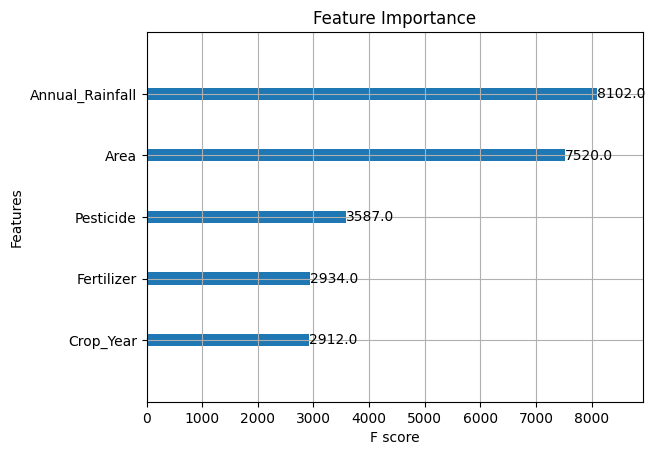

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb

# ---------------------------
# 1. Data Loading & Exploration
# ---------------------------
# Load the dataset (make sure 'crop_yield.csv' is in your working directory)
df = pd.read_csv("crop_yield.csv")

# Inspect the dataset (assumed columns: Crop, Crop_Year, Season, State, Area, Production,
# Annual_Rainfall, Fertilizer, Pesticide, Yield)
print(df.head())
print(df.info())

# ---------------------------
# 2. Preprocessing & Feature Engineering
# ---------------------------
# For yield prediction, we focus on numeric features.
# Here we choose Crop_Year, Area, Annual_Rainfall, Fertilizer, and Pesticide.
features = ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
X = df[features]
y = df['Yield']

# Optionally, check for and handle missing values.
print("Missing values:\n", df[features].isnull().sum())

# ---------------------------
# 3. Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 4. Model Training with XGBoost Regressor
# ---------------------------
# The notebook you referenced achieved high accuracy (97% R2 score in some cases) using an XGBoost model.
# Here we set up a regressor with tuned hyperparameters.
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

xgb_reg.fit(X_train, y_train)

# ---------------------------
# 5. Model Evaluation
# ---------------------------
y_pred = xgb_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

# Optional: Evaluate using cross-validation to check model stability.
cv_scores = cross_val_score(xgb_reg, X, y, cv=5, scoring='r2')
print("CV R2 scores:", cv_scores)
print("Mean CV R2 score:", np.mean(cv_scores))

# ---------------------------
# 6. Feature Importance Plot
# ---------------------------
xgb.plot_importance(xgb_reg)
plt.title("Feature Importance")
plt.show()


First few rows of the dataset:
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -

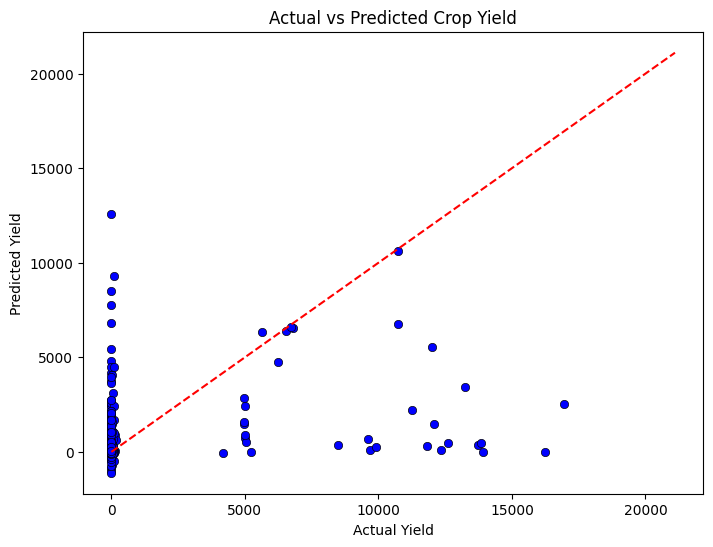

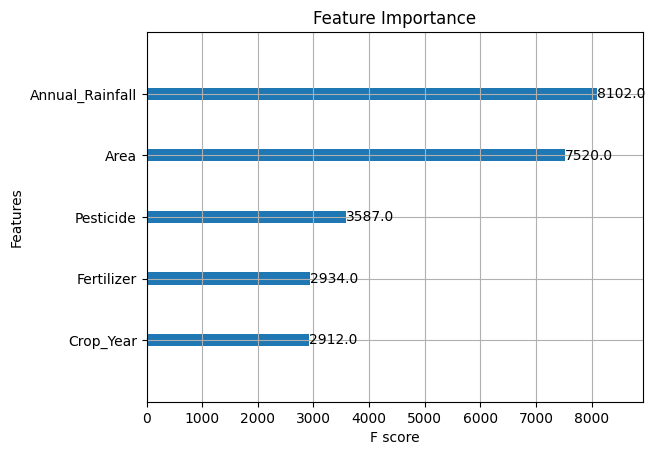


Predicted Yield for Sample Input: -78.02


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------------------------
# 1. Data Loading & Exploration
# ---------------------------
# Ensure the dataset 'crop_yield.csv' is in your working directory.
df = pd.read_csv("crop_yield.csv")

print("First few rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())

# ---------------------------
# 2. Preprocessing & Feature Engineering
# ---------------------------
# For yield prediction, we use numeric features.
# Here we select: Crop_Year, Area, Annual_Rainfall, Fertilizer, and Pesticide.
features = ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
X = df[features]
y = df['Yield']

# Check for missing values (if any, you may need to handle them)
print("\nMissing values in features:")
print(X.isnull().sum())

# ---------------------------
# 3. Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 4. Model Training with XGBoost Regressor
# ---------------------------
# Setup the XGBoost regressor with tuned hyperparameters.
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

# Train the model
xgb_reg.fit(X_train, y_train)

# ---------------------------
# 5. Model Evaluation
# ---------------------------
# Predict on test set
y_pred = xgb_reg.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Performance on Test Set:")
print("R2 Score: {:.4f}".format(r2))
print("Mean Absolute Error: {:.4f}".format(mae))
print("Mean Squared Error: {:.4f}".format(mse))

# Optional: Perform cross-validation to check model stability.
cv_scores = cross_val_score(xgb_reg, X, y, cv=5, scoring='r2')
print("\nCross-Validation R2 scores:", cv_scores)
print("Mean Cross-Validation R2 score: {:.4f}".format(np.mean(cv_scores)))

# ---------------------------
# 6. Visualization
# ---------------------------
# Plot Actual vs Predicted Yield
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='k')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line for reference
plt.show()

# Plot Feature Importance from XGBoost
xgb.plot_importance(xgb_reg)
plt.title("Feature Importance")
plt.show()

# ---------------------------
# 7. Sample Input Prediction
# ---------------------------
# Sample input details (modify as desired):
# - Crop_Year: 2021 (assumed planned year)
# - Area: 1500 hectares
# - Annual_Rainfall: 2100 mm
# - Fertilizer: 500000 units
# - Pesticide: 3000 units
sample_input = pd.DataFrame({
    'Crop_Year': [2021],
    'Area': [1500],
    'Annual_Rainfall': [2100],
    'Fertilizer': [500000],
    'Pesticide': [3000]
})

predicted_yield = xgb_reg.predict(sample_input)[0]
print("\nPredicted Yield for Sample Input: {:.2f}".format(predicted_yield))


First few rows of the dataset:
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -

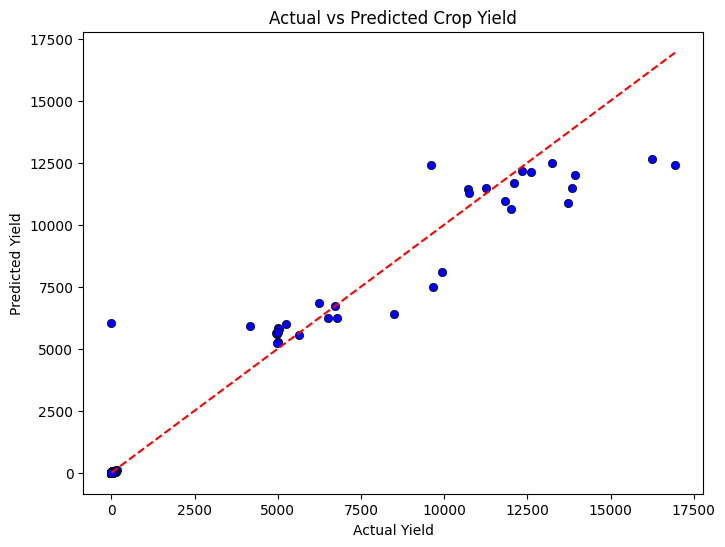


Predicted Yield for Sample Input: 0.92


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# ---------------------------
# 1. Data Loading & Exploration
# ---------------------------
df = pd.read_csv("crop_yield.csv")

print("First few rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())

# ---------------------------
# 2. Feature Engineering & Transformation
# ---------------------------
# Clean the categorical features to ensure consistency
df['Season'] = df['Season'].str.strip().str.lower()
df['State'] = df['State'].str.strip().str.lower()
df['Crop'] = df['Crop'].str.strip()

# Include the crop type as a feature and apply a log transformation on Yield
numeric_features = ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
categorical_features = ['Season', 'State', 'Crop']

df['log_Yield'] = np.log1p(df['Yield'])

# ---------------------------
# 3. Preprocessing Pipeline
# ---------------------------
# Set handle_unknown='ignore' to avoid errors on unseen categories.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

# ---------------------------
# 4. Train-Test Split
# ---------------------------
X = df[numeric_features + categorical_features]
y = df['log_Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 5. Model Training with XGBoost Regressor
# ---------------------------
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=500,
        max_depth=6,
        learning_rate=0.05,
        random_state=42
    ))
])

pipeline.fit(X_train, y_train)

# ---------------------------
# 6. Model Evaluation
# ---------------------------
y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print("\nModel Performance on Test Set:")
print("R2 Score: {:.4f}".format(r2))
print("Mean Absolute Error: {:.4f}".format(mae))
print("Mean Squared Error: {:.4f}".format(mse))

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print("\nCross-Validation R2 scores:", cv_scores)
print("Mean Cross-Validation R2 score: {:.4f}".format(np.mean(cv_scores)))

# ---------------------------
# 7. Visualization
# ---------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_true, y=y_pred, color='blue', edgecolor='k')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.show()

# ---------------------------
# 8. Sample Input Prediction (Corrected)
# ---------------------------
# Sample input details:
# - Crop_Year: 2021
# - Area: 1500 hectares
# - Annual_Rainfall: 2100 mm
# - Fertilizer: 500000 units
# - Pesticide: 3000 units
# - Season: 'Kharif'
# - State: 'Assam'
# - Crop: 'Cotton(lint)' (ensure this exists in your dataset)
sample_data = {
    'Crop_Year': [2021],
    'Area': [1500],
    'Annual_Rainfall': [2100],
    'Fertilizer': [500000],
    'Pesticide': [3000],
    'Season': ['Kharif'],
    'State': ['Assam'],
    'Crop': ['Cotton(lint)']
}
sample_df = pd.DataFrame(sample_data)

# Clean sample input to match training data formatting
sample_df['Season'] = sample_df['Season'].str.strip().str.lower()
sample_df['State'] = sample_df['State'].str.strip().str.lower()
sample_df['Crop'] = sample_df['Crop'].str.strip()

sample_pred_log = pipeline.predict(sample_df)[0]
sample_yield_pred = np.expm1(sample_pred_log)
print("\nPredicted Yield for Sample Input: {:.2f}".format(sample_yield_pred))


In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error

# ---------------------------
# 1. Data Loading & Preprocessing
# ---------------------------
df = pd.read_csv("crop_yield.csv")

# Clean categorical columns for consistency.
df['Season'] = df['Season'].str.strip().str.lower()
df['State'] = df['State'].str.strip().str.lower()
df['Crop'] = df['Crop'].str.strip()

# ---------------------------
# 2. Crop Recommendation Model (Classification)
# ---------------------------
# We'll use these features for crop recommendation:
# Crop_Year, Area, Annual_Rainfall, Fertilizer, Pesticide, Season, State
features_rec = ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Season', 'State']
X_rec = df[features_rec]
y_rec = df['Crop']

# Label encode the target crop names.
le_crop = LabelEncoder()
y_rec_encoded = le_crop.fit_transform(y_rec)

# Preprocessing: numeric and categorical parts.
preprocessor_rec = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Season', 'State'])
    ]
)

# Build a classification pipeline using XGBoost.
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_rec),
    ('classifier', xgb.XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ))
])

# Split data for classification.
X_train_rec, X_test_rec, y_train_rec, y_test_rec = train_test_split(
    X_rec, y_rec_encoded, test_size=0.2, random_state=42, stratify=y_rec_encoded
)
clf_pipeline.fit(X_train_rec, y_train_rec)
y_pred_rec = clf_pipeline.predict(X_test_rec)
accuracy = accuracy_score(y_test_rec, y_pred_rec)
print("Crop Recommendation Model Accuracy: {:.2f}%".format(accuracy * 100))

# ---------------------------
# 3. Yield Prediction Model (Regression)
# ---------------------------
# To better predict yield, we include the crop type (which the model learns to differentiate)
# and apply a log transformation on Yield.
df['log_Yield'] = np.log1p(df['Yield'])

# For yield prediction, use all these features:
# Crop_Year, Area, Annual_Rainfall, Fertilizer, Pesticide, Season, State, Crop
features_yield = ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Season', 'State', 'Crop']
X_yield = df[features_yield]
y_yield = df['log_Yield']

# Preprocessing for yield prediction.
preprocessor_yield = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Season', 'State', 'Crop'])
    ]
)

reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_yield),
    ('regressor', xgb.XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        random_state=42,
        objective='reg:squarederror'
    ))
])

# Split data for yield prediction.
X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(
    X_yield, y_yield, test_size=0.2, random_state=42
)
reg_pipeline.fit(X_train_yield, y_train_yield)
y_pred_yield_log = reg_pipeline.predict(X_test_yield)
# Revert log transformation.
y_pred_yield = np.expm1(y_pred_yield_log)
y_true_yield = np.expm1(y_test_yield)

r2 = r2_score(y_true_yield, y_pred_yield)
mae = mean_absolute_error(y_true_yield, y_pred_yield)
print("Yield Prediction Model R2 Score: {:.4f}".format(r2))
print("Yield Prediction Model MAE: {:.4f}".format(mae))

# ---------------------------
# 4. Sample Input for Both Models
# ---------------------------
# Suppose we have a new field with the following details:
# - Crop_Year: 2021
# - Area: 1500 hectares
# - Annual_Rainfall: 2100 mm
# - Fertilizer: 500000 units
# - Pesticide: 3000 units
# - Season: 'Kharif'
# - State: 'Assam'
sample_input = pd.DataFrame({
    'Crop_Year': [2021],
    'Area': [1500],
    'Annual_Rainfall': [2100],
    'Fertilizer': [500000],
    'Pesticide': [3000],
    'Season': ['Kharif'],
    'State': ['Assam']
})
# Clean sample input similar to training data.
sample_input['Season'] = sample_input['Season'].str.strip().str.lower()
sample_input['State'] = sample_input['State'].str.strip().str.lower()

# --- Crop Recommendation ---
# Use the crop recommendation pipeline to predict the recommended crop.
rec_crop_encoded = clf_pipeline.predict(sample_input)[0]
rec_crop = le_crop.inverse_transform([rec_crop_encoded])[0]
print("\nRecommended Crop:", rec_crop)

# --- Yield Prediction ---
# For yield prediction, include the recommended crop as an additional feature.
sample_input_yield = sample_input.copy()
sample_input_yield['Crop'] = rec_crop  # Append the recommended crop to the sample input.
# Predict log-yield and then revert transformation.
sample_yield_log = reg_pipeline.predict(sample_input_yield)[0]
sample_yield = np.expm1(sample_yield_log)
print("Predicted Yield:", sample_yield)


C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:26:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Crop Recommendation Model Accuracy: 48.43%
Yield Prediction Model R2 Score: 0.9450
Yield Prediction Model MAE: 14.3335

Recommended Crop: Cotton(lint)
Predicted Yield: 0.93602896


In [17]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error

# ---------------------------
# 1. Data Loading & Preprocessing
# ---------------------------
df = pd.read_csv("crop_yield.csv")

# Clean categorical columns for consistency.
df['Season'] = df['Season'].str.strip().str.lower()
df['State'] = df['State'].str.strip().str.lower()
df['Crop'] = df['Crop'].str.strip()

# ---------------------------
# 2. Crop Recommendation Model (Classification)
# ---------------------------
# Use features: Crop_Year, Area, Annual_Rainfall, Fertilizer, Pesticide, Season, and State.
features_rec = ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Season', 'State']
X_rec = df[features_rec]
y_rec = df['Crop']

# Label encode the target crop names.
le_crop = LabelEncoder()
y_rec_encoded = le_crop.fit_transform(y_rec)

# Preprocessing: Standardize numeric features and one‑hot encode categorical ones.
preprocessor_rec = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Season', 'State'])
    ]
)

# Build a classification pipeline using XGBoost.
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_rec),
    ('classifier', xgb.XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ))
])

# Split data for classification.
X_train_rec, X_test_rec, y_train_rec, y_test_rec = train_test_split(
    X_rec, y_rec_encoded, test_size=0.2, random_state=42, stratify=y_rec_encoded
)
clf_pipeline.fit(X_train_rec, y_train_rec)
y_pred_rec = clf_pipeline.predict(X_test_rec)
accuracy = accuracy_score(y_test_rec, y_pred_rec)
print("Crop Recommendation Model Accuracy: {:.2f}%".format(accuracy * 100))

# ---------------------------
# 3. Yield Prediction Model (Regression)
# ---------------------------
# We apply a log transformation on Yield to handle its wide range.
df['log_Yield'] = np.log1p(df['Yield'])

# For yield prediction, we use additional information by including Crop as a feature.
features_yield = ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Season', 'State', 'Crop']
X_yield = df[features_yield]
y_yield = df['log_Yield']

# Preprocessing: Standardize numeric features and one‑hot encode the categorical ones.
preprocessor_yield = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Season', 'State', 'Crop'])
    ]
)

# Build a regression pipeline using XGBoost.
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_yield),
    ('regressor', xgb.XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        random_state=42,
        objective='reg:squarederror'
    ))
])

# Split data for regression.
X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(
    X_yield, y_yield, test_size=0.2, random_state=42
)
reg_pipeline.fit(X_train_yield, y_train_yield)
y_pred_yield_log = reg_pipeline.predict(X_test_yield)
# Revert log transformation to get yield in original scale.
y_pred_yield = np.expm1(y_pred_yield_log)
y_true_yield = np.expm1(y_test_yield)

r2 = r2_score(y_true_yield, y_pred_yield)
mae = mean_absolute_error(y_true_yield, y_pred_yield)
print("Yield Prediction Model R2 Score: {:.4f}".format(r2))
print("Yield Prediction Model MAE: {:.4f}".format(mae))

# ---------------------------
# 4. Sample Input for Both Models
# ---------------------------
# Suppose we have a new field with:
# - Crop_Year: 2021
# - Area: 1500 hectares
# - Annual_Rainfall: 2100 mm
# - Fertilizer: 500000 units
# - Pesticide: 3000 units
# - Season: 'Kharif'
# - State: 'Assam'
sample_input = pd.DataFrame({
    'Crop_Year': [2021],
    'Area': [1500],
    'Annual_Rainfall': [2100],
    'Fertilizer': [500000],
    'Pesticide': [3000],
    'Season': ['Kharif'],
    'State': ['Assam']
})
# Clean the sample input to match training data.
sample_input['Season'] = sample_input['Season'].str.strip().str.lower()
sample_input['State'] = sample_input['State'].str.strip().str.lower()

# --- Crop Recommendation ---
# Predict the recommended crop.
rec_crop_encoded = clf_pipeline.predict(sample_input)[0]
rec_crop = le_crop.inverse_transform([rec_crop_encoded])[0]
print("\nRecommended Crop:", rec_crop)

# --- Yield Prediction ---
# For yield prediction, add the recommended crop to the sample input.
sample_input_yield = sample_input.copy()
sample_input_yield['Crop'] = rec_crop  # include the recommended crop
# Predict log-yield and convert back to the original scale.
sample_yield_log = reg_pipeline.predict(sample_input_yield)[0]
sample_yield = np.expm1(sample_yield_log)
print("Predicted Yield:", sample_yield)


Crop Recommendation Model Accuracy: 48.43%
Yield Prediction Model R2 Score: 0.9450
Yield Prediction Model MAE: 14.3335

Recommended Crop: Cotton(lint)
Predicted Yield: 0.93602896


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Load the dataset
data = pd.read_csv('crop_yield2.csv')

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Encode categorical variables
label_encoder_season = LabelEncoder()
label_encoder_state = LabelEncoder()
data['Season'] = label_encoder_season.fit_transform(data['Season'])
data['State'] = label_encoder_state.fit_transform(data['State'])

# Features and target variables
X = data[['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Season', 'State']]
y_crop = data['Crop']
y_yield = data['Yield']

# Split the data into training and testing sets
X_train, X_test, y_crop_train, y_crop_test, y_yield_train, y_yield_test = train_test_split(
    X, y_crop, y_yield, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crop Prediction Model (Random Forest Classifier)
crop_model = RandomForestClassifier(random_state=42)
crop_model.fit(X_train_scaled, y_crop_train)
y_crop_pred = crop_model.predict(X_test_scaled)

# Evaluate Crop Prediction Model
accuracy = accuracy_score(y_crop_test, y_crop_pred)
precision = precision_score(y_crop_test, y_crop_pred, average='weighted')
recall = recall_score(y_crop_test, y_crop_pred, average='weighted')
f1 = f1_score(y_crop_test, y_crop_pred, average='weighted')

print("Crop Prediction Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Yield Prediction Model (Random Forest Regressor)
yield_model = RandomForestRegressor(random_state=42)
yield_model.fit(X_train_scaled, y_yield_train)
y_yield_pred = yield_model.predict(X_test_scaled)

# Evaluate Yield Prediction Model
rmse = np.sqrt(mean_squared_error(y_yield_test, y_yield_pred))
print("\nYield Prediction Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Crop Prediction Model Performance:
Accuracy: 0.4759
Precision: 0.4758
Recall: 0.4759
F1-Score: 0.4735

Yield Prediction Model Performance:
Root Mean Squared Error (RMSE): 594.1639


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
import numpy as np

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
X_class = df.drop(columns=["Crop"])
y_class = df["Crop"]
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]

# Standardize numerical features
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)
X_reg_scaled = scaler.fit_transform(X_reg)

# Split dataset
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Train classification model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Compute Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Train regression model
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Compute Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Print results
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Recommend crop and yield for a sample input
def recommend_crop_and_yield(sample_input):
    sample_scaled_class = scaler.transform([sample_input])
    sample_scaled_reg = scaler.transform([sample_input])
    recommended_crop = clf.predict(sample_scaled_class)[0]
    predicted_yield = reg.predict(sample_scaled_reg)[0]
    recommended_crop_name = label_encoders["Crop"].inverse_transform([recommended_crop])[0]
    print(f"\nRecommended Crop: {recommended_crop_name}")
    print(f"Expected Yield: {predicted_yield:.2f} tons/ha")
    return recommended_crop_name, predicted_yield

# Example usage
sample_input = X_class.iloc[0].values  # Taking first row as a sample
recommend_crop_and_yield(sample_input)


Classification Metrics:
Accuracy: 0.70
Precision: 0.70
Recall: 0.70
F1-score: 0.70

Regression Metrics:
Mean Squared Error: 16940.15
R² Score: 0.98

Recommended Crop: Soyabean
Expected Yield: 1.07 tons/ha


C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


('Soyabean', 1.0705617964900005)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
X = df.drop(columns=["Crop"])
y = df["Crop"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classification model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
X_class = df.drop(columns=["Crop", "Yield"])  # Features for crop classification
y_class = df["Crop"]  # Target for crop classification
X_reg = df.drop(columns=["Crop", "Yield"])  # Features for yield regression
y_reg = df["Yield"]  # Target for yield regression

# Standardize numerical features
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)
X_reg_scaled = scaler.fit_transform(X_reg)

# Split dataset
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Check Class Distribution
print("Crop Class Distribution:")
print(df["Crop"].value_counts())

# Handle class imbalance using SMOTE or Random Over-sampling
min_samples = df["Crop"].value_counts().min()
n_neighbors = min(5, min_samples - 1)  # Ensure n_neighbors < min_samples

if n_neighbors < 1:
    print("Some classes have too few samples for SMOTE. Using Random Over-sampling instead.")
    ros = RandomOverSampler(random_state=42)
    Xc_train_res, yc_train_res = ros.fit_resample(Xc_train, yc_train)
else:
    print(f"Using SMOTE with n_neighbors={n_neighbors}.")
    smote = SMOTE(random_state=42, n_neighbors=n_neighbors)
    Xc_train_res, yc_train_res = smote.fit_resample(Xc_train, yc_train)

# Hyperparameter Tuning for Classification (XGBoost)
param_grid_class = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search_class = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), 
                                param_grid_class, cv=5, scoring='accuracy')
grid_search_class.fit(Xc_train_res, yc_train_res)
print("Best parameters for classification:", grid_search_class.best_params_)
clf = grid_search_class.best_estimator_

# Train classification model
clf.fit(Xc_train_res, yc_train_res)
yc_pred = clf.predict(Xc_test)

# Compute Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Confusion Matrix
cm = confusion_matrix(yc_test, yc_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Analysis
feature_importances = pd.Series(clf.feature_importances_, index=X_class.columns)
feature_importances.sort_values().plot(kind="barh", title="Feature Importance")
plt.show()

# Hyperparameter Tuning for Regression (XGBoost)
param_grid_reg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search_reg = GridSearchCV(XGBRegressor(random_state=42), param_grid_reg, cv=5, scoring='r2')
grid_search_reg.fit(Xr_train, yr_train)
print("Best parameters for regression:", grid_search_reg.best_params_)
reg = grid_search_reg.best_estimator_

# Train regression model
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Compute Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Print results
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Recommend crop and yield for a sample input
def recommend_crop_and_yield(sample_input):
    sample_scaled_class = scaler.transform([sample_input])
    sample_scaled_reg = scaler.transform([sample_input])
    recommended_crop = clf.predict(sample_scaled_class)[0]
    predicted_yield = reg.predict(sample_scaled_reg)[0]
    recommended_crop_name = label_encoders["Crop"].inverse_transform([recommended_crop])[0]
    print(f"\nRecommended Crop: {recommended_crop_name}")
    print(f"Expected Yield: {predicted_yield:.2f} tons/ha")
    return recommended_crop_name, predicted_yield

# Example usage with a custom sample input
sample_input = [100, 1200, 50, 10, 1, 5]  # Example: [Area, Annual Rainfall, Fertiliser, Pesticide, Season, State]
recommend_crop_and_yield(sample_input)

Crop Class Distribution:
Crop
40    1197
24     975
27     740
52     733
17     725
43     685
37     628
46     605
53     545
39     528
2      524
20     513
1      508
38     498
16     490
44     485
11     476
31     454
47     441
13     419
34     382
19     371
36     369
50     364
32     355
45     349
51     337
25     324
15     323
23     308
8      300
4      297
48     273
14     250
3      245
26     210
49     201
10     199
29     192
21     181
9      172
41     169
0      162
42     160
33     146
12     134
7      134
5      126
54     126
28     110
22      75
6       74
18      63
30      29
35      10
Name: count, dtype: int64
Using SMOTE with n_neighbors=5.


TypeError: SMOTE.__init__() got an unexpected keyword argument 'n_neighbors'

Classification Metrics:
Accuracy: 0.49
Precision: 0.49
Recall: 0.49
F1-score: 0.49


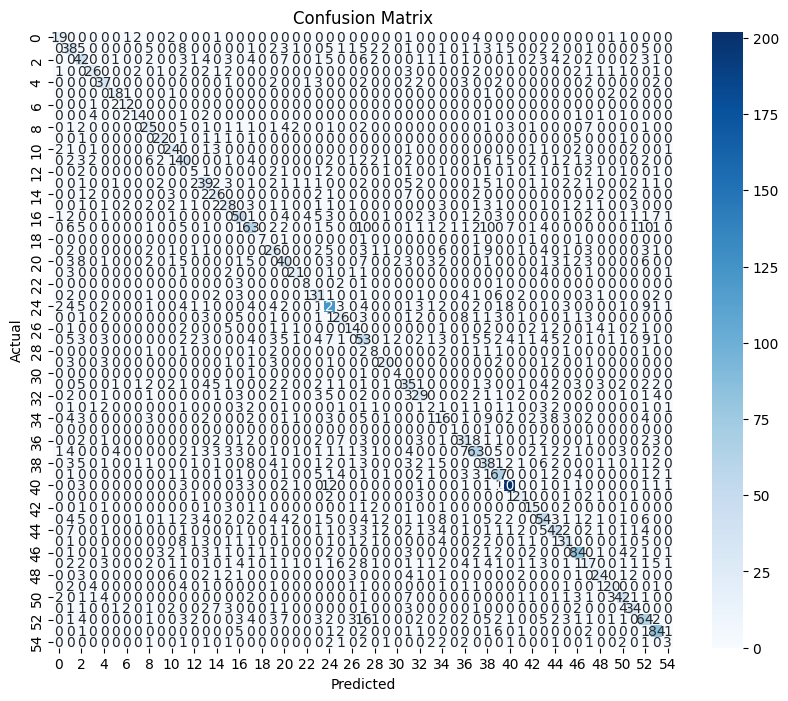


Regression Metrics:
Mean Squared Error: 16940.15
R² Score: 0.98


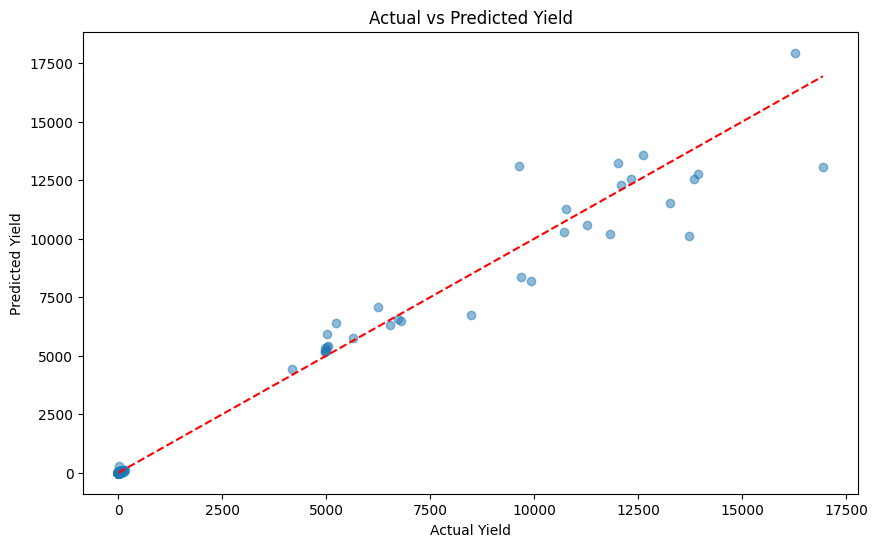

ValueError: y contains previously unseen labels: 'Kharif'

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    r2_score,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Preprocess the Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
X_class = df.drop(columns=["Crop", "Yield"])  # Features for classification
y_class = df["Crop"]  # Target for classification
X_reg = df.drop(columns=["Yield"])  # Features for regression
y_reg = df["Yield"]  # Target for regression

# Feature scaling
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)
X_reg_scaled = scaler.fit_transform(X_reg)

# Split dataset
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class_scaled, y_class, test_size=0.2, stratify=y_class, random_state=42
)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

# Step 2: Train Models
# Classification Model
clf = RandomForestClassifier(random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Regression Model
reg = RandomForestRegressor(random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Step 3: Evaluate Models
# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

print("Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(yr_test, yr_pred, alpha=0.5)
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], "r--")  # Diagonal line
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.show()

# Step 4: Recommend Crop and Predict Yield
def recommend_crop_and_yield(sample_input):
    sample_scaled_class = scaler.transform([sample_input])
    sample_scaled_reg = scaler.transform([sample_input])
    
    # Predict crop
    recommended_crop = clf.predict(sample_scaled_class)[0]
    recommended_crop_name = label_encoders["Crop"].inverse_transform([recommended_crop])[0]
    
    # Predict yield
    predicted_yield = reg.predict(sample_scaled_reg)[0]
    
    print(f"\nRecommended Crop: {recommended_crop_name}")
    print(f"Expected Yield: {predicted_yield:.2f} tons/ha")
    return recommended_crop_name, predicted_yield

# Example Usage: Custom Input
custom_input = {
    "Area": 5000,
    "Annual_Rainfall": 1500,
    "Fertilizer": 100000,
    "Pesticide": 5000,
    "Season": label_encoders["Season"].transform(["Kharif"])[0],  # Encode season
    "State": label_encoders["State"].transform(["Assam"])[0],      # Encode state
}

# Convert to list in the same order as feature columns
sample_input = [custom_input[col] for col in X_class.columns]

# Call the recommendation function
recommend_crop_and_yield(sample_input)

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Fit on the entire column
    label_encoders[col] = le

# Define features and target variables
X_class = df.drop(columns=["Crop", "Yield"])  # Features for classification
y_class = df["Crop"]  # Target for classification
X_reg = df.drop(columns=["Yield"])  # Features for regression
y_reg = df["Yield"]  # Target for regression

# Feature scaling
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)
X_reg_scaled = scaler.fit_transform(X_reg)

# Split dataset
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class_scaled, y_class, test_size=0.2, stratify=y_class, random_state=42
)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

# Train models
clf = RandomForestClassifier(random_state=42)
clf.fit(Xc_train, yc_train)

reg = RandomForestRegressor(random_state=42)
reg.fit(Xr_train, yr_train)

# Evaluate models
yc_pred = clf.predict(Xc_test)
yr_pred = reg.predict(Xr_test)

# Classification metrics
accuracy = accuracy_score(yc_test, yc_pred)
print(f"Classification Accuracy: {accuracy:.2f}")

# Regression metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)
print(f"Regression MSE: {mse:.2f}, R²: {r2:.2f}")

# Recommend crop and predict yield
def recommend_crop_and_yield(sample_input):
    sample_scaled_class = scaler.transform([sample_input])
    sample_scaled_reg = scaler.transform([sample_input])
    
    # Predict crop
    recommended_crop = clf.predict(sample_scaled_class)[0]
    recommended_crop_name = label_encoders["Crop"].inverse_transform([recommended_crop])[0]
    
    # Predict yield
    predicted_yield = reg.predict(sample_scaled_reg)[0]
    
    print(f"\nRecommended Crop: {recommended_crop_name}")
    print(f"Expected Yield: {predicted_yield:.2f} tons/ha")
    return recommended_crop_name, predicted_yield

# Example Usage: Custom Input
custom_input = {
    "Area": 5000,
    "Annual_Rainfall": 1500,
    "Fertilizer": 100000,
    "Pesticide": 5000,
    "Season": "Kharif",
    "State": "Assam",
}

# Convert categorical inputs to their encoded values
custom_input_encoded = {
    "Area": custom_input["Area"],
    "Annual_Rainfall": custom_input["Annual_Rainfall"],
    "Fertilizer": custom_input["Fertilizer"],
    "Pesticide": custom_input["Pesticide"],
    "Season": label_encoders["Season"].transform([custom_input["Season"]])[0],
    "State": label_encoders["State"].transform([custom_input["State"]])[0],
}

# Convert to list in the same order as feature columns
sample_input = [custom_input_encoded[col] for col in X_class.columns]

# Call the recommendation function
recommend_crop_and_yield(sample_input)

Classification Accuracy: 0.49
Regression MSE: 16940.15, R²: 0.98


ValueError: y contains previously unseen labels: 'Kharif'

Crop Class Distribution:
Crop
40    619
24    490
27    392
43    359
52    355
17    333
37    316
46    299
53    276
39    259
20    258
2     258
16    257
38    253
1     248
11    248
44    241
31    222
13    221
47    219
32    189
19    188
36    188
34    185
50    178
15    173
25    169
45    162
51    154
8     150
4     146
23    145
48    131
3     117
14    114
10    112
26    106
49     96
29     92
41     87
21     86
0      85
33     80
9      78
12     73
42     68
54     66
7      64
28     58
5      55
22     45
6      31
18     31
30     12
35      7
Name: count, dtype: int64


C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'max_depth': None}


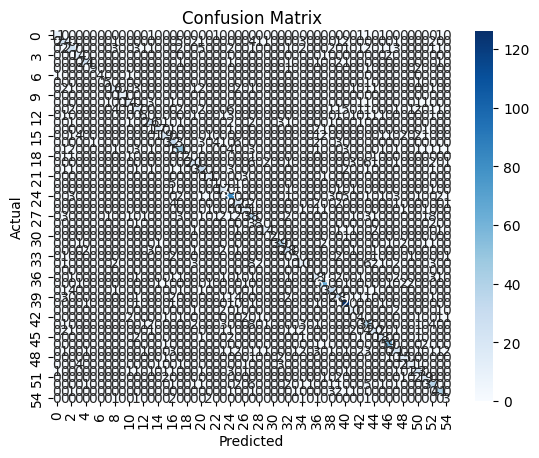

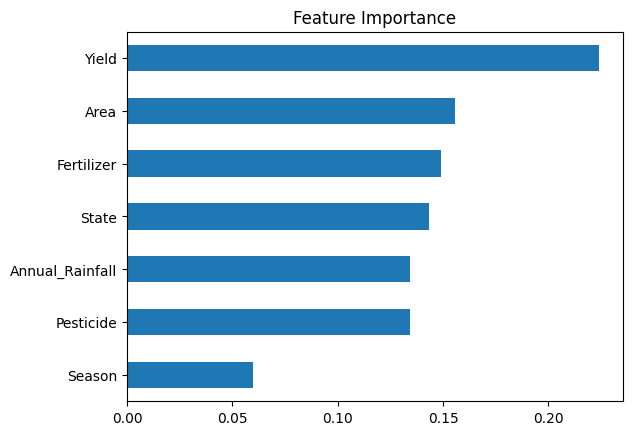

Classification Metrics:
Accuracy: 0.64
Precision: 0.64
Recall: 0.64
F1-score: 0.64

Regression Metrics:
Mean Squared Error: 10785.26
R² Score: 0.97

Recommended Crop: Rice
Expected Yield: 4.12 tons/ha


C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


('Rice', 4.1239763826427245)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Reduce dataset size for faster testing (Optional)
df = df.sample(frac=0.5, random_state=42)  # Using 50% of data

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
X_class = df.drop(columns=["Crop"])
y_class = df["Crop"]
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]

# Standardize numerical features
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)
X_reg_scaled = scaler.fit_transform(X_reg)

# Split dataset
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Check Class Distribution
print("Crop Class Distribution:")
print(df["Crop"].value_counts())

# Hyperparameter Tuning (Optimized with RandomizedSearchCV)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None]
}

grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, n_iter=5, cv=3, random_state=42)
grid_search.fit(Xc_train, yc_train)
print("Best parameters:", grid_search.best_params_)
clf = grid_search.best_estimator_

# Train classification model
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Compute Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Confusion Matrix
cm = confusion_matrix(yc_test, yc_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Analysis
feature_importances = pd.Series(clf.feature_importances_, index=X_class.columns)
feature_importances.sort_values().plot(kind="barh", title="Feature Importance")
plt.show()

# Train regression model with optimized parameters
reg = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Compute Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Print results
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Recommend crop and yield for a sample input
def recommend_crop_and_yield(sample_input):
    sample_scaled_class = scaler.transform([sample_input])
    sample_scaled_reg = scaler.transform([sample_input])
    recommended_crop = clf.predict(sample_scaled_class)[0]
    predicted_yield = reg.predict(sample_scaled_reg)[0]
    recommended_crop_name = label_encoders["Crop"].inverse_transform([recommended_crop])[0]
    print(f"\nRecommended Crop: {recommended_crop_name}")
    print(f"Expected Yield: {predicted_yield:.2f} tons/ha")
    return recommended_crop_name, predicted_yield

# Example usage
sample_input = X_class.iloc[0].values  # Taking first row as a sample
recommend_crop_and_yield(sample_input)


Crop Class Distribution:
Crop
40    619
24    490
27    392
43    359
52    355
17    333
37    316
46    299
53    276
39    259
20    258
2     258
16    257
38    253
1     248
11    248
44    241
31    222
13    221
47    219
32    189
19    188
36    188
34    185
50    178
15    173
25    169
45    162
51    154
8     150
4     146
23    145
48    131
3     117
14    114
10    112
26    106
49     96
29     92
41     87
21     86
0      85
33     80
9      78
12     73
42     68
54     66
7      64
28     58
5      55
22     45
6      31
18     31
30     12
35      7
Name: count, dtype: int64
Best parameters: {'n_estimators': 200, 'max_depth': None, 'class_weight': 'balanced'}


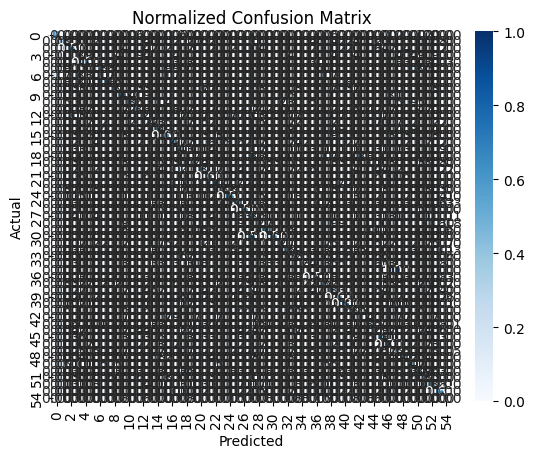

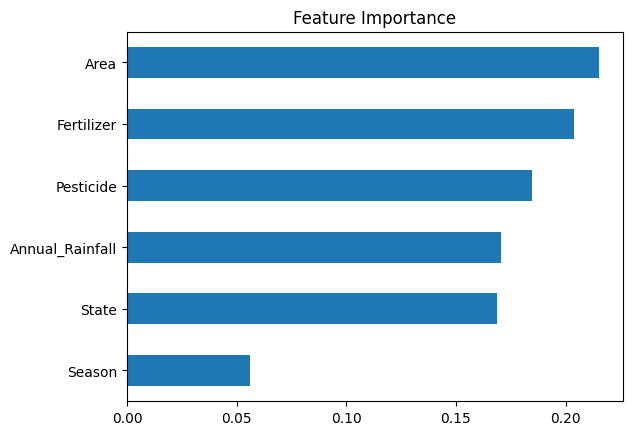

Classification Metrics:
Accuracy: 0.44
Precision: 0.44
Recall: 0.44
F1-score: 0.44

Regression Metrics:
Mean Squared Error: 191143.01
R² Score: 0.50

Recommended Crop: Peas & beans (Pulses)
Expected Yield: 0.87 tons/ha


C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


('Peas & beans (Pulses)', 0.8689826313792295)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Reduce dataset size for faster testing (Optional)
df = df.sample(frac=0.5, random_state=42)  # Using 50% of data

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
X = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
y_reg = df["Yield"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset with stratification
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_scaled, y_class, test_size=0.2, stratify=y_class, random_state=42
)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_scaled, y_reg, test_size=0.2, random_state=42
)

# Check Class Distribution
print("Crop Class Distribution:")
print(df["Crop"].value_counts())

# Hyperparameter Tuning (Optimized with RandomizedSearchCV)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'class_weight': ["balanced", "balanced_subsample"]
}

grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid, n_iter=5, cv=3, random_state=42)
grid_search.fit(Xc_train, yc_train)
print("Best parameters:", grid_search.best_params_)
clf = grid_search.best_estimator_

# Train classification model
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Compute Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Confusion Matrix Normalized
cm = confusion_matrix(yc_test, yc_pred, normalize='true')
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Feature Importance Analysis
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind="barh", title="Feature Importance")
plt.show()

# Train regression model with optimized parameters
reg = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Compute Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Print results
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Recommend crop and yield for a sample input
def recommend_crop_and_yield(sample_input):
    sample_scaled = scaler.transform([sample_input])
    recommended_crop = clf.predict(sample_scaled)[0]
    predicted_yield = reg.predict(sample_scaled)[0]
    recommended_crop_name = label_encoders["Crop"].inverse_transform([recommended_crop])[0]
    print(f"\nRecommended Crop: {recommended_crop_name}")
    print(f"Expected Yield: {predicted_yield:.2f} tons/ha")
    return recommended_crop_name, predicted_yield

# Example usage
sample_input = X.iloc[0].values  # Taking first row as a sample
recommend_crop_and_yield(sample_input)


Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': 'balanced_subsample'}


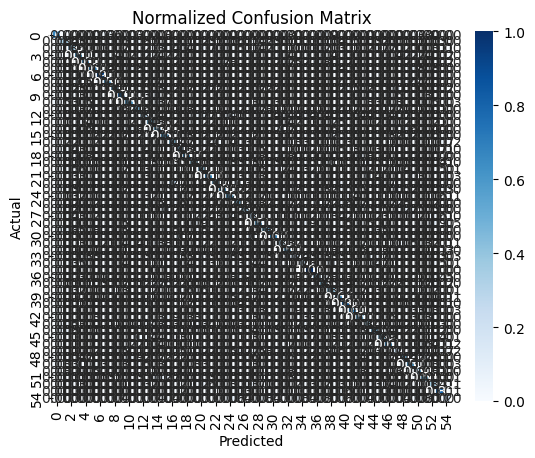

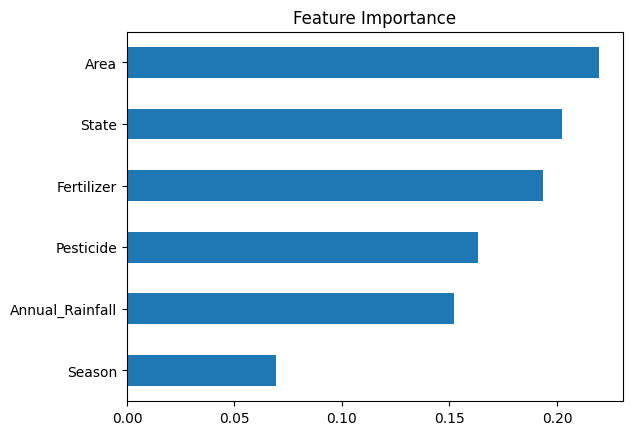

Classification Metrics:
Accuracy: 0.49
Precision: 0.50
Recall: 0.49
F1-score: 0.49

Regression Metrics:
Mean Squared Error: 336307.38
R² Score: 0.58

Recommended Crop: Arecanut
Expected Yield: 1.58 tons/ha


C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


('Arecanut', 1.5847493664233308)

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
X = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
y_reg = df["Yield"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset with stratification
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_scaled, y_class, test_size=0.2, stratify=y_class, random_state=42
)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_scaled, y_reg, test_size=0.2, random_state=42
)

# Hyperparameter Tuning (Optimized with RandomizedSearchCV)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ["balanced", "balanced_subsample"]
}

grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid, n_iter=10, cv=5, random_state=42)
grid_search.fit(Xc_train, yc_train)
print("Best parameters:", grid_search.best_params_)
clf = grid_search.best_estimator_

# Train classification model
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Compute Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Confusion Matrix Normalized
cm = confusion_matrix(yc_test, yc_pred, normalize='true')
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Feature Importance Analysis
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind="barh", title="Feature Importance")
plt.show()

# Train regression model with optimized parameters
reg = RandomForestRegressor(n_estimators=300, max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=42, n_jobs=-1)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Compute Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Print results
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Recommend crop and yield for a sample input
def recommend_crop_and_yield(sample_input):
    sample_scaled = scaler.transform([sample_input])
    recommended_crop = clf.predict(sample_scaled)[0]
    predicted_yield = reg.predict(sample_scaled)[0]
    recommended_crop_name = label_encoders["Crop"].inverse_transform([recommended_crop])[0]
    print(f"\nRecommended Crop: {recommended_crop_name}")
    print(f"Expected Yield: {predicted_yield:.2f} tons/ha")
    return recommended_crop_name, predicted_yield

# Example usage
sample_input = X.iloc[0].values  # Taking first row as a sample
recommend_crop_and_yield(sample_input)



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
           1       0.56      0.57      0.57       107
           2       0.52      0.55      0.53        99
           3       0.88      0.95      0.91        56
           4       0.77      0.77      0.77        52
           5       0.83      0.68      0.75        22
           6       0.88      0.88      0.88        17
           7       0.84      1.00      0.92        27
           8       0.69      0.61      0.65        66
           9       1.00      1.00      1.00        34
          10       0.86      0.76      0.80        49
          11       0.67      0.57      0.62        98
          12       0.37      0.44      0.40        25
          13       0.76      0.72      0.74        89
          14       0.71      0.81      0.76        31
          15       0.81      0.72      0.76        78
          16       0.59      0.61      0.60

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.p

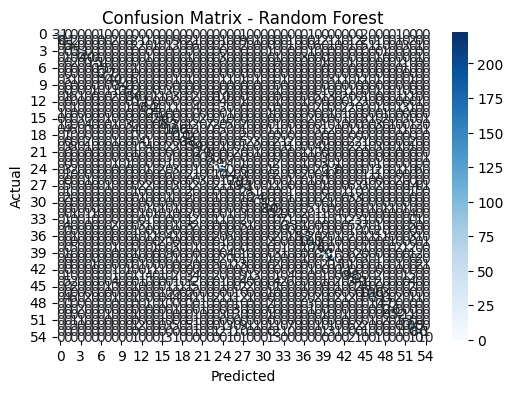


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       107
           2       0.06      0.13      0.08        99
           3       0.00      0.00      0.00        56
           4       0.00      0.00      0.00        52
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00        66
           9       1.00      0.94      0.97        34
          10       0.00      0.00      0.00        49
          11       0.00      0.00      0.00        98
          12       0.00      0.00      0.00        25
          13       0.00      0.00      0.00        89
          14       0.04      0.13      0.07        31
          15       0.00      0.00      0.00        78
          16       0.00      0.00    

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.p

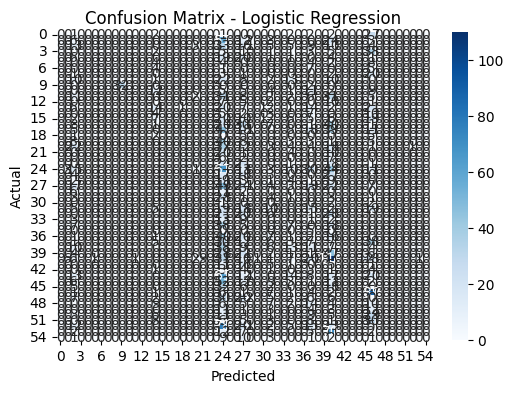


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       107
           2       0.03      0.06      0.04        99
           3       0.00      0.00      0.00        56
           4       0.00      0.00      0.00        52
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00        66
           9       1.00      0.94      0.97        34
          10       0.00      0.00      0.00        49
          11       1.00      0.04      0.08        98
          12       0.00      0.00      0.00        25
          13       0.00      0.00      0.00        89
          14       0.00      0.00      0.00        31
          15       0.00      0.00      0.00        78
          16       0.11      0.28      0.16       103

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.p

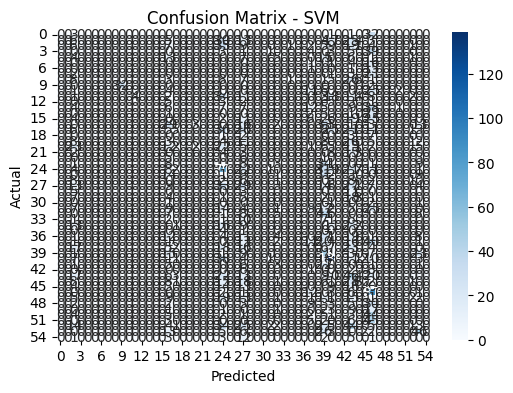

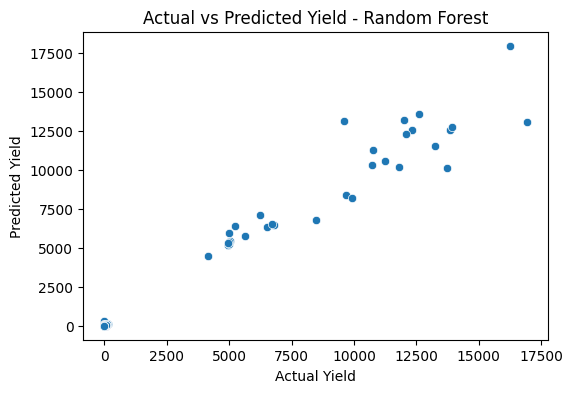

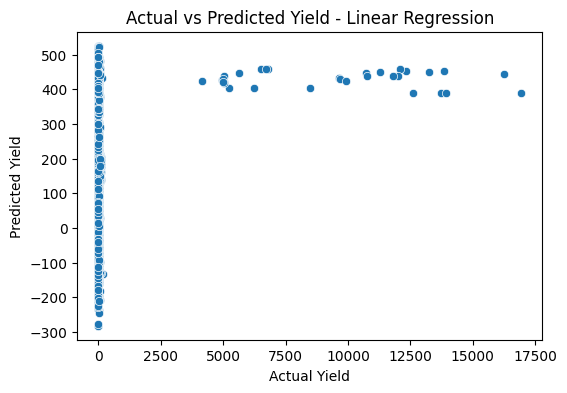

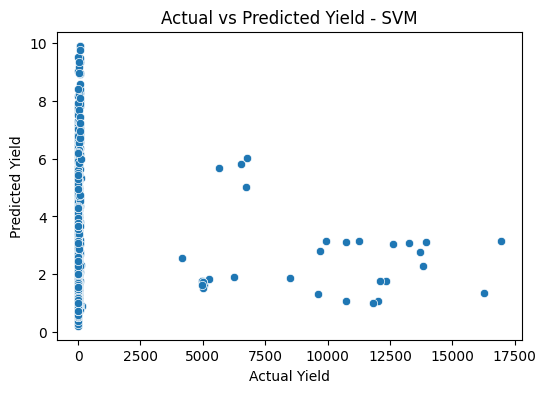


Classification Model Performance:
Random Forest: {'Accuracy': 0.7034027425088878, 'Precision': 0.7028978145798652, 'Recall': 0.7034027425088878, 'F1-score': 0.7003559001238014}
Logistic Regression: {'Accuracy': 0.09217877094972067, 'Precision': 0.5493008469837416, 'Recall': 0.09217877094972067, 'F1-score': 0.23944338314788327}
SVM: {'Accuracy': 0.14601320467242254, 'Precision': 0.5258732272899066, 'Recall': 0.14601320467242254, 'F1-score': 0.1555226677279223}

Regression Model Performance:
Random Forest: {'Mean Squared Error': 16940.148960121147, 'R² Score': 0.978857580979121}
Linear Regression: {'Mean Squared Error': 776277.7435213189, 'R² Score': 0.031154367724477106}
SVM: {'Mean Squared Error': 807117.9564415802, 'R² Score': -0.007336244476646492}


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             mean_squared_error, r2_score, confusion_matrix, classification_report)

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
X_class = df.drop(columns=["Crop"])
y_class = df["Crop"]
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]

# Standardize numerical features
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)
X_reg_scaled = scaler.fit_transform(X_reg)

# Split dataset
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Define models
classification_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}

regression_models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "SVM": SVR()
}

# Train and evaluate classification models
class_results = {}
for name, model in classification_models.items():
    model.fit(Xc_train, yc_train)
    yc_pred = model.predict(Xc_test)
    class_results[name] = {
        "Accuracy": accuracy_score(yc_test, yc_pred),
        "Precision": precision_score(yc_test, yc_pred, average="weighted", zero_division=1),
        "Recall": recall_score(yc_test, yc_pred, average="weighted", zero_division=1),
        "F1-score": f1_score(yc_test, yc_pred, average="weighted", zero_division=1)
    }
    print(f"\n{name} Classification Report:")
    print(classification_report(yc_test, yc_pred))
    cm = confusion_matrix(yc_test, yc_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Train and evaluate regression models
reg_results = {}
for name, model in regression_models.items():
    model.fit(Xr_train, yr_train)
    yr_pred = model.predict(Xr_test)
    reg_results[name] = {
        "Mean Squared Error": mean_squared_error(yr_test, yr_pred),
        "R² Score": r2_score(yr_test, yr_pred)
    }
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=yr_test, y=yr_pred)
    plt.xlabel("Actual Yield")
    plt.ylabel("Predicted Yield")
    plt.title(f"Actual vs Predicted Yield - {name}")
    plt.show()

# Display results
print("\nClassification Model Performance:")
for model, metrics in class_results.items():
    print(f"{model}: {metrics}")

print("\nRegression Model Performance:")
for model, metrics in reg_results.items():
    print(f"{model}: {metrics}")


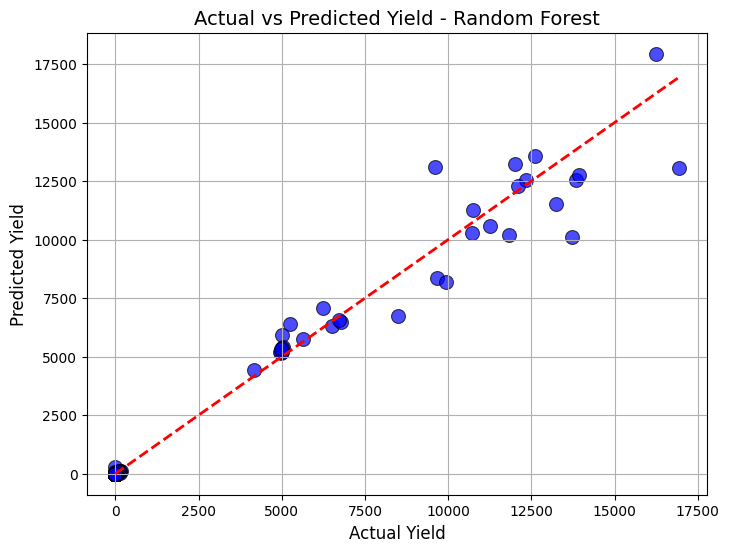

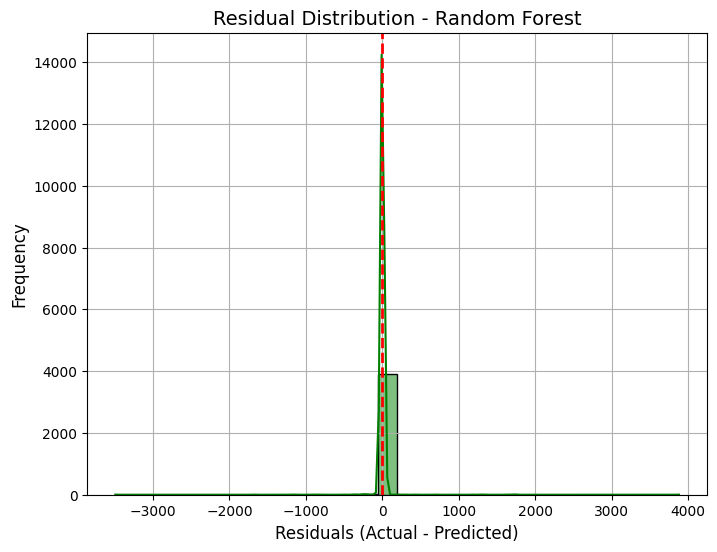

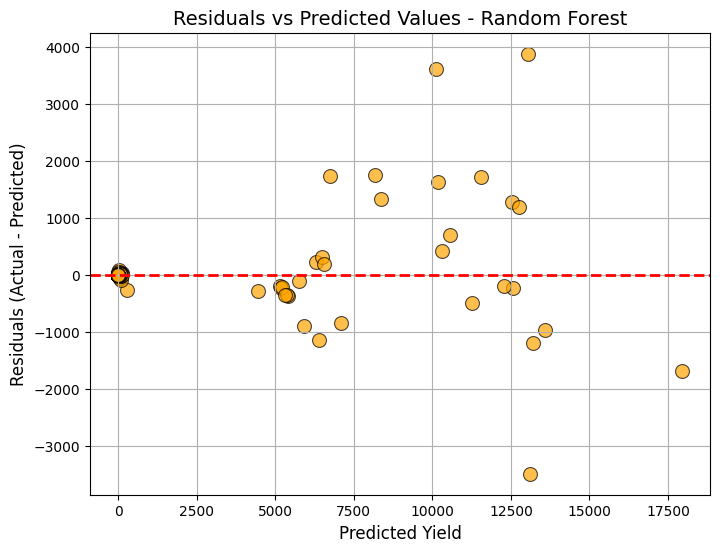

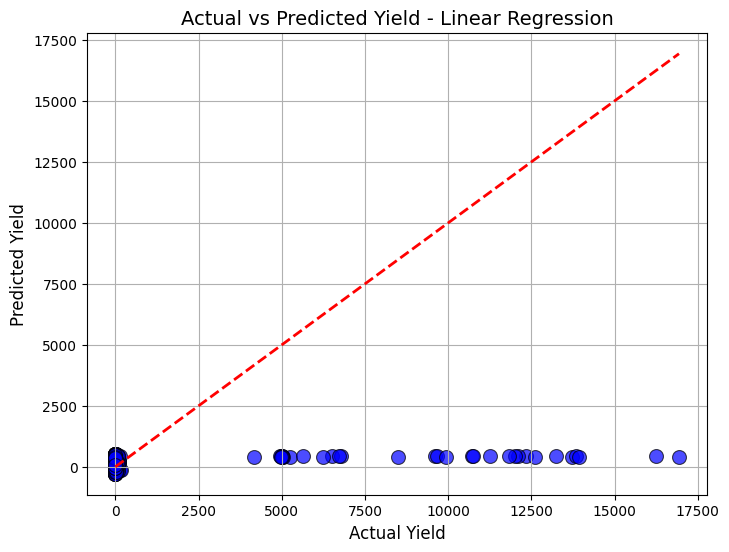

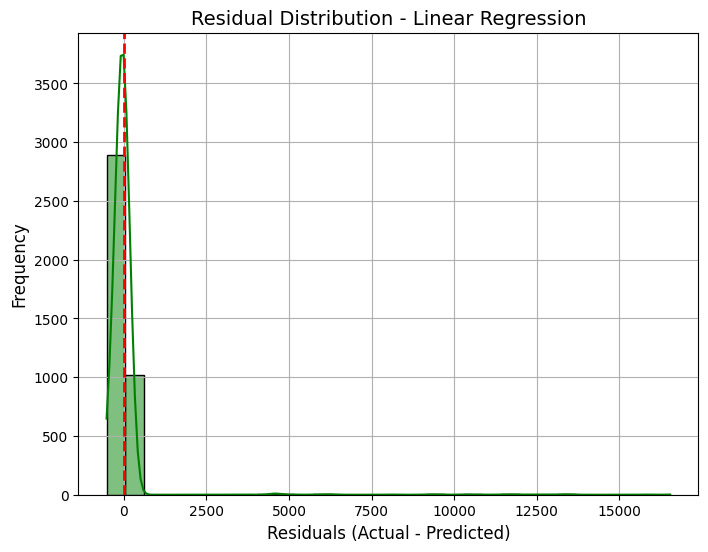

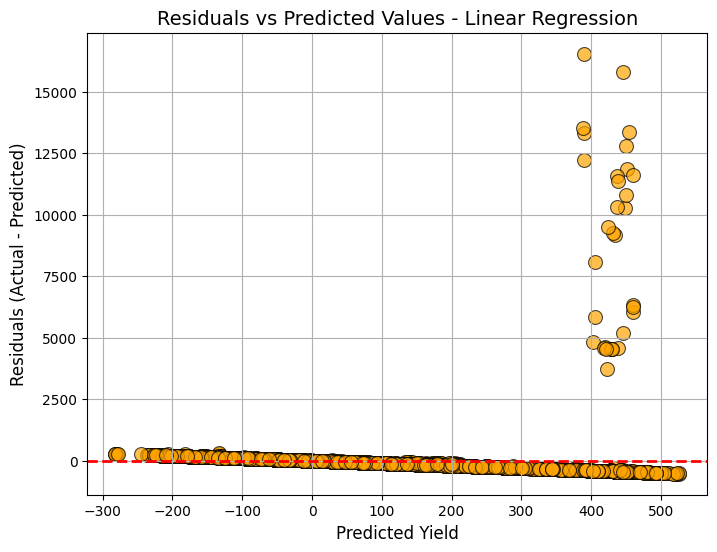

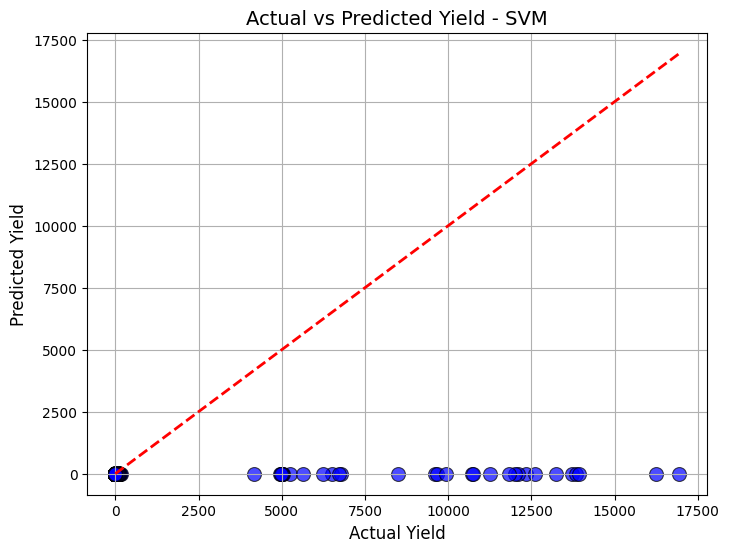

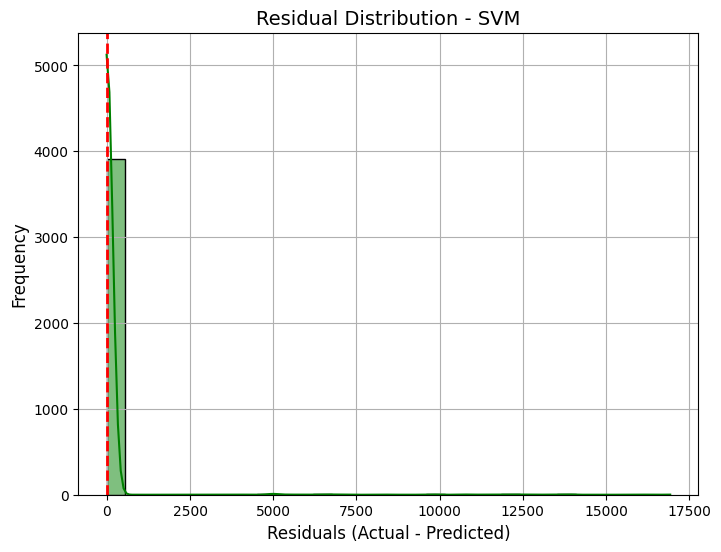

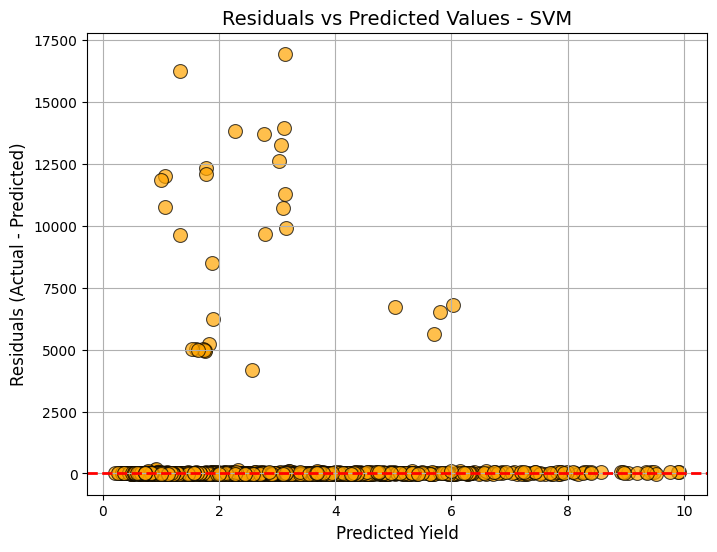


Regression Model Performance:
Random Forest: {'Mean Squared Error': 16940.148960121147, 'R² Score': 0.978857580979121}
Linear Regression: {'Mean Squared Error': 776277.7435213189, 'R² Score': 0.031154367724477106}
SVM: {'Mean Squared Error': 807117.9564415802, 'R² Score': -0.007336244476646492}


In [2]:
# Train and evaluate regression models with enhanced visualizations
reg_results = {}

for name, model in regression_models.items():
    # Train the model
    model.fit(Xr_train, yr_train)
    
    # Make predictions
    yr_pred = model.predict(Xr_test)
    
    # Store evaluation metrics
    reg_results[name] = {
        "Mean Squared Error": mean_squared_error(yr_test, yr_pred),
        "R² Score": r2_score(yr_test, yr_pred)
    }
    
    # Plot 1: Actual vs Predicted Yield
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=yr_test, y=yr_pred, color="blue", edgecolor="k", s=100, alpha=0.7)
    plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], color="red", linestyle="--", linewidth=2)
    plt.title(f"Actual vs Predicted Yield - {name}", fontsize=14)
    plt.xlabel("Actual Yield", fontsize=12)
    plt.ylabel("Predicted Yield", fontsize=12)
    plt.grid(True)
    plt.show()
    
    # Plot 2: Residuals Plot (Error Analysis)
    residuals = yr_test - yr_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=30, color="green")
    plt.title(f"Residual Distribution - {name}", fontsize=14)
    plt.xlabel("Residuals (Actual - Predicted)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.axvline(0, color="red", linestyle="--", linewidth=2)
    plt.grid(True)
    plt.show()
    
    # Plot 3: Residuals vs Predicted Values
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=yr_pred, y=residuals, color="orange", edgecolor="k", s=100, alpha=0.7)
    plt.axhline(0, color="red", linestyle="--", linewidth=2)
    plt.title(f"Residuals vs Predicted Values - {name}", fontsize=14)
    plt.xlabel("Predicted Yield", fontsize=12)
    plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)
    plt.grid(True)
    plt.show()

# Display regression results
print("\nRegression Model Performance:")
for model, metrics in reg_results.items():
    print(f"{model}: {metrics}")


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
           1       0.56      0.57      0.57       107
           2       0.52      0.55      0.53        99
           3       0.88      0.95      0.91        56
           4       0.77      0.77      0.77        52
           5       0.83      0.68      0.75        22
           6       0.88      0.88      0.88        17
           7       0.84      1.00      0.92        27
           8       0.69      0.61      0.65        66
           9       1.00      1.00      1.00        34
          10       0.86      0.76      0.80        49
          11       0.67      0.57      0.62        98
          12       0.37      0.44      0.40        25
          13       0.76      0.72      0.74        89
          14       0.71      0.81      0.76        31
          15       0.81      0.72      0.76        78
          16       0.59      0.61      0.60       103
   

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.p

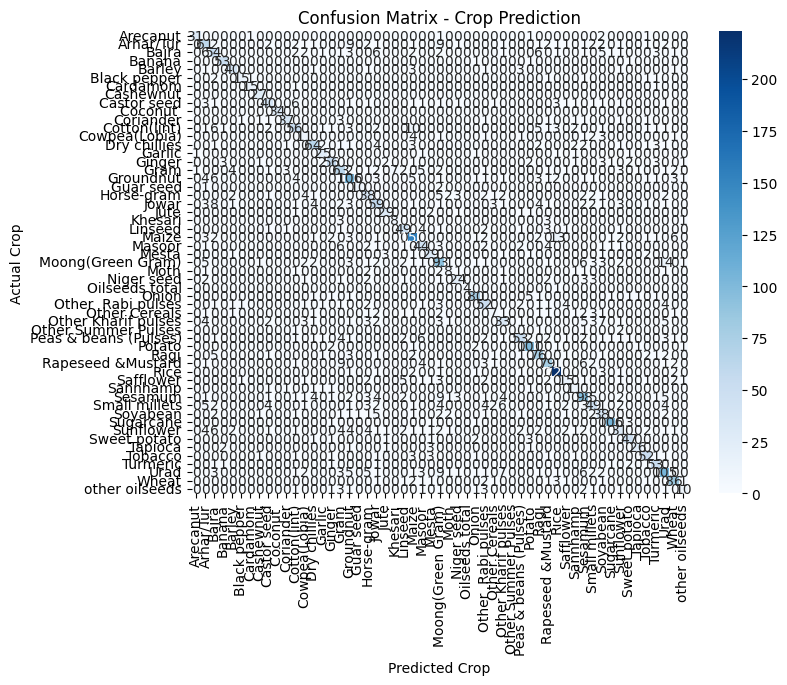


Error: Unseen season: Kharif. Please provide a valid season from ['Autumn     ', 'Kharif     ', 'Rabi       ', 'Summer     ', 'Whole Year ', 'Winter     '].


C:\Users\ELWIN G\AppData\Local\Temp\ipykernel_20312\1675867258.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


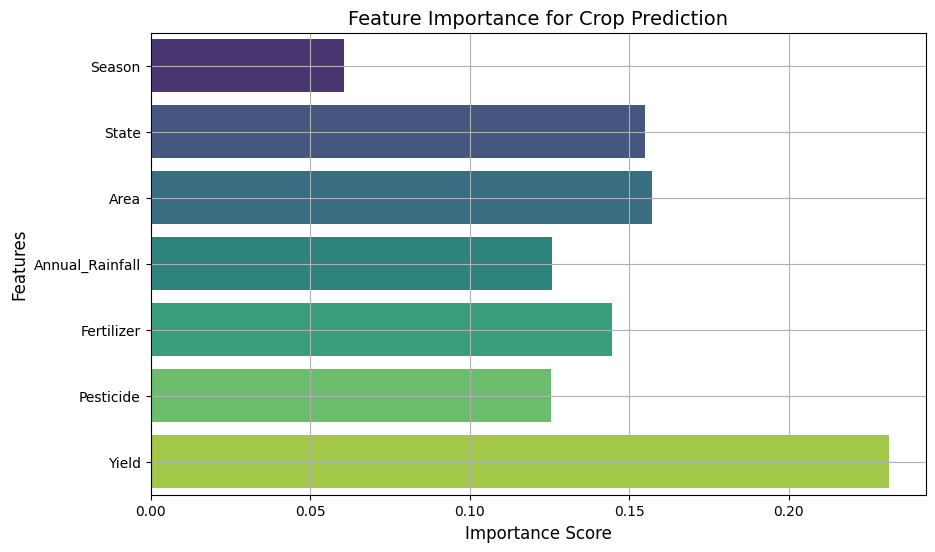

ValueError: y should be a 1d array, got an array of shape () instead.

<Figure size 1000x600 with 0 Axes>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    
    # Fit the encoder on all unique values in the column
    unique_values = df[col].unique()
    le.fit(unique_values)
    
    # Transform the column and store the encoder
    df[col] = le.transform(df[col])
    label_encoders[col] = le

# Define features and target variable for classification
X_class = df.drop(columns=["Crop"])
y_class = df["Crop"]

# Standardize numerical features
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)

# Split dataset into training and testing sets
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)

# Step 2: Train Classification Model
# Use Random Forest Classifier for crop recommendation
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(Xc_train, yc_train)

# Evaluate the model
yc_pred = classifier.predict(Xc_test)
print("\nClassification Report:")
print(classification_report(yc_test, yc_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders["Crop"].classes_, yticklabels=label_encoders["Crop"].classes_)
plt.title("Confusion Matrix - Crop Prediction")
plt.xlabel("Predicted Crop")
plt.ylabel("Actual Crop")
plt.show()

# Step 3: Crop Recommendation System
def recommend_crop(season, state, rainfall, temperature):
    """
    Function to recommend crops based on input features.
    """
    # Check if the season exists in the encoder's classes
    if season not in label_encoders["Season"].classes_:
        raise ValueError(f"Unseen season: {season}. Please provide a valid season from {list(label_encoders['Season'].classes_)}.")
    
    # Check if the state exists in the encoder's classes
    if state not in label_encoders["State"].classes_:
        raise ValueError(f"Unseen state: {state}. Please provide a valid state from {list(label_encoders['State'].classes_)}.")
    
    # Encode input features
    season_encoded = label_encoders["Season"].transform([season])[0]
    state_encoded = label_encoders["State"].transform([state])[0]
    
    # Create feature vector
    input_features = np.array([[season_encoded, state_encoded, rainfall, temperature]])
    
    # Scale input features
    input_features_scaled = scaler.transform(input_features)
    
    # Predict crop
    predicted_crop_encoded = classifier.predict(input_features_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_encoded])[0]
    
    return predicted_crop

# Example Input for Recommendation
try:
    season_input = "Kharif"  # Replace with actual season
    state_input = "Maharashtra"  # Replace with actual state
    rainfall_input = 1200  # Replace with actual rainfall value
    temperature_input = 28  # Replace with actual temperature value

    recommended_crop = recommend_crop(season_input, state_input, rainfall_input, temperature_input)
    print(f"\nRecommended Crop for Season: {season_input}, State: {state_input}, Rainfall: {rainfall_input}mm, Temperature: {temperature_input}°C")
    print(f"--> {recommended_crop}")
except ValueError as e:
    print(f"\nError: {e}")

# Step 4: Visualize Feature Importance
# Extract feature importance from the Random Forest model
feature_importances = classifier.feature_importances_
features = df.drop(columns=["Crop"]).columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title("Feature Importance for Crop Prediction", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(True)
plt.show()

# Step 5: Visualize Crop Distribution
# Count of each crop in the dataset
crop_counts = df["Crop"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_counts.index.map(label_encoders["Crop"].inverse_transform), y=crop_counts.values, palette="coolwarm")
plt.title("Crop Distribution in Dataset", fontsize=14)
plt.xlabel("Crop", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Best Parameters for Crop Recommendation (Classification): {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters for Crop Yield Prediction (Regression): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Crop Recommendation (Classification) Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        37
           1       0.56      0.53      0.55       107
           2       0.54      0.54      0.54        99
           3       0.88      0.93      0.90        56
           4       0.74      0.77      0.75        52
           5       0.83      0.68      0.75        22
           6       0.94      0.88      0.91        17
           7       0.93      1.00      0.96        27
           8       0.67      0.62      0.65        66
           9       1.00      1.00      1.00        34
          10       0.84

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.p

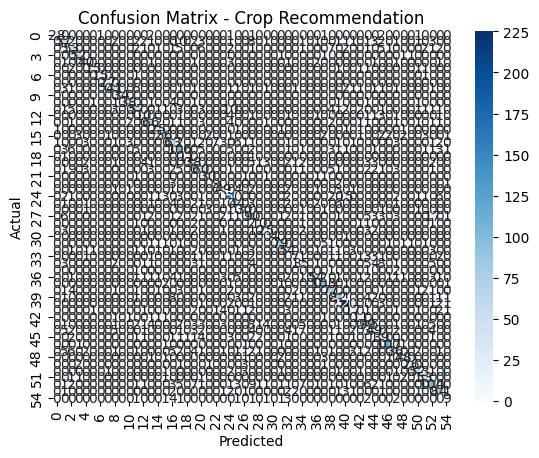


Crop Yield Prediction (Regression) Metrics:
Mean Squared Error: 41297.6352
R² Score: 0.9485


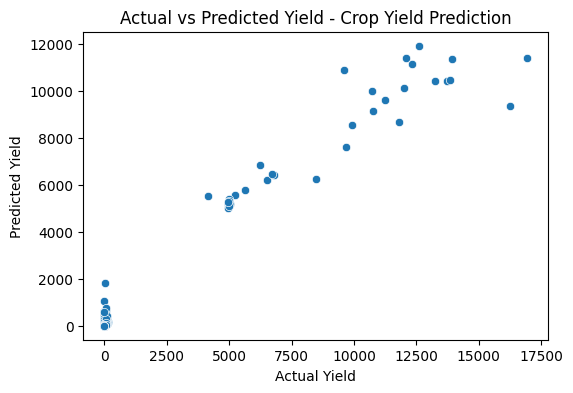


Feature Importances for Crop Recommendation:
           Feature  Importance
6            Yield    0.230567
2             Area    0.156471
1            State    0.155661
4       Fertilizer    0.144383
5        Pesticide    0.125565
3  Annual_Rainfall    0.125561
0           Season    0.061793


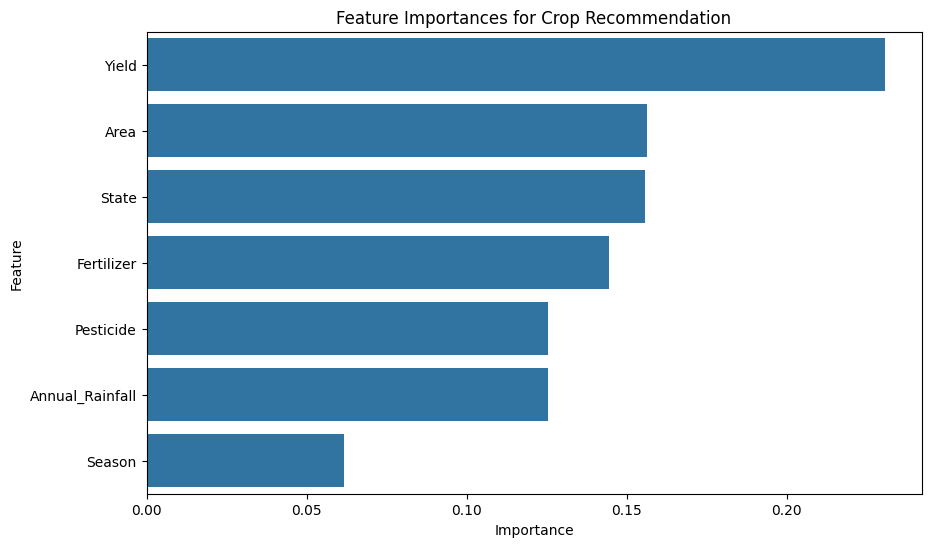


Feature Importances for Crop Yield Prediction:
           Feature  Importance
0             Crop    0.550209
2            State    0.105595
3             Area    0.097617
5       Fertilizer    0.076760
6        Pesticide    0.070604
1           Season    0.053157
4  Annual_Rainfall    0.046059


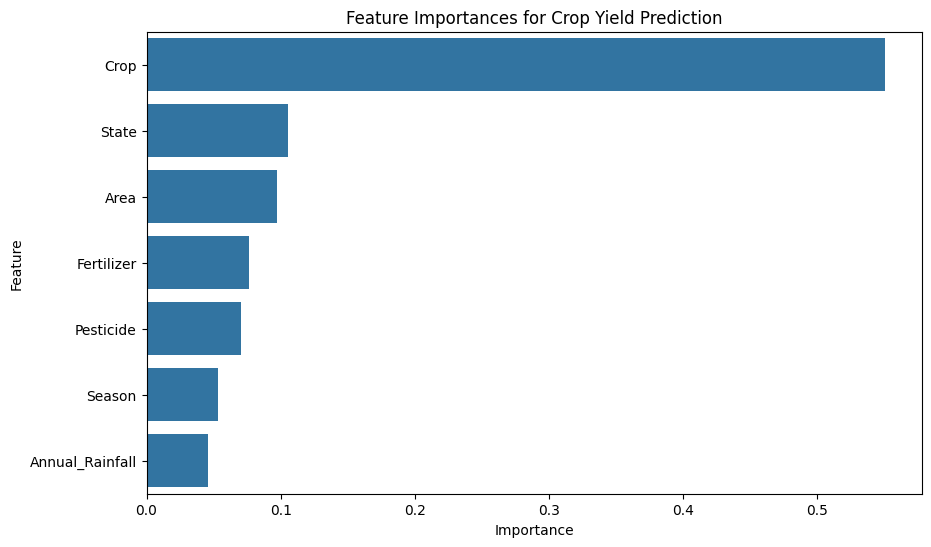

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             mean_squared_error, r2_score, confusion_matrix, classification_report)

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
X_class = df.drop(columns=["Crop"])
y_class = df["Crop"]
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]

# Standardize numerical features
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)
X_reg_scaled = scaler.fit_transform(X_reg)

# Split dataset
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for splits
}

# Crop Recommendation (Classification)
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_class = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_class.fit(Xc_train, yc_train)

# Crop Yield Prediction (Regression)
rf_regressor = RandomForestRegressor(random_state=42)
grid_search_reg = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_reg.fit(Xr_train, yr_train)

# Best parameters
print("Best Parameters for Crop Recommendation (Classification):", grid_search_class.best_params_)
print("Best Parameters for Crop Yield Prediction (Regression):", grid_search_reg.best_params_)

# Train models with best parameters
best_rf_classifier = grid_search_class.best_estimator_
best_rf_regressor = grid_search_reg.best_estimator_

# Evaluate Crop Recommendation Model
yc_pred = best_rf_classifier.predict(Xc_test)
print("\nCrop Recommendation (Classification) Report:")
print(classification_report(yc_test, yc_pred))
print("Confusion Matrix:")
cm = confusion_matrix(yc_test, yc_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Crop Recommendation")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluate Crop Yield Prediction Model
yr_pred = best_rf_regressor.predict(Xr_test)
print("\nCrop Yield Prediction (Regression) Metrics:")
print(f"Mean Squared Error: {mean_squared_error(yr_test, yr_pred):.4f}")
print(f"R² Score: {r2_score(yr_test, yr_pred):.4f}")
plt.figure(figsize=(6, 4))
sns.scatterplot(x=yr_test, y=yr_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield - Crop Yield Prediction")
plt.show()

# Feature Importance for Crop Recommendation
feature_importances = best_rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_class.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances for Crop Recommendation:")
print(feature_importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances for Crop Recommendation")
plt.show()

# Feature Importance for Crop Yield Prediction
feature_importances_reg = best_rf_regressor.feature_importances_
feature_importance_df_reg = pd.DataFrame({
    'Feature': X_reg.columns,
    'Importance': feature_importances_reg
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances for Crop Yield Prediction:")
print(feature_importance_df_reg)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_reg)
plt.title("Feature Importances for Crop Yield Prediction")
plt.show()

Best Parameters for Crop Recommendation (Classification): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Parameters for Crop Yield Prediction (Regression): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

Crop Recommendation (Classification) Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        37
           1       0.57      0.60      0.58       107
           2       0.51      0.55      0.53        99
           3       0.88      0.93      0.90        56
           4       0.82      0.79      0.80        52
           5       0.84      0.73      0.78        22
           6       0.94      0.88      0.91        17
           7       0.90      1.00      0.95        27
           8       0.65      0.53      0.58        66
           9       0.97      1.00      0.99        34
          10       0.84  

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.p

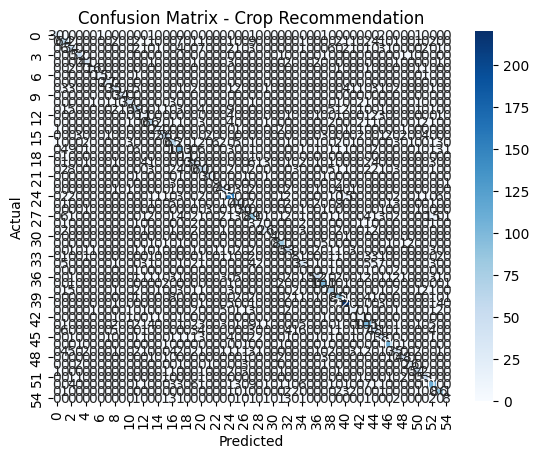


Crop Yield Prediction (Regression) Metrics:
Mean Squared Error: 34483.2963
R² Score: 0.9570


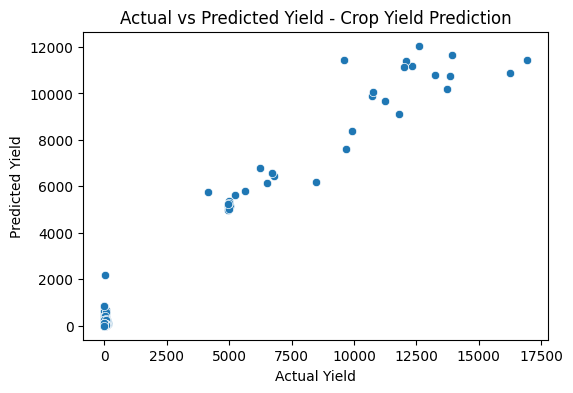


Feature Importances for Crop Recommendation:
           Feature  Importance
6            Yield    0.233351
1            State    0.157694
2             Area    0.154918
4       Fertilizer    0.142479
3  Annual_Rainfall    0.124402
5        Pesticide    0.122482
0           Season    0.064674


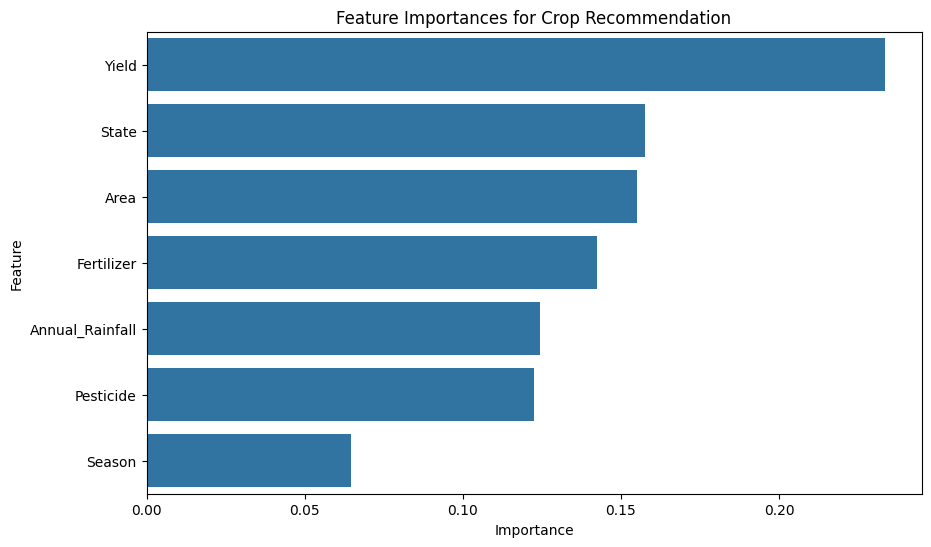


Feature Importances for Crop Yield Prediction:
           Feature  Importance
0             Crop    0.539903
2            State    0.112628
3             Area    0.108742
5       Fertilizer    0.074286
6        Pesticide    0.064666
1           Season    0.055784
4  Annual_Rainfall    0.043991


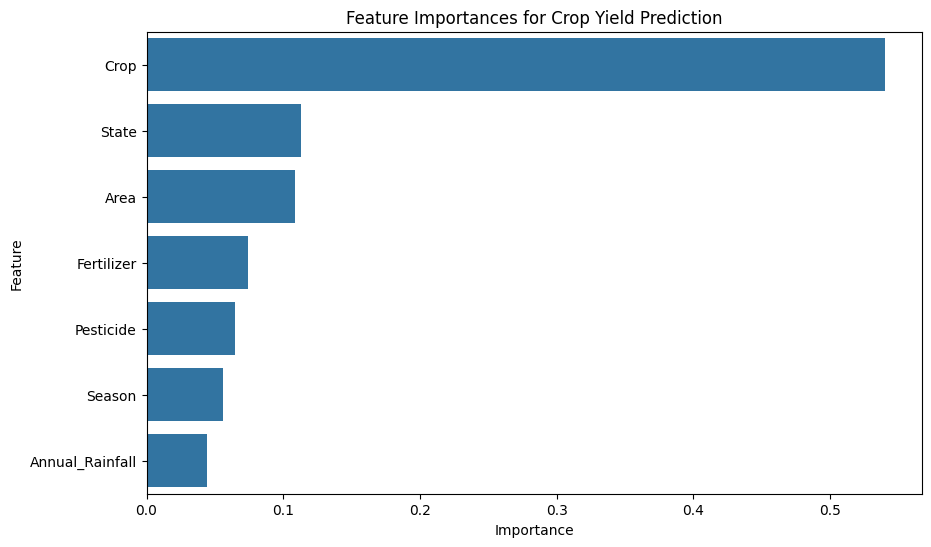

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             mean_squared_error, r2_score, confusion_matrix, classification_report)

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
X_class = df.drop(columns=["Crop"])
y_class = df["Crop"]
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]

# Standardize numerical features
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)
X_reg_scaled = scaler.fit_transform(X_reg)

# Split dataset
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Crop Recommendation (Classification)
rf_classifier = RandomForestClassifier(random_state=42)
random_search_class = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=10,  # Sample 10 parameter combinations
    cv=3,       # Reduce cross-validation folds
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search_class.fit(Xc_train, yc_train)

# Crop Yield Prediction (Regression)
rf_regressor = RandomForestRegressor(random_state=42)
random_search_reg = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
random_search_reg.fit(Xr_train, yr_train)

# Best parameters
print("Best Parameters for Crop Recommendation (Classification):", random_search_class.best_params_)
print("Best Parameters for Crop Yield Prediction (Regression):", random_search_reg.best_params_)

# Train models with best parameters
best_rf_classifier = random_search_class.best_estimator_
best_rf_regressor = random_search_reg.best_estimator_

# Evaluate Crop Recommendation Model
yc_pred = best_rf_classifier.predict(Xc_test)
print("\nCrop Recommendation (Classification) Report:")
print(classification_report(yc_test, yc_pred))
print("Confusion Matrix:")
cm = confusion_matrix(yc_test, yc_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Crop Recommendation")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluate Crop Yield Prediction Model
yr_pred = best_rf_regressor.predict(Xr_test)
print("\nCrop Yield Prediction (Regression) Metrics:")
print(f"Mean Squared Error: {mean_squared_error(yr_test, yr_pred):.4f}")
print(f"R² Score: {r2_score(yr_test, yr_pred):.4f}")
plt.figure(figsize=(6, 4))
sns.scatterplot(x=yr_test, y=yr_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield - Crop Yield Prediction")
plt.show()

# Feature Importance for Crop Recommendation
feature_importances = best_rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_class.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances for Crop Recommendation:")
print(feature_importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances for Crop Recommendation")
plt.show()

# Feature Importance for Crop Yield Prediction
feature_importances_reg = best_rf_regressor.feature_importances_
feature_importance_df_reg = pd.DataFrame({
    'Feature': X_reg.columns,
    'Importance': feature_importances_reg
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances for Crop Yield Prediction:")
print(feature_importance_df_reg)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_reg)
plt.title("Feature Importances for Crop Yield Prediction")
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             mean_squared_error, r2_score, confusion_matrix, classification_report)

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
X_class = df.drop(columns=["Crop"])
y_class = df["Crop"]
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]

# Standardize numerical features
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)
X_reg_scaled = scaler.fit_transform(X_reg)

# Split dataset
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for splits
}

# Crop Recommendation (Classification)
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_class = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_class.fit(Xc_train, yc_train)

# Crop Yield Prediction (Regression)
rf_regressor = RandomForestRegressor(random_state=42)
grid_search_reg = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_reg.fit(Xr_train, yr_train)

# Best parameters
print("Best Parameters for Crop Recommendation (Classification):", grid_search_class.best_params_)
print("Best Parameters for Crop Yield Prediction (Regression):", grid_search_reg.best_params_)

# Train models with best parameters
best_rf_classifier = grid_search_class.best_estimator_
best_rf_regressor = grid_search_reg.best_estimator_

# Evaluate Crop Recommendation Model
yc_pred = best_rf_classifier.predict(Xc_test)
print("\nCrop Recommendation (Classification) Report:")
print(classification_report(yc_test, yc_pred))
print(f"Accuracy: {accuracy_score(yc_test, yc_pred):.4f}")

# Evaluate Crop Yield Prediction Model
yr_pred = best_rf_regressor.predict(Xr_test)
print("\nCrop Yield Prediction (Regression) Metrics:")
print(f"Mean Squared Error: {mean_squared_error(yr_test, yr_pred):.4f}")
print(f"R² Score: {r2_score(yr_test, yr_pred):.4f}")

# Feature Importance for Crop Recommendation
feature_importances = best_rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_class.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances for Crop Recommendation:")
print(feature_importance_df)

# Feature Importance for Crop Yield Prediction
feature_importances_reg = best_rf_regressor.feature_importances_
feature_importance_df_reg = pd.DataFrame({
    'Feature': X_reg.columns,
    'Importance': feature_importances_reg
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances for Crop Yield Prediction:")
print(feature_importance_df_reg)

Best Parameters for Crop Recommendation (Classification): {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters for Crop Yield Prediction (Regression): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Crop Recommendation (Classification) Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        37
           1       0.56      0.53      0.55       107
           2       0.54      0.54      0.54        99
           3       0.88      0.93      0.90        56
           4       0.74      0.77      0.75        52
           5       0.83      0.68      0.75        22
           6       0.94      0.88      0.91        17
           7       0.93      1.00      0.96        27
           8       0.67      0.62      0.65        66
           9       1.00      1.00      1.00        34
          10       0.84

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.p


Crop Yield Prediction (Regression) Metrics:
Mean Squared Error: 41297.6352
R² Score: 0.9485

Feature Importances for Crop Recommendation:
           Feature  Importance
6            Yield    0.230567
2             Area    0.156471
1            State    0.155661
4       Fertilizer    0.144383
5        Pesticide    0.125565
3  Annual_Rainfall    0.125561
0           Season    0.061793

Feature Importances for Crop Yield Prediction:
           Feature  Importance
0             Crop    0.550209
2            State    0.105595
3             Area    0.097617
5       Fertilizer    0.076760
6        Pesticide    0.070604
1           Season    0.053157
4  Annual_Rainfall    0.046059


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             mean_squared_error, r2_score, confusion_matrix, classification_report)

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
X_class = df.drop(columns=["Crop"])
y_class = df["Crop"]
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]

# Standardize numerical features
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)
X_reg_scaled = scaler.fit_transform(X_reg)

# Split dataset
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for splits
}

# Crop Recommendation (Classification)
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_class = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_class.fit(Xc_train, yc_train)

# Crop Yield Prediction (Regression)
rf_regressor = RandomForestRegressor(random_state=42)
grid_search_reg = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_reg.fit(Xr_train, yr_train)

# Best parameters
print("Best Parameters for Crop Recommendation (Classification):", grid_search_class.best_params_)
print("Best Parameters for Crop Yield Prediction (Regression):", grid_search_reg.best_params_)

# Train models with best parameters
best_rf_classifier = grid_search_class.best_estimator_
best_rf_regressor = grid_search_reg.best_estimator_

# Evaluate Crop Recommendation Model
yc_pred = best_rf_classifier.predict(Xc_test)
print("\nCrop Recommendation (Classification) Report:")
print(classification_report(yc_test, yc_pred))
print(f"Accuracy: {accuracy_score(yc_test, yc_pred):.4f}")

# Display Expected vs Predicted Crops for a few samples
sample_indices = np.random.choice(len(Xc_test), 5, replace=False)  # Randomly select 5 samples
print("\nSample Crop Recommendations:")
for i in sample_indices:
    actual_crop = label_encoders["Crop"].inverse_transform([yc_test[i]])[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([yc_pred[i]])[0]
    print(f"Sample {i}: Actual Crop = {actual_crop}, Predicted Crop = {predicted_crop}")

# Evaluate Crop Yield Prediction Model
yr_pred = best_rf_regressor.predict(Xr_test)
print("\nCrop Yield Prediction (Regression) Metrics:")
print(f"Mean Squared Error: {mean_squared_error(yr_test, yr_pred):.4f}")
print(f"R² Score: {r2_score(yr_test, yr_pred):.4f}")

# Display Expected vs Predicted Yields for a few samples
print("\nSample Crop Yield Predictions:")
for i in sample_indices:
    actual_yield = yr_test.iloc[i]
    predicted_yield = yr_pred[i]
    print(f"Sample {i}: Actual Yield = {actual_yield:.2f}, Predicted Yield = {predicted_yield:.2f}")

# Feature Importance for Crop Recommendation
feature_importances = best_rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_class.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances for Crop Recommendation:")
print(feature_importance_df)

# Feature Importance for Crop Yield Prediction
feature_importances_reg = best_rf_regressor.feature_importances_
feature_importance_df_reg = pd.DataFrame({
    'Feature': X_reg.columns,
    'Importance': feature_importances_reg
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances for Crop Yield Prediction:")
print(feature_importance_df_reg)

Best Parameters for Crop Recommendation (Classification): {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters for Crop Yield Prediction (Regression): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Crop Recommendation (Classification) Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        37
           1       0.56      0.53      0.55       107
           2       0.54      0.54      0.54        99
           3       0.88      0.93      0.90        56
           4       0.74      0.77      0.75        52
           5       0.83      0.68      0.75        22
           6       0.94      0.88      0.91        17
           7       0.93      1.00      0.96        27
           8       0.67      0.62      0.65        66
           9       1.00      1.00      1.00        34
          10       0.84

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.p

KeyError: 1761

In [1]:
 import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)
# Dataset columns: Crop, Season, State, Area, Annual_Rainfall, Fertilizer, Pesticide, Yield

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# -------------------------------
# Prepare Data for Classification
# -------------------------------
# For classification, we predict Crop using all features EXCEPT Crop and Yield.
X_class = df.drop(columns=["Crop", "Yield"])  # Features: Season, State, Area, Annual_Rainfall, Fertilizer, Pesticide
y_class = df["Crop"]

# Use a dedicated scaler for classification features
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# -------------------------------
# Prepare Data for Regression
# -------------------------------
# For regression, we predict Yield using all features EXCEPT Yield (i.e., including Crop).
X_reg = df.drop(columns=["Yield"])  # Features: Crop, Season, State, Area, Annual_Rainfall, Fertilizer, Pesticide
y_reg = df["Yield"]

# Use a dedicated scaler for regression features
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# -------------------------------
# Handle Class Imbalance for Classification
# -------------------------------
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# -------------------------------
# Split Data
# -------------------------------
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled
)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

# -------------------------------
# Hyperparameter Tuning for Classification
# -------------------------------
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, "balanced"]
}

clf_base = RandomForestClassifier(random_state=42)
grid_search = RandomizedSearchCV(clf_base, param_grid, n_iter=15, cv=5, random_state=42, n_jobs=-1)
grid_search.fit(Xc_train, yc_train)
clf = grid_search.best_estimator_

# Train classification model
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# -------------------------------
# Train Regression Model
# -------------------------------
reg = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                            max_depth=grid_search.best_params_['max_depth'],
                            random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# -------------------------------
# Crop Recommendation and Yield Prediction Function
# -------------------------------
def recommend_crop_and_yield(season, state, area, rainfall, fertilizer, pesticide):
    # For classification (6 features): [Season, State, Area, Annual_Rainfall, Fertilizer, Pesticide]
    # Encode Season and State safely
    season_encoded = label_encoders["Season"].transform([season])[0] if season in label_encoders["Season"].classes_ else -1
    state_encoded = label_encoders["State"].transform([state])[0] if state in label_encoders["State"].classes_ else -1

    # Create input for classification
    input_class = np.array([[season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_class_scaled = scaler_class.transform(input_class)
    
    # Predict crop using classification model
    predicted_crop_idx = clf.predict(input_class_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_idx])[0]
    
    # For regression (7 features): [Crop, Season, State, Area, Annual_Rainfall, Fertilizer, Pesticide]
    # Use the predicted crop index for the 'Crop' feature
    input_reg = np.array([[predicted_crop_idx, season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_reg_scaled = scaler_reg.transform(input_reg)
    
    # Predict yield using regression model
    predicted_yield = reg.predict(input_reg_scaled)[0]
    
    print("Recommended Crop:", predicted_crop)
    print("Predicted Yield:", round(predicted_yield, 2), "kg/ha")

# -------------------------------
# Example Usage
# -------------------------------
recommend_crop_and_yield(season="Kharif", state="Maharashtra", area=5000, rainfall=1500, fertilizer=200000, pesticide=5000)


Classification Metrics:
Accuracy: 0.74
Precision: 0.73
Recall: 0.74
F1-score: 0.73

Regression Metrics:
Mean Squared Error: 17876.74
R² Score: 0.98
Recommended Crop: Sesamum
Predicted Yield: 0.49 kg/ha


C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


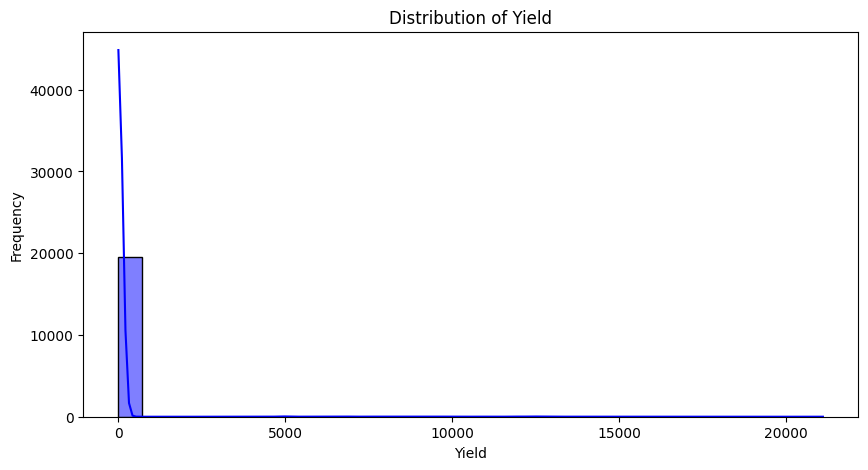

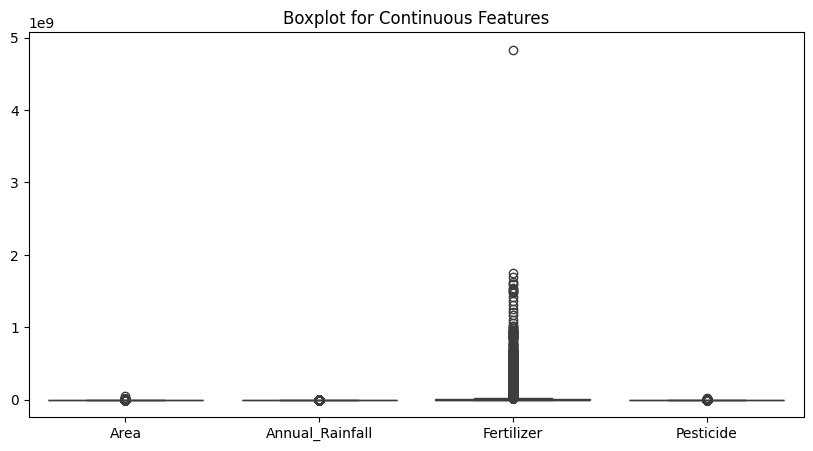

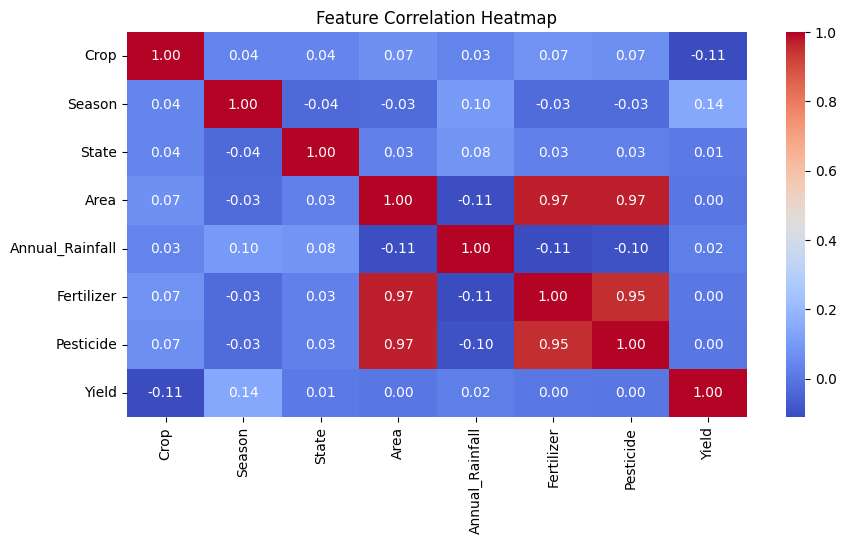

C:\Users\ELWIN G\AppData\Local\Temp\ipykernel_22576\1507907160.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_class.columns, y=feature_importances, palette='viridis')


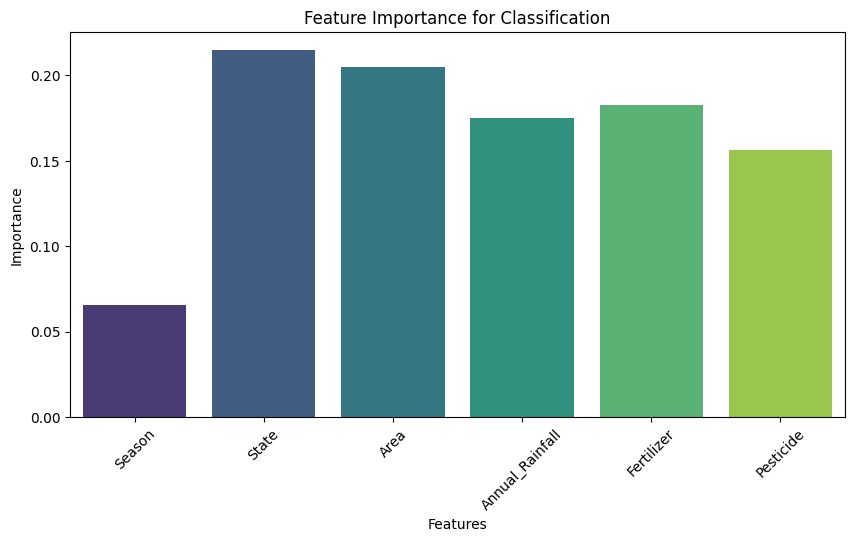

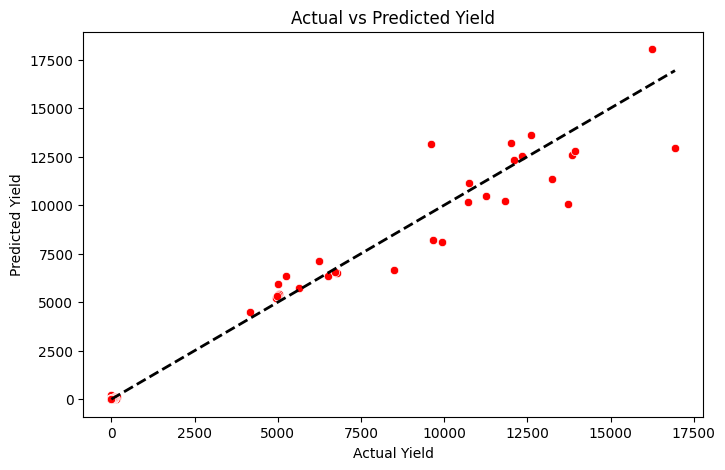

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Exploratory Data Analysis (EDA) Visualizations
plt.figure(figsize=(10, 5))
sns.histplot(df['Yield'], bins=30, kde=True, color='blue')
plt.title('Distribution of Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']])
plt.title('Boxplot for Continuous Features')
plt.show()

plt.figure(figsize=(10, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled
)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

# Train Classification Model
clf = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
clf.fit(Xc_train, yc_train)
feature_importances = clf.feature_importances_

plt.figure(figsize=(10, 5))
sns.barplot(x=X_class.columns, y=feature_importances, palette='viridis')
plt.title('Feature Importance for Classification')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# Train Regression Model
reg = RandomForestRegressor(n_estimators=200, max_depth=30, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=yr_test, y=yr_pred, color='red')
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()


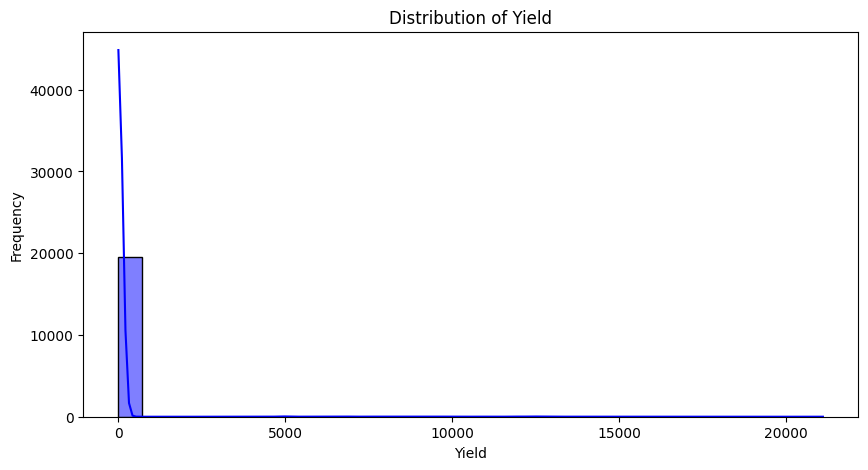

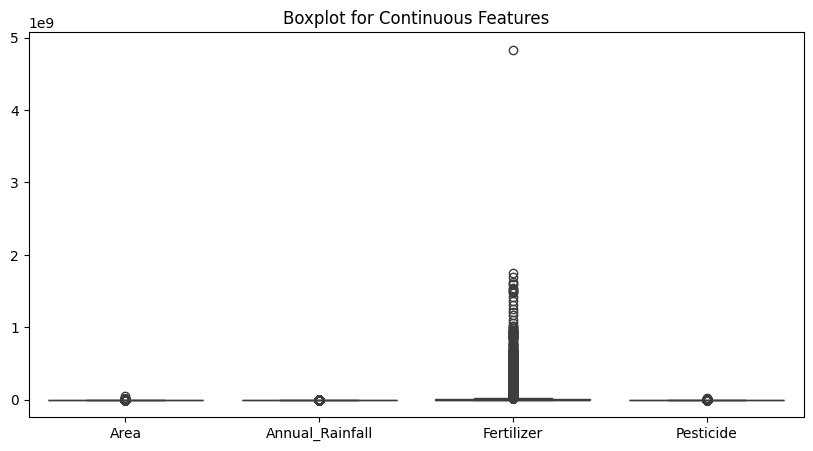

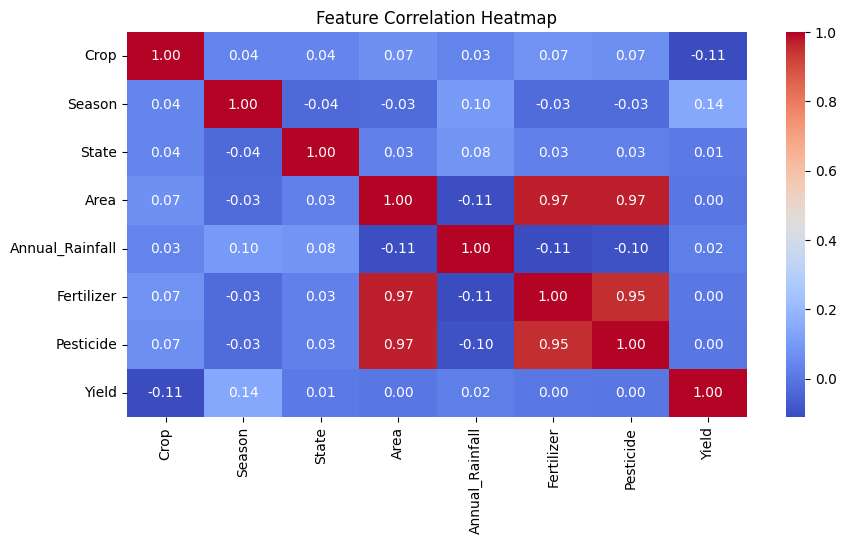

C:\Users\ELWIN G\AppData\Local\Temp\ipykernel_22576\724196550.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_class.columns, y=feature_importances, palette='viridis')


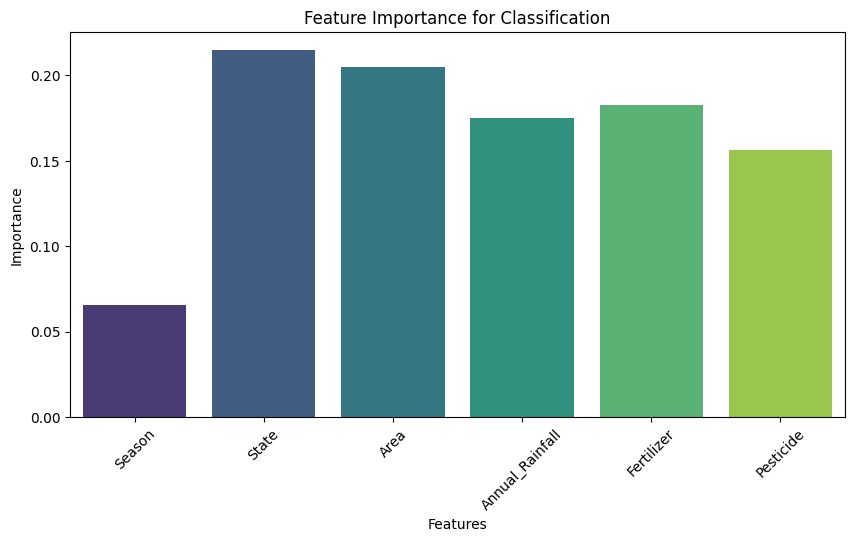

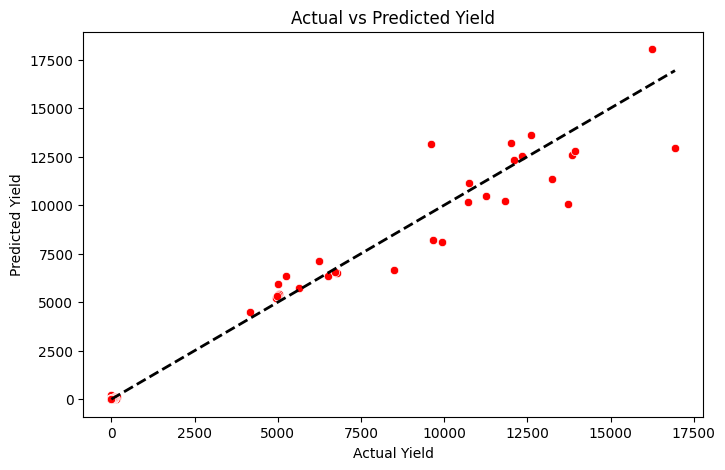

KNN Accuracy: 0.48


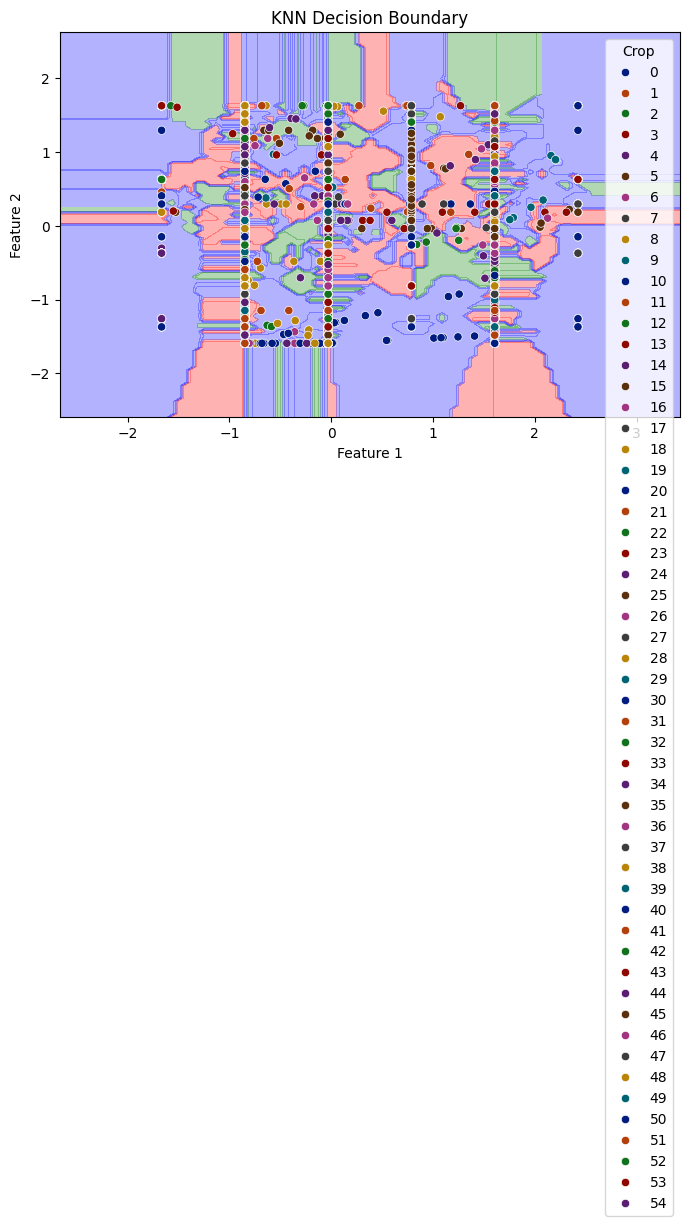

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Exploratory Data Analysis (EDA) Visualizations
plt.figure(figsize=(10, 5))
sns.histplot(df['Yield'], bins=30, kde=True, color='blue')
plt.title('Distribution of Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']])
plt.title('Boxplot for Continuous Features')
plt.show()

plt.figure(figsize=(10, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled
)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

# Train Classification Model
clf = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
clf.fit(Xc_train, yc_train)
feature_importances = clf.feature_importances_

plt.figure(figsize=(10, 5))
sns.barplot(x=X_class.columns, y=feature_importances, palette='viridis')
plt.title('Feature Importance for Classification')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# Train Regression Model
reg = RandomForestRegressor(n_estimators=200, max_depth=30, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=yr_test, y=yr_pred, color='red')
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xc_train, yc_train)
yc_pred_knn = knn.predict(Xc_test)

# KNN Classification Accuracy
knn_accuracy = accuracy_score(yc_test, yc_pred_knn)
print(f'KNN Accuracy: {knn_accuracy:.2f}')

# KNN Decision Boundary Visualization (for 2D projection of features)
from matplotlib.colors import ListedColormap

Xc_train_2D = Xc_train[:, :2]  # Taking first two features for visualization
Xc_test_2D = Xc_test[:, :2]
knn.fit(Xc_train_2D, yc_train)

x_min, x_max = Xc_train_2D[:, 0].min() - 1, Xc_train_2D[:, 0].max() + 1
y_min, y_max = Xc_train_2D[:, 1].min() - 1, Xc_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue', 'green']))
sns.scatterplot(x=Xc_test_2D[:, 0], y=Xc_test_2D[:, 1], hue=yc_test, palette='dark')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary')
plt.show()


<Figure size 1200x600 with 0 Axes>

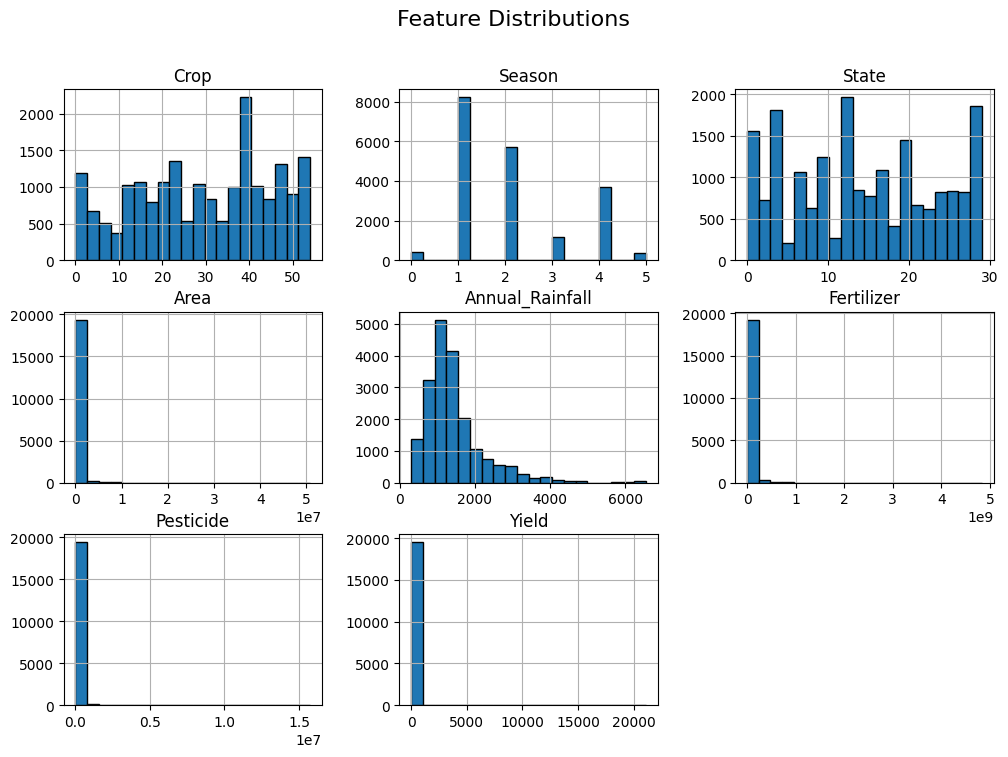

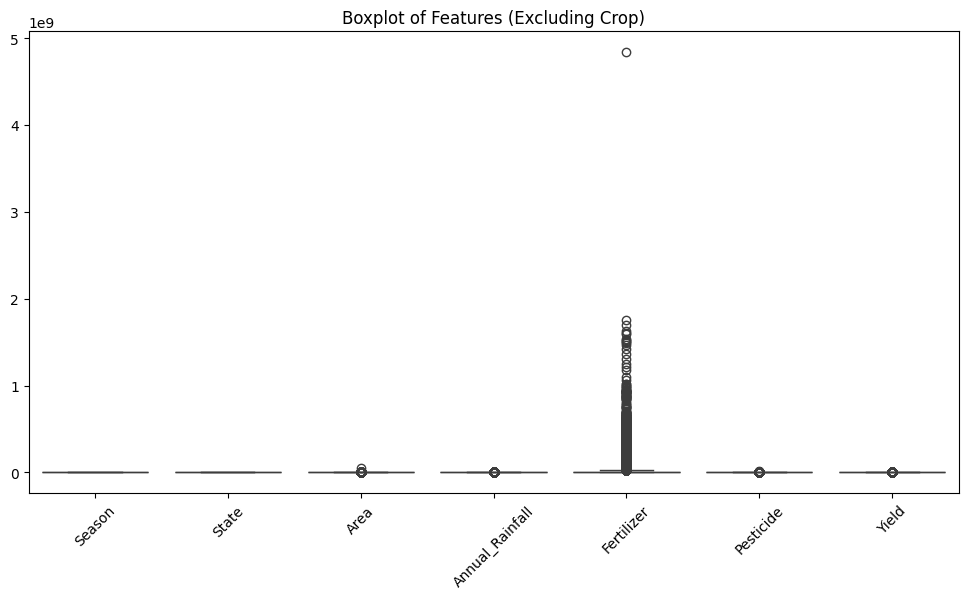

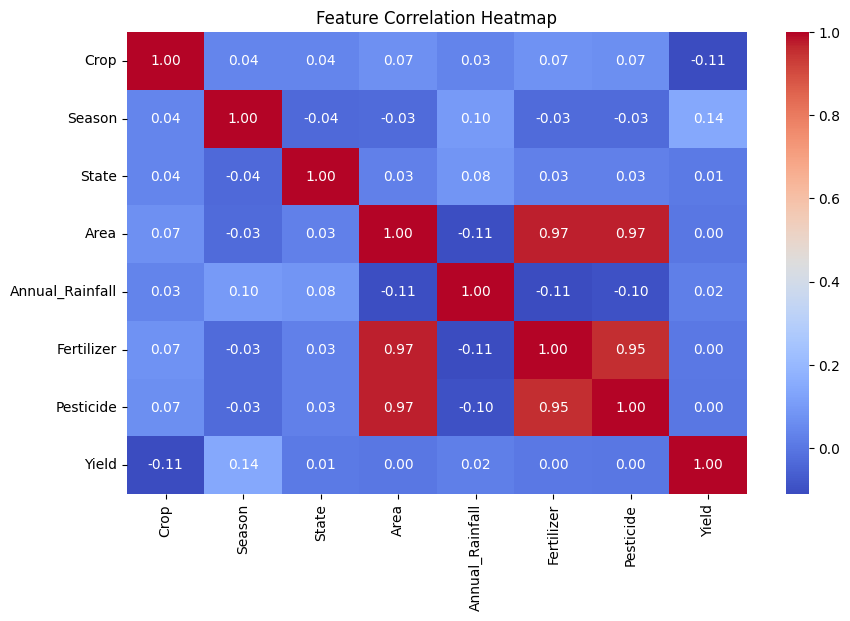


Classification Metrics:
Accuracy: 0.72902
Precision: 0.72548
Recall: 0.72902
F1-score: 0.72554


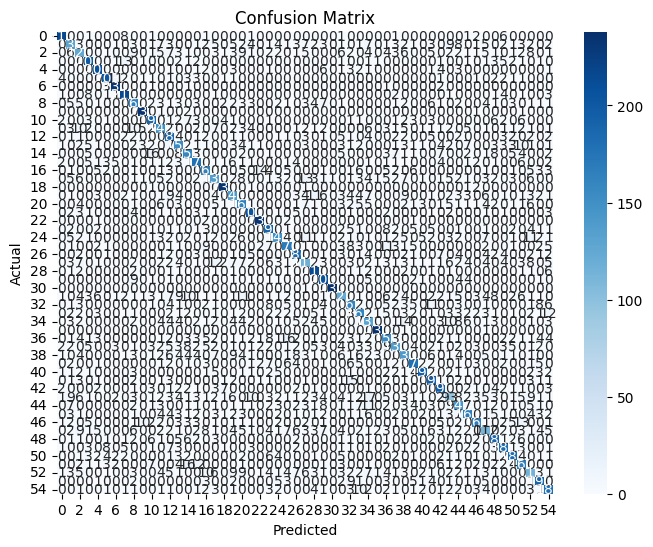


Regression Metrics:
Mean Squared Error: 17250.00
R² Score: 0.98


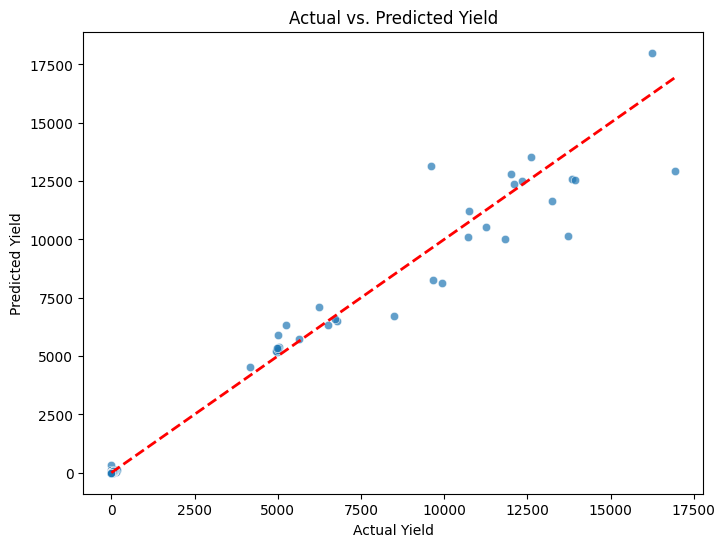

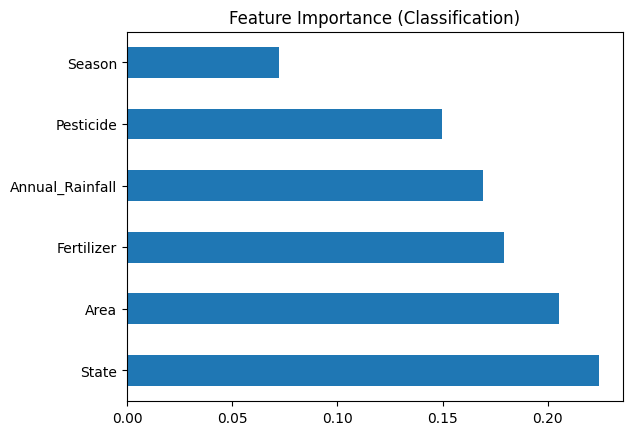

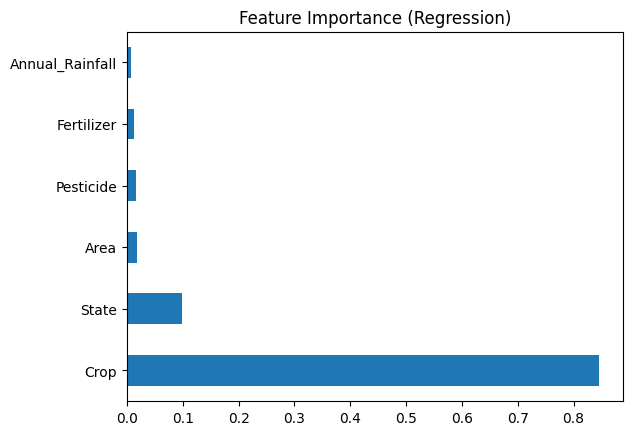

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Visualizing Data Distributions
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["Crop"]))
plt.title("Boxplot of Features (Excluding Crop)")
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance for Classification
smote = SMOTE(random_state=42)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Train Classification Model
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-score: {f1:.5f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(yc_test, yc_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train Regression Model
reg = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Scatter plot of actual vs. predicted yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x=yr_test, y=yr_pred, alpha=0.7)
plt.plot([min(yr_test), max(yr_test)], [min(yr_test), max(yr_test)], '--r', linewidth=2)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs. Predicted Yield")
plt.show()

# Feature Importance Visualization
feature_importances = pd.Series(clf.feature_importances_, index=X_class.columns)
feature_importances.nlargest(6).plot(kind='barh', title='Feature Importance (Classification)')
plt.show()

feature_importances_reg = pd.Series(reg.feature_importances_, index=X_reg.columns)
feature_importances_reg.nlargest(6).plot(kind='barh', title='Feature Importance (Regression)')
plt.show()



Confusion Matrix:
[[219   0   0 ...   0   0   0]
 [  0 137   2 ...   2   0   2]
 [  0   5 127 ...   7   0   1]
 ...
 [  1   3   6 ... 111   3   1]
 [  0   0   1 ...   3 190   0]
 [  0   0   1 ...   2   1 187]]


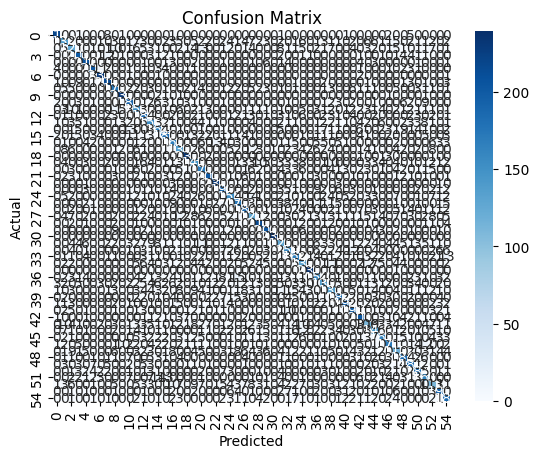


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       239
           1       0.63      0.57      0.60       240
           2       0.56      0.53      0.54       240
           3       0.78      0.84      0.81       239
           4       0.83      0.88      0.85       239
           5       0.88      0.85      0.86       239
           6       0.89      0.97      0.93       239
           7       0.84      0.90      0.87       240
           8       0.69      0.72      0.71       239
           9       0.91      0.97      0.94       239
          10       0.77      0.79      0.78       240
          11       0.65      0.64      0.64       239
          12       0.66      0.77      0.71       239
          13       0.61      0.65      0.63       239
          14       0.70      0.68      0.69       240
          15       0.75      0.76      0.76       239
          16       0.69      0.69      0.69       239
   

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Classification
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, "balanced"]
}
clf_base = RandomForestClassifier(random_state=42)
grid_search = RandomizedSearchCV(clf_base, param_grid, n_iter=15, cv=5, random_state=42, n_jobs=-1)
grid_search.fit(Xc_train, yc_train)
clf = grid_search.best_estimator_
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Train Regression Model
reg = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                            max_depth=grid_search.best_params_['max_depth'],
                            random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(yc_test, yc_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(yc_test, yc_pred))

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-score: {f1:.5f}")

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Crop Recommendation and Yield Prediction Function
def recommend_crop_and_yield(season, state, area, rainfall, fertilizer, pesticide):
    season_encoded = label_encoders["Season"].transform([season])[0] if season in label_encoders["Season"].classes_ else -1
    state_encoded = label_encoders["State"].transform([state])[0] if state in label_encoders["State"].classes_ else -1

    input_class = np.array([[season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_class_scaled = scaler_class.transform(input_class)
    predicted_crop_idx = clf.predict(input_class_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_idx])[0]

    input_reg = np.array([[predicted_crop_idx, season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_reg_scaled = scaler_reg.transform(input_reg)
    predicted_yield = reg.predict(input_reg_scaled)[0]

    print("Recommended Crop:", predicted_crop)
    print("Predicted Yield:", round(predicted_yield, 2), "kg/ha")

# Example Usage
recommend_crop_and_yield(season="Kharif", state="Maharashtra", area=5000, rainfall=1500, fertilizer=200000, pesticide=5000)

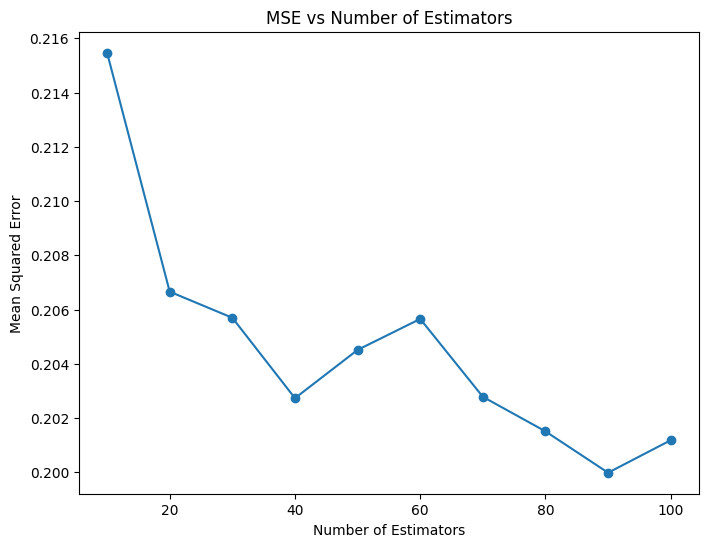


Classification Metrics:
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1-score: 0.76
Confusion Matrix:
 [[119   0   0 ...   0   0   0]
 [  0  68   3 ...   2   0   0]
 [  1   1  78 ...   1   1   2]
 ...
 [  1   0   4 ...  43   2   0]
 [  0   0   0 ...   0 100   1]
 [  0   0   2 ...   0   0  85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       125
           1       0.64      0.54      0.59       125
           2       0.64      0.62      0.63       125
           3       0.99      1.00      1.00       125
           4       0.77      0.82      0.79       125
           5       0.94      0.91      0.93       124
           6       0.93      0.99      0.96       125
           7       0.95      0.95      0.95       125
           8       0.67      0.70      0.69       125
           9       0.98      1.00      0.99       125
          10       0.84      0.76      0.80       125
          11       0.60      0.6

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Check Missing Values and Handle Them
df.fillna(df.median(numeric_only=True), inplace=True)

# Detect and Remove Outliers using IQR
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))
df = df[~outlier_condition.any(axis=1)]

# Encode Categorical Variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance
smote = SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=1)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled
)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

# Train Classification Model
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)
conf_matrix = confusion_matrix(yc_test, yc_pred)
class_report = classification_report(yc_test, yc_pred)

# Train Regression Model
reg = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Save Preprocessed Dataset
df.to_csv("preprocessed_crop_yield.csv", index=False)

# Visualize MSE vs Iterations
mse_values = []
for i in range(10, 110, 10):
    temp_reg = RandomForestRegressor(n_estimators=i, max_depth=20, random_state=42)
    temp_reg.fit(Xr_train, yr_train)
    temp_pred = temp_reg.predict(Xr_test)
    mse_values.append(mean_squared_error(yr_test, temp_pred))

plt.figure(figsize=(8, 6))
plt.plot(range(10, 110, 10), mse_values, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Number of Estimators")
plt.show()

# Output Classification Metrics
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Output Regression Metrics
print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Season           19689 non-null  object 
 2   State            19689 non-null  object 
 3   Area             19689 non-null  float64
 4   Annual_Rainfall  19689 non-null  float64
 5   Fertilizer       19689 non-null  float64
 6   Pesticide        19689 non-null  float64
 7   Yield            19689 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.2+ MB
None

Missing Values:
Crop               0
Season             0
State              0
Area               0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


<Figure size 1200x600 with 0 Axes>

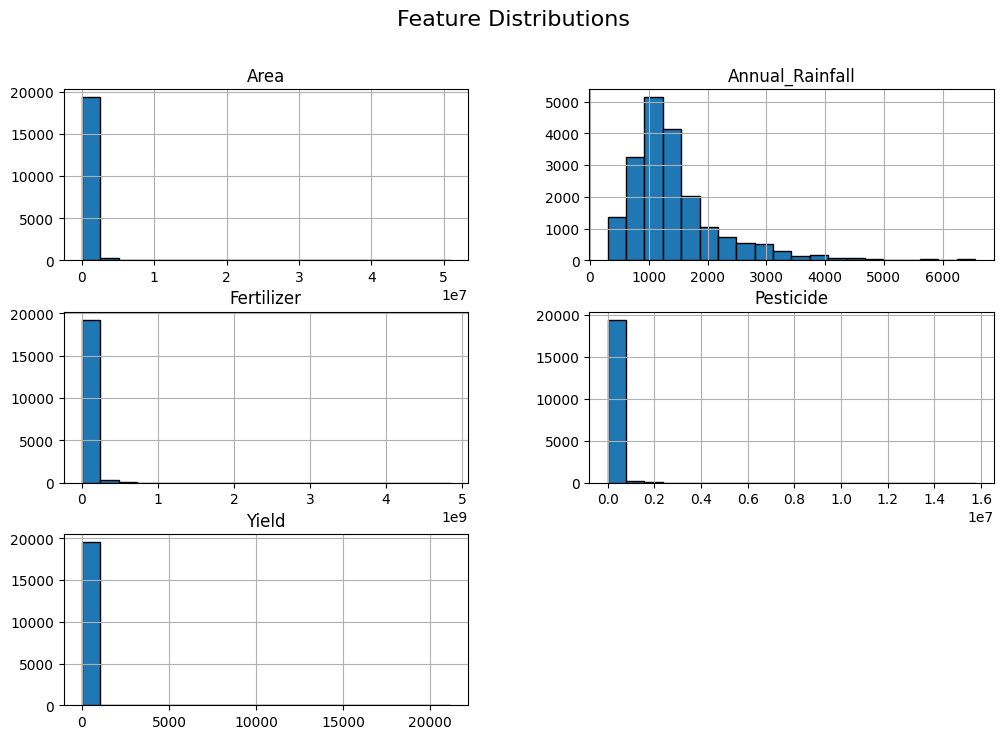


Classification Metrics:
Accuracy: 0.76
Confusion Matrix:
[[119   0   0 ...   0   0   0]
 [  0  68   3 ...   2   0   0]
 [  1   1  78 ...   1   1   2]
 ...
 [  1   0   4 ...  43   2   0]
 [  0   0   0 ...   0 100   1]
 [  0   0   2 ...   0   0  85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       125
           1       0.64      0.54      0.59       125
           2       0.64      0.62      0.63       125
           3       0.99      1.00      1.00       125
           4       0.77      0.82      0.79       125
           5       0.94      0.91      0.93       124
           6       0.93      0.99      0.96       125
           7       0.95      0.95      0.95       125
           8       0.67      0.70      0.69       125
           9       0.98      1.00      0.99       125
          10       0.84      0.76      0.80       125
          11       0.60      0.60      0.60       125
          12       0.67 

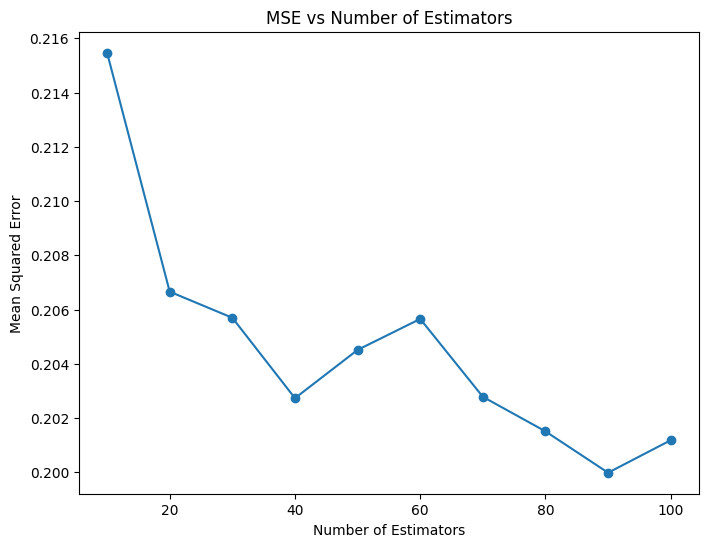


Recommended Crop: Sesamum
Predicted Yield: 0.62 kg/ha
Model Accuracy: 76.21 %


C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE

# Step 1: Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Step 2: Check Data Structure & Missing Values
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Step 3: Handle Missing Data (if any)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Step 4: Visualizing Data Distributions
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Step 5: Detect and Remove Outliers using IQR (Only for numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outlier_condition = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))

# Remove outliers
df = df[~outlier_condition.any(axis=1)]

# Step 6: Encode Categorical Variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 7: Define Dependent & Independent Variables
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]

# Step 8: Feature Scaling
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Step 9: Handle Class Imbalance (SMOTE for classification)
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=1)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Step 10: Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Step 11: Train Classification Model
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(yc_test, yc_pred))
print("Classification Report:")
print(classification_report(yc_test, yc_pred))

# Step 12: Train Regression Model
reg = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)
print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 13: Save Preprocessed Dataset
df.to_csv("preprocessed_crop_yield.csv", index=False)

# Step 14: Visualize MSE vs Iterations
mse_values = []
for i in range(10, 110, 10):
    temp_reg = RandomForestRegressor(n_estimators=i, max_depth=20, random_state=42)
    temp_reg.fit(Xr_train, yr_train)
    temp_pred = temp_reg.predict(Xr_test)
    mse_values.append(mean_squared_error(yr_test, temp_pred))

plt.figure(figsize=(8, 6))
plt.plot(range(10, 110, 10), mse_values, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Number of Estimators")
plt.show()

# Crop Recommendation and Yield Prediction Function
def recommend_crop_and_yield(season, state, area, rainfall, fertilizer, pesticide):
    season_encoded = label_encoders["Season"].transform([season])[0] if season in label_encoders["Season"].classes_ else -1
    state_encoded = label_encoders["State"].transform([state])[0] if state in label_encoders["State"].classes_ else -1
    
    input_class = np.array([[season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_class_scaled = scaler_class.transform(input_class)
    predicted_crop_idx = clf.predict(input_class_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_idx])[0]
    
    input_reg = np.array([[predicted_crop_idx, season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_reg_scaled = scaler_reg.transform(input_reg)
    predicted_yield = reg.predict(input_reg_scaled)[0]
    
    print("\nRecommended Crop:", predicted_crop)
    print("Predicted Yield:", round(predicted_yield, 2), "kg/ha")
    print("Model Accuracy:", round(accuracy * 100, 2), "%")

# Example Usage
recommend_crop_and_yield(season="Kharif", state="Maharashtra", area=5000, rainfall=1500, fertilizer=200000, pesticide=5000)

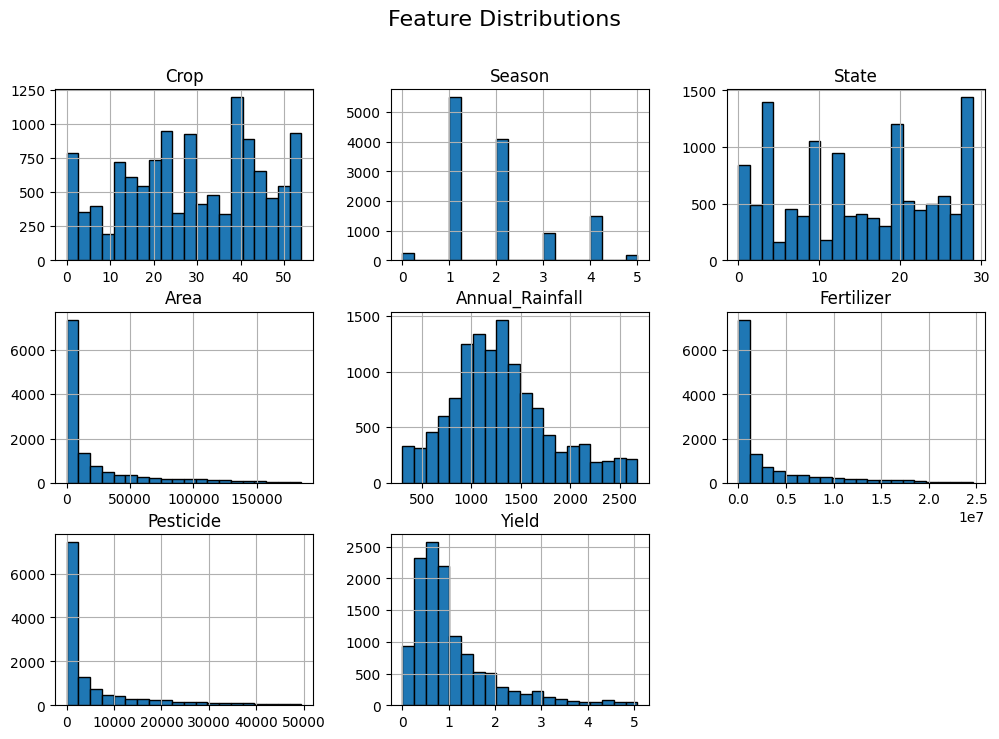

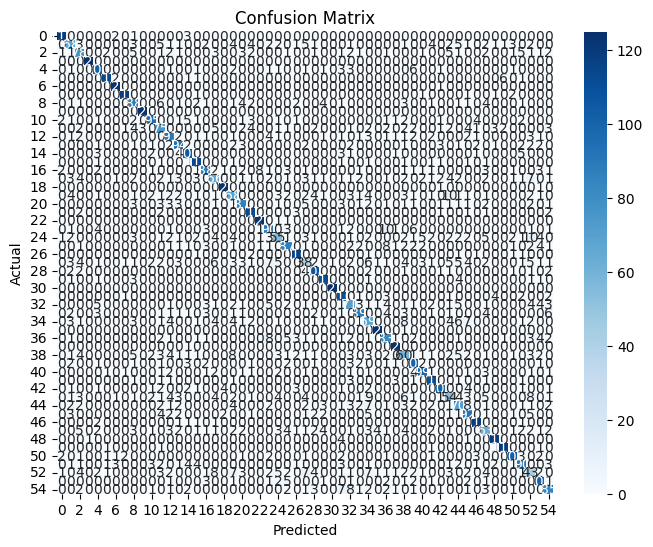

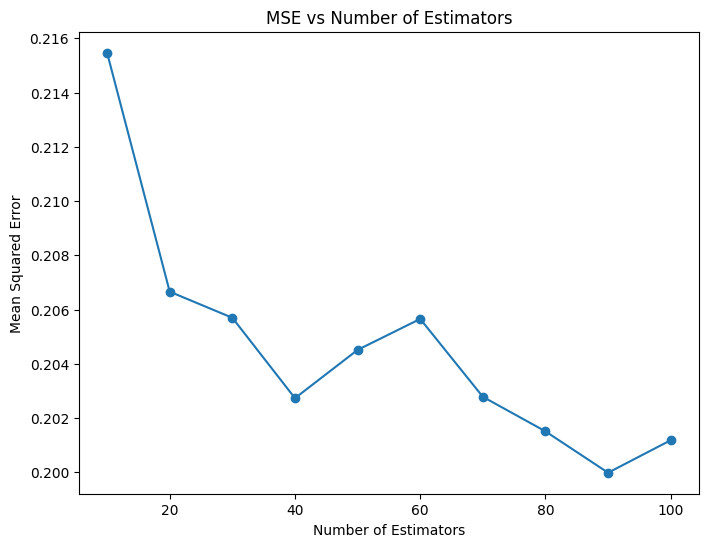


Classification Metrics:
Accuracy: 0.76209
Precision: 0.75581
Recall: 0.76209
F1-score: 0.75739

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       125
           1       0.64      0.54      0.59       125
           2       0.64      0.62      0.63       125
           3       0.99      1.00      1.00       125
           4       0.77      0.82      0.79       125
           5       0.94      0.91      0.93       124
           6       0.93      0.99      0.96       125
           7       0.95      0.95      0.95       125
           8       0.67      0.70      0.69       125
           9       0.98      1.00      0.99       125
          10       0.84      0.76      0.80       125
          11       0.60      0.60      0.60       125
          12       0.67      0.73      0.70       124
          13       0.72      0.76      0.74       124
          14       0.79      0.84      0.81       125
          15   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Handle Missing Data
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Remove Outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encode Categorical Variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance
smote = SMOTE(random_state=42, k_neighbors=1)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Train Classification Model
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Train Regression Model
reg = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Visualize Feature Distributions
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Visualize Confusion Matrix
conf_matrix = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize MSE vs Iterations
mse_values = []
for i in range(10, 110, 10):
    temp_reg = RandomForestRegressor(n_estimators=i, max_depth=20, random_state=42)
    temp_reg.fit(Xr_train, yr_train)
    temp_pred = temp_reg.predict(Xr_test)
    mse_values.append(mean_squared_error(yr_test, temp_pred))

plt.figure(figsize=(8, 6))
plt.plot(range(10, 110, 10), mse_values, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Number of Estimators")
plt.show()

# Output Metrics
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-score: {f1:.5f}")
print("\nClassification Report:")
print(classification_report(yc_test, yc_pred))

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


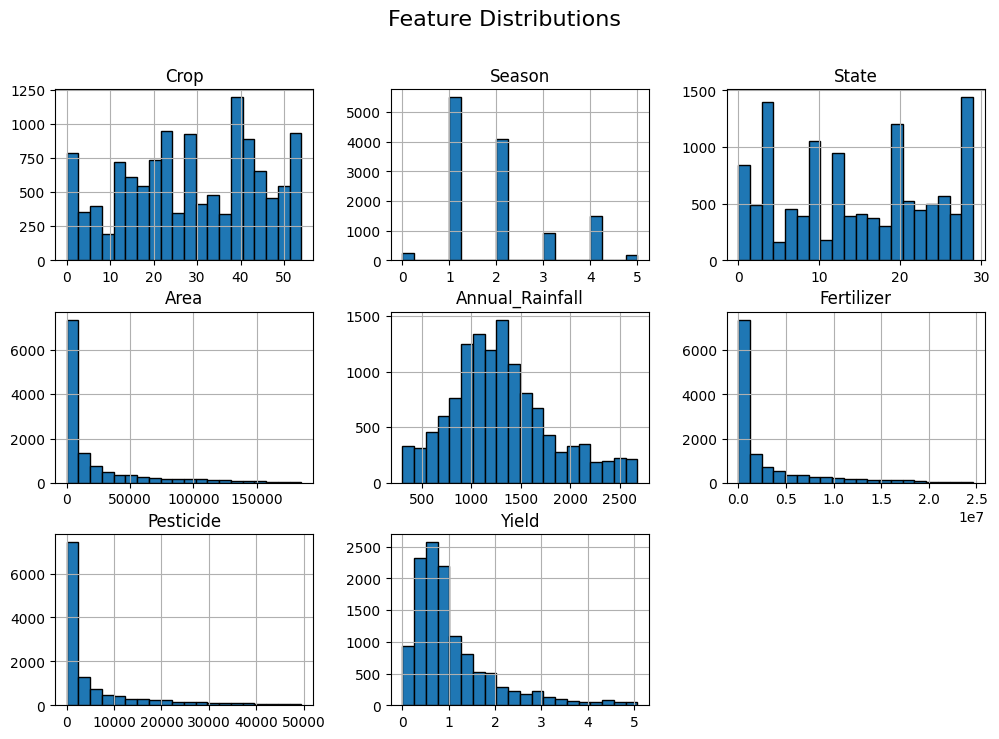

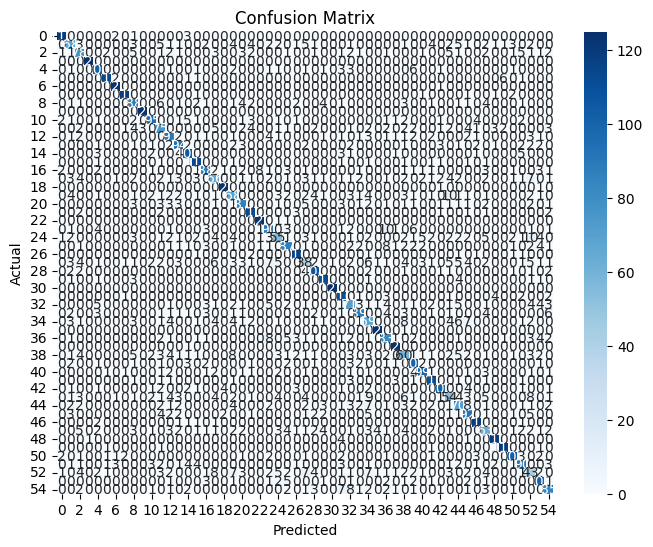

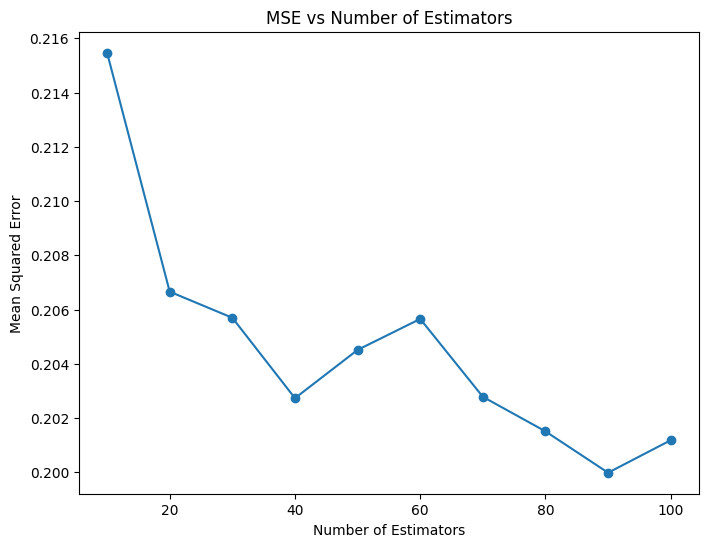

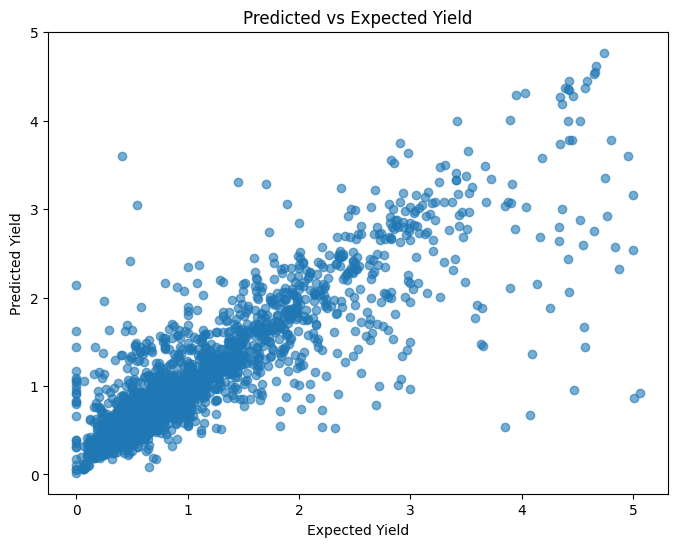

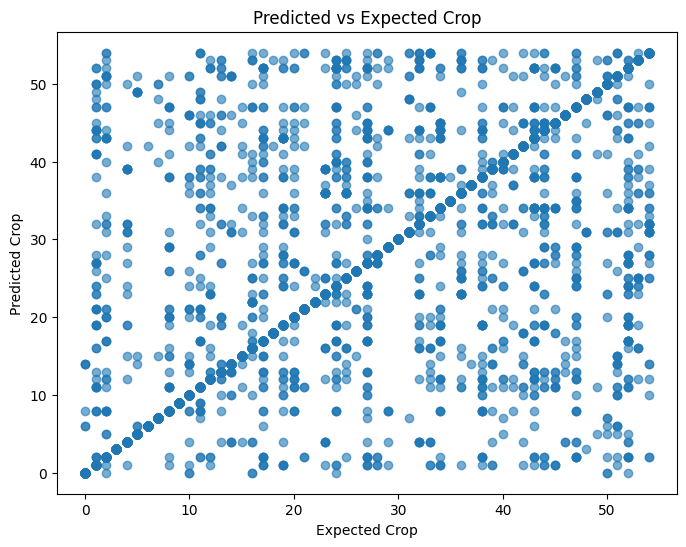


Classification Metrics:
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1-score: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       125
           1       0.64      0.54      0.59       125
           2       0.64      0.62      0.63       125
           3       0.99      1.00      1.00       125
           4       0.77      0.82      0.79       125
           5       0.94      0.91      0.93       124
           6       0.93      0.99      0.96       125
           7       0.95      0.95      0.95       125
           8       0.67      0.70      0.69       125
           9       0.98      1.00      0.99       125
          10       0.84      0.76      0.80       125
          11       0.60      0.60      0.60       125
          12       0.67      0.73      0.70       124
          13       0.72      0.76      0.74       124
          14       0.79      0.84      0.81       125
          15       0.82    

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Handle Missing Data
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Remove Outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encode Categorical Variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance
smote = SMOTE(random_state=42, k_neighbors=1)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Train Classification Model
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Train Regression Model
reg = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Visualize Feature Distributions
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Visualize Confusion Matrix
conf_matrix = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize MSE vs Iterations
mse_values = []
for i in range(10, 110, 10):
    temp_reg = RandomForestRegressor(n_estimators=i, max_depth=20, random_state=42)
    temp_reg.fit(Xr_train, yr_train)
    temp_pred = temp_reg.predict(Xr_test)
    mse_values.append(mean_squared_error(yr_test, temp_pred))

plt.figure(figsize=(8, 6))
plt.plot(range(10, 110, 10), mse_values, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Number of Estimators")
plt.show()

# Visualize Predicted vs Expected for Regression
plt.figure(figsize=(8, 6))
plt.scatter(yr_test, yr_pred, alpha=0.6)
plt.xlabel("Expected Yield")
plt.ylabel("Predicted Yield")
plt.title("Predicted vs Expected Yield")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(yc_test, yc_pred, alpha=0.6)
plt.xlabel("Expected Crop")
plt.ylabel("Predicted Crop")
plt.title("Predicted vs Expected Crop")
plt.show()

# Output Metrics
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(yc_test, yc_pred))

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Handle Missing Data
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Remove Outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encode Categorical Variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance
smote = SMOTE(random_state=42, k_neighbors=1)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Train Classification Model
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Train Regression Model
reg = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Function to Recommend Crop and Predict Yield
def recommend_crop_and_yield(season, state, area, rainfall, fertilizer, pesticide):
    if season not in label_encoders["Season"].classes_:
        print(f"Error: Season '{season}' not recognized. Please enter a valid season.")
        return
    if state not in label_encoders["State"].classes_:
        print(f"Error: State '{state}' not recognized. Please enter a valid state.")
        return

    season_encoded = label_encoders["Season"].transform([season])[0]
    state_encoded = label_encoders["State"].transform([state])[0]

    input_class = np.array([[season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_class_scaled = scaler_class.transform(input_class)
    predicted_crop_idx = clf.predict(input_class_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_idx])[0]

    input_reg = np.array([[predicted_crop_idx, season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_reg_scaled = scaler_reg.transform(input_reg)
    predicted_yield = reg.predict(input_reg_scaled)[0]

    print("Recommended Crop:", predicted_crop)
    print("Predicted Yield:", round(predicted_yield, 2), "kg/ha")

# Example Usage
recommend_crop_and_yield(season="Kharif", state="Maharashtra", area=5000, rainfall=1500, fertilizer=200000, pesticide=5000)


Error: Season 'Kharif' not recognized. Please enter a valid season.


In [12]:
def recommend_crop_and_yield(season, state, area, rainfall, fertilizer, pesticide):
    season_encoded = label_encoders["Season"].transform([season])[0] if season in label_encoders["Season"].classes_ else -1
    state_encoded = label_encoders["State"].transform([state])[0] if state in label_encoders["State"].classes_ else -1

    input_class = np.array([[season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_class_scaled = scaler_class.transform(input_class)
    predicted_crop_idx = clf.predict(input_class_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_idx])[0]

    input_reg = np.array([[predicted_crop_idx, season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_reg_scaled = scaler_reg.transform(input_reg)
    predicted_yield = reg.predict(input_reg_scaled)[0]

    print("Recommended Crop:", predicted_crop)
    print("Predicted Yield:", round(predicted_yield, 2), "kg/ha")

# Example Usage
recommend_crop_and_yield(season="Kharif", state="Maharashtra", area=5000, rainfall=1500, fertilizer=200000, pesticide=5000)

Recommended Crop: Sesamum
Predicted Yield: 0.62 kg/ha


C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Handle Missing Data
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Remove Outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encode Categorical Variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance
smote = SMOTE(random_state=42, k_neighbors=1)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Train Classification Model
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Train Regression Model
reg = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Function to Recommend Crop and Predict Yield
def recommend_crop_and_yield(season, state, area, rainfall, fertilizer, pesticide):
    season_encoded = label_encoders["Season"].transform([season])[0] if season in label_encoders["Season"].classes_ else -1
    state_encoded = label_encoders["State"].transform([state])[0] if state in label_encoders["State"].classes_ else -1

    input_class = np.array([[season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_class_scaled = scaler_class.transform(input_class)
    predicted_crop_idx = clf.predict(input_class_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_idx])[0]

    input_reg = np.array([[predicted_crop_idx, season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_reg_scaled = scaler_reg.transform(input_reg)
    predicted_yield = reg.predict(input_reg_scaled)[0]

    print("Recommended Crop:", predicted_crop)
    print("Predicted Yield:", round(predicted_yield, 2), "kg/ha")

# Example Usage
recommend_crop_and_yield(season="Kharif", state="Maharashtra", area=5000, rainfall=1500, fertilizer=200000, pesticide=5000)


Recommended Crop: Sesamum
Predicted Yield: 0.62 kg/ha


C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


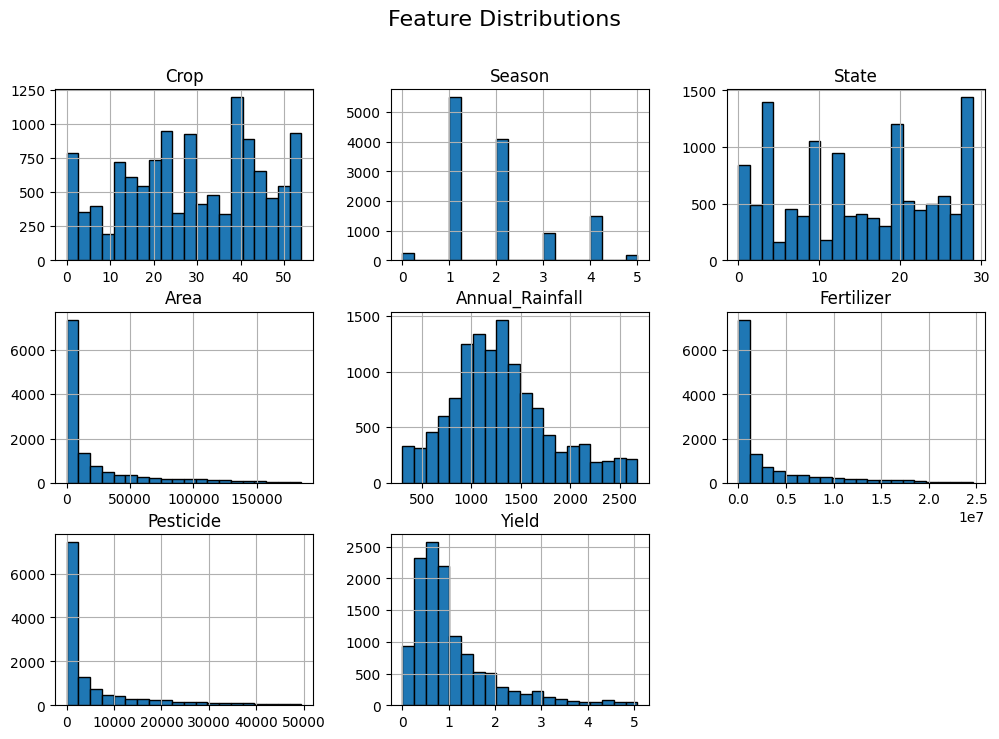

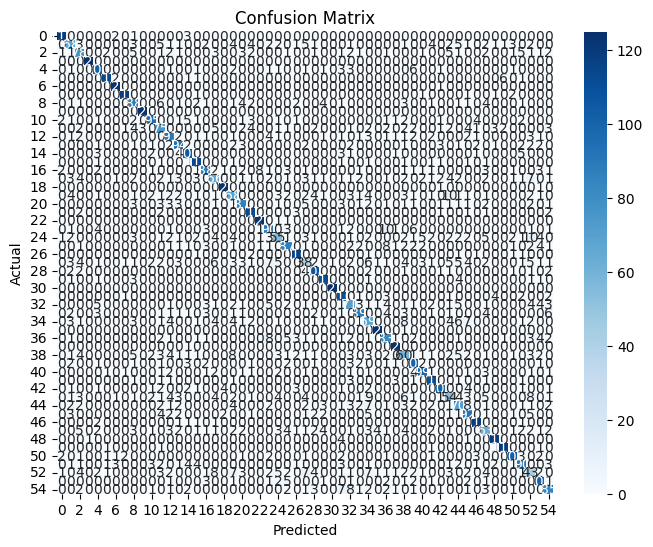

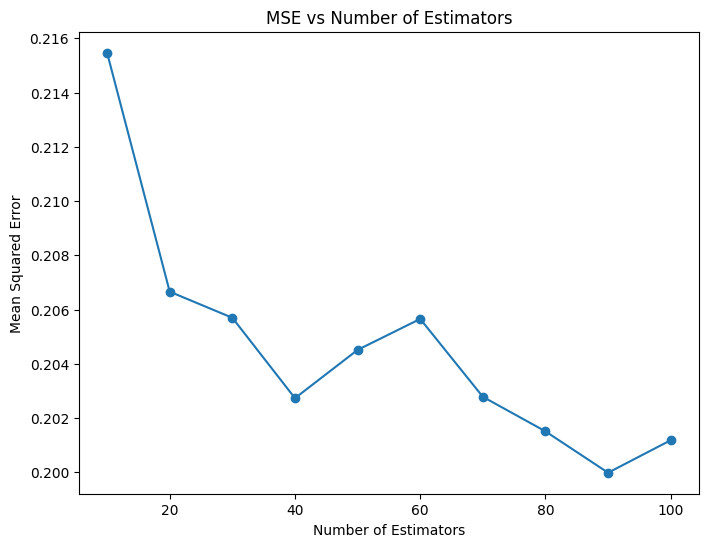

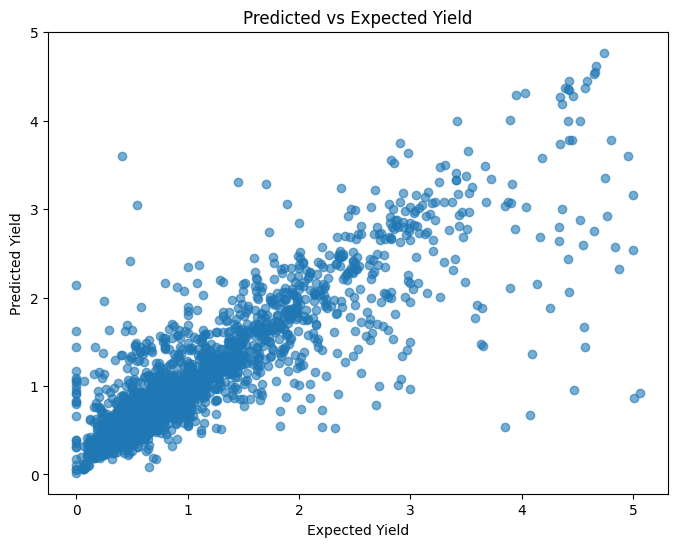

Error: Season 'Kharif' not recognized. Please enter a valid season.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Handle Missing Data
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Remove Outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encode Categorical Variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance
smote = SMOTE(random_state=42, k_neighbors=1)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Train Classification Model
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Train Regression Model
reg = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Visualize Feature Distributions
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Visualize Confusion Matrix
conf_matrix = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize MSE vs Iterations
mse_values = []
for i in range(10, 110, 10):
    temp_reg = RandomForestRegressor(n_estimators=i, max_depth=20, random_state=42)
    temp_reg.fit(Xr_train, yr_train)
    temp_pred = temp_reg.predict(Xr_test)
    mse_values.append(mean_squared_error(yr_test, temp_pred))

plt.figure(figsize=(8, 6))
plt.plot(range(10, 110, 10), mse_values, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Number of Estimators")
plt.show()

# Visualize Predicted vs Expected for Regression
plt.figure(figsize=(8, 6))
plt.scatter(yr_test, yr_pred, alpha=0.6)
plt.xlabel("Expected Yield")
plt.ylabel("Predicted Yield")
plt.title("Predicted vs Expected Yield")
plt.show()

# Function to Recommend Crop and Predict Yield
def recommend_crop_and_yield(season, state, area, rainfall, fertilizer, pesticide):
    if season not in label_encoders["Season"].classes_:
        print(f"Error: Season '{season}' not recognized. Please enter a valid season.")
        return
    if state not in label_encoders["State"].classes_:
        print(f"Error: State '{state}' not recognized. Please enter a valid state.")
        return

    season_encoded = label_encoders["Season"].transform([season])[0]
    state_encoded = label_encoders["State"].transform([state])[0]

    input_class = np.array([[season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_class_scaled = scaler_class.transform(input_class)
    predicted_crop_idx = clf.predict(input_class_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_idx])[0]

    input_reg = np.array([[predicted_crop_idx, season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_reg_scaled = scaler_reg.transform(input_reg)
    predicted_yield = reg.predict(input_reg_scaled)[0]

    print("Recommended Crop:", predicted_crop)
    print("Predicted Yield:", round(predicted_yield, 2), "kg/ha")

# Example Usage
recommend_crop_and_yield(season="Kharif", state="Maharashtra", area=5000, rainfall=1500, fertilizer=200000, pesticide=5000)


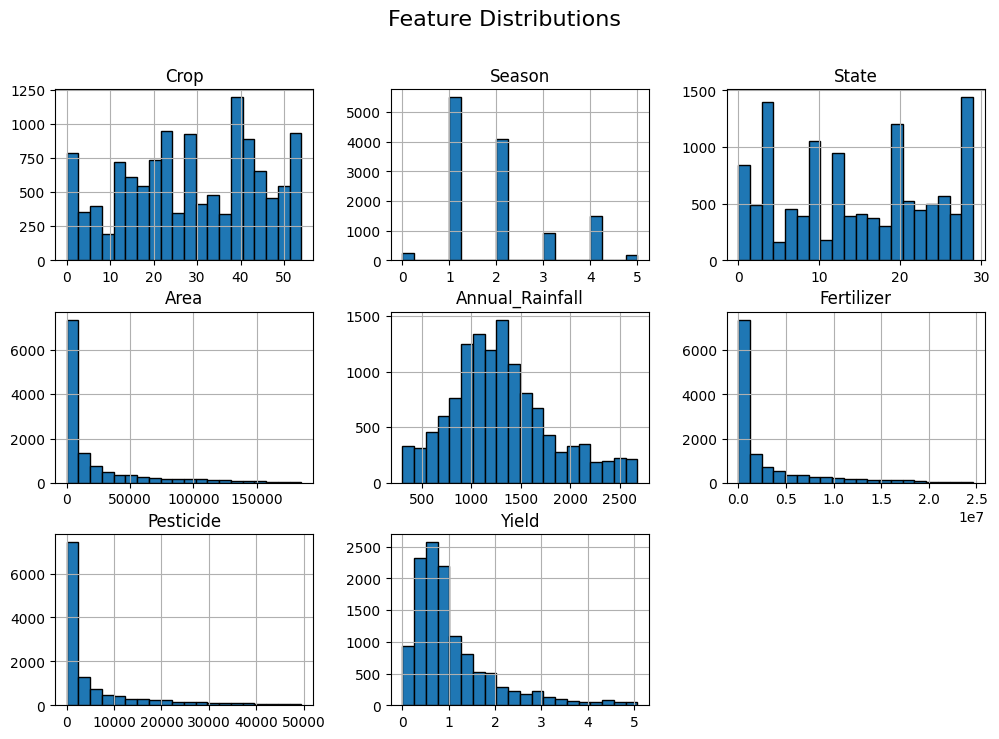

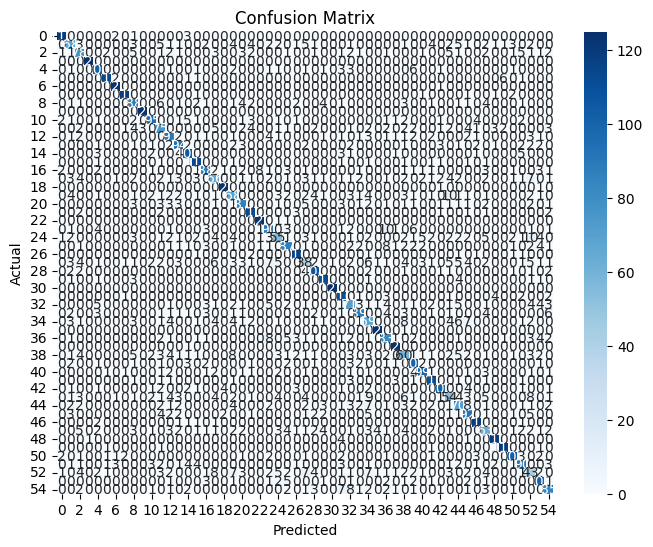

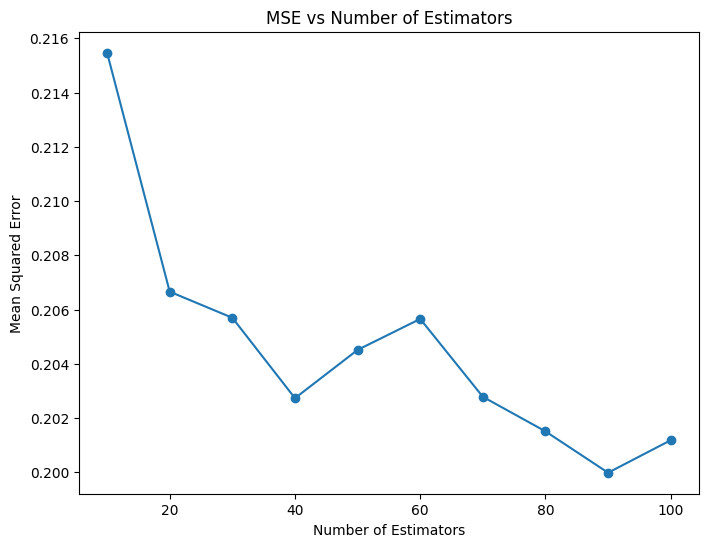

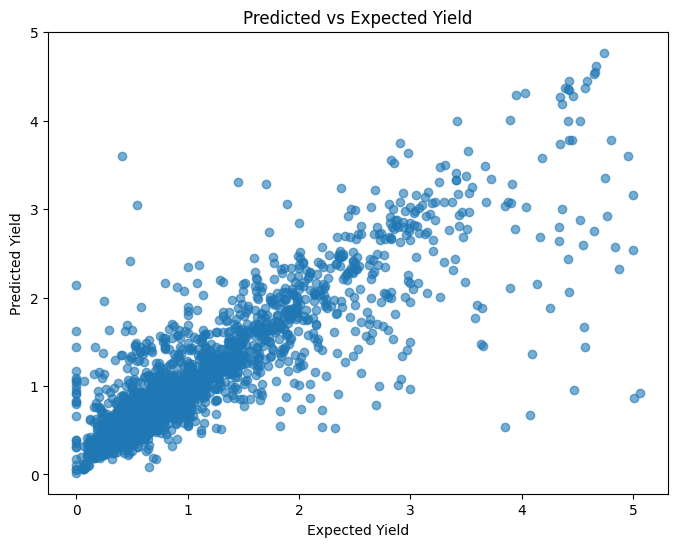

Error: Season 'Kharif' not recognized. Please enter a valid season.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Handle Missing Data
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Remove Outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encode Categorical Variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance
smote = SMOTE(random_state=42, k_neighbors=1)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Train Classification Model
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Train Regression Model
reg = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Visualize Feature Distributions
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Visualize Confusion Matrix
conf_matrix = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize MSE vs Iterations
mse_values = []
for i in range(10, 110, 10):
    temp_reg = RandomForestRegressor(n_estimators=i, max_depth=20, random_state=42)
    temp_reg.fit(Xr_train, yr_train)
    temp_pred = temp_reg.predict(Xr_test)
    mse_values.append(mean_squared_error(yr_test, temp_pred))

plt.figure(figsize=(8, 6))
plt.plot(range(10, 110, 10), mse_values, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Number of Estimators")
plt.show()

# Visualize Predicted vs Expected for Regression
plt.figure(figsize=(8, 6))
plt.scatter(yr_test, yr_pred, alpha=0.6)
plt.xlabel("Expected Yield")
plt.ylabel("Predicted Yield")
plt.title("Predicted vs Expected Yield")
plt.show()

# Function to Recommend Crop and Predict Yield
def recommend_crop_and_yield(season, state, area, rainfall, fertilizer, pesticide):
    if season not in label_encoders["Season"].classes_:
        print(f"Error: Season '{season}' not recognized. Please enter a valid season.")
        return
    if state not in label_encoders["State"].classes_:
        print(f"Error: State '{state}' not recognized. Please enter a valid state.")
        return

    season_encoded = label_encoders["Season"].transform([season])[0]
    state_encoded = label_encoders["State"].transform([state])[0]

    input_class = np.array([[season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_class_scaled = scaler_class.transform(input_class)
    predicted_crop_idx = clf.predict(input_class_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_idx])[0]

    input_reg = np.array([[predicted_crop_idx, season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_reg_scaled = scaler_reg.transform(input_reg)
    predicted_yield = reg.predict(input_reg_scaled)[0]

    print("Recommended Crop:", predicted_crop)
    print("Predicted Yield:", round(predicted_yield, 2), "kg/ha")

# Example Usage
recommend_crop_and_yield(season="Kharif", state="Maharashtra", area=5000, rainfall=1500, fertilizer=200000, pesticide=5000)


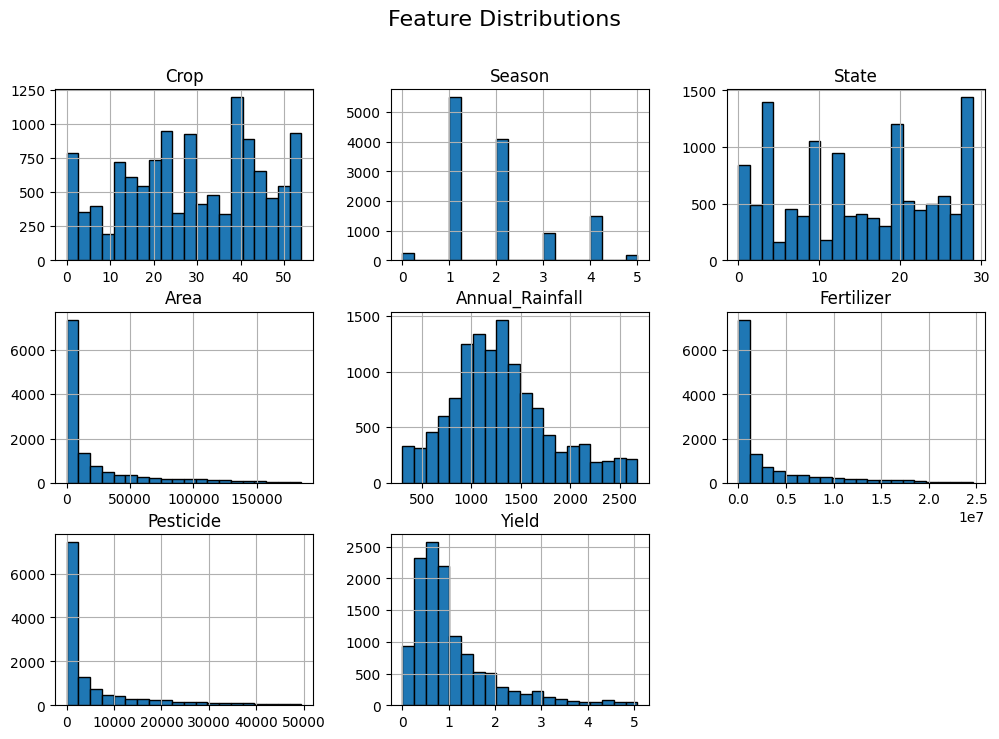

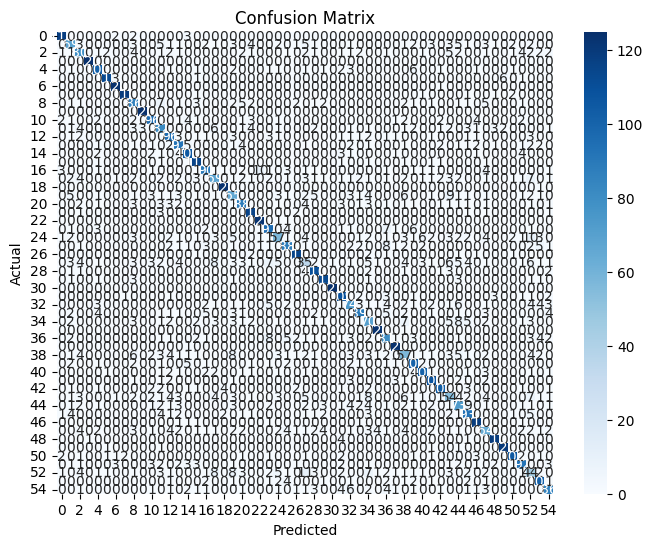

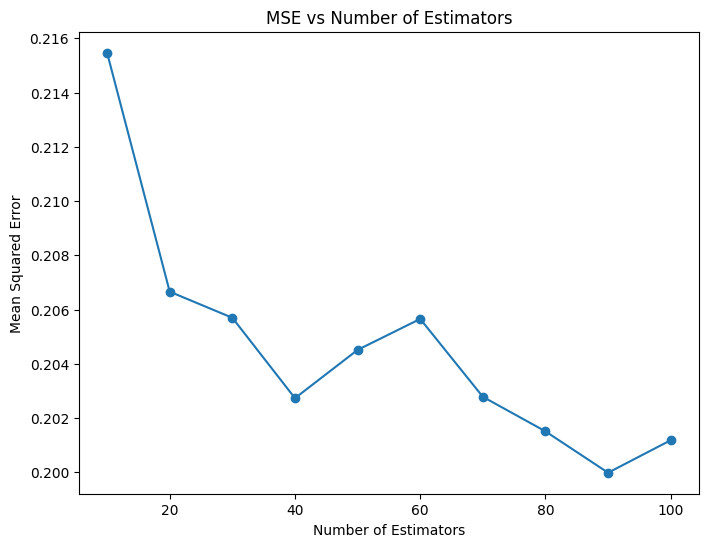


Classification Metrics:
Accuracy: 0.76865
Precision: 0.76261
Recall: 0.76865
F1-score: 0.76421

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       125
           1       0.64      0.55      0.59       125
           2       0.65      0.64      0.65       125
           3       0.99      1.00      1.00       125
           4       0.78      0.82      0.80       125
           5       0.95      0.91      0.93       124
           6       0.92      0.99      0.95       125
           7       0.98      0.95      0.96       125
           8       0.64      0.69      0.66       125
           9       0.98      1.00      0.99       125
          10       0.81      0.77      0.79       125
          11       0.62      0.66      0.64       125
          12       0.71      0.77      0.74       124
          13       0.70      0.74      0.72       124
          14       0.79      0.85      0.82       125
          15   

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Handle Missing Data
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Remove Outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encode Categorical Variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance
smote = SMOTE(random_state=42, k_neighbors=1)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Classification
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, "balanced"]
}

clf_base = RandomForestClassifier(random_state=42)
grid_search = RandomizedSearchCV(clf_base, param_grid, n_iter=15, cv=5, random_state=42, n_jobs=-1)
grid_search.fit(Xc_train, yc_train)
clf = grid_search.best_estimator_

# Train Classification Model
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Train Regression Model
reg = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                            max_depth=grid_search.best_params_['max_depth'],
                            random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Visualize Feature Distributions
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Visualize Confusion Matrix
conf_matrix = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize MSE vs Iterations
mse_values = []
for i in range(10, 110, 10):
    temp_reg = RandomForestRegressor(n_estimators=i, max_depth=20, random_state=42)
    temp_reg.fit(Xr_train, yr_train)
    temp_pred = temp_reg.predict(Xr_test)
    mse_values.append(mean_squared_error(yr_test, temp_pred))

plt.figure(figsize=(8, 6))
plt.plot(range(10, 110, 10), mse_values, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Number of Estimators")
plt.show()

# Output Metrics
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-score: {f1:.5f}")
print("\nClassification Report:")
print(classification_report(yc_test, yc_pred))

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Crop Recommendation and Yield Prediction Function
def recommend_crop_and_yield(season, state, area, rainfall, fertilizer, pesticide):
    season_encoded = label_encoders["Season"].transform([season])[0] if season in label_encoders["Season"].classes_ else -1
    state_encoded = label_encoders["State"].transform([state])[0] if state in label_encoders["State"].classes_ else -1

    input_class = np.array([[season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_class_scaled = scaler_class.transform(input_class)
    predicted_crop_idx = clf.predict(input_class_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_idx])[0]
    
    input_reg = np.array([[predicted_crop_idx, season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_reg_scaled = scaler_reg.transform(input_reg)
    predicted_yield = reg.predict(input_reg_scaled)[0]
    
    print("\nRecommended Crop:", predicted_crop)
    print("Predicted Yield:", round(predicted_yield, 2), "kg/ha")

# Example Usage
recommend_crop_and_yield(season="Kharif", state="Maharashtra", area=5000, rainfall=1500, fertilizer=200000, pesticide=5000)

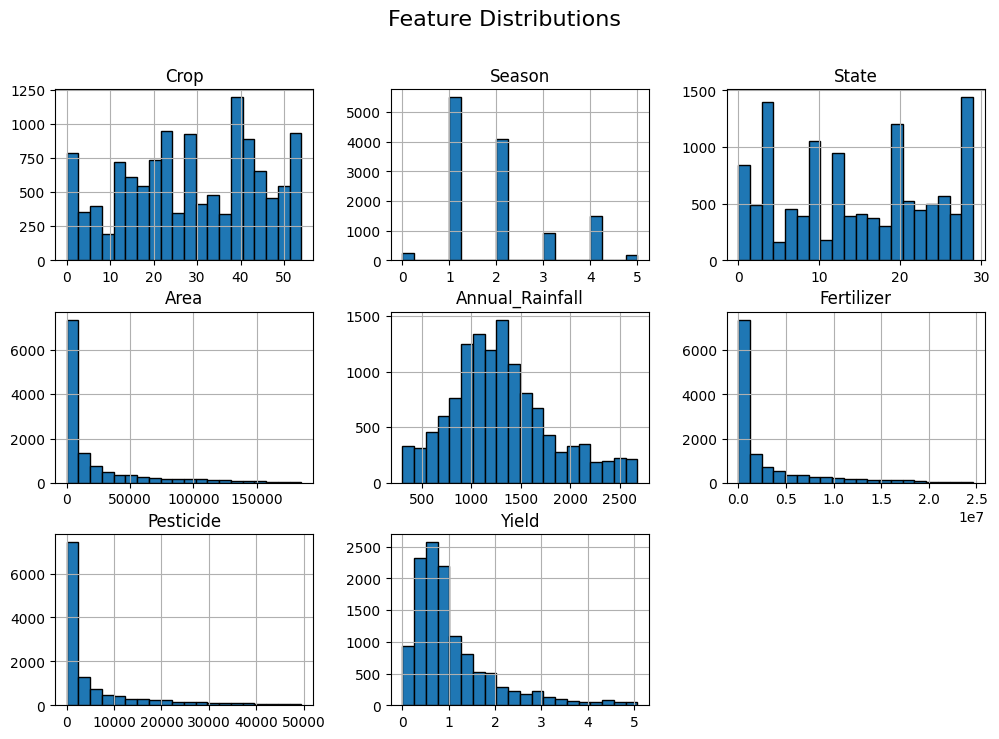

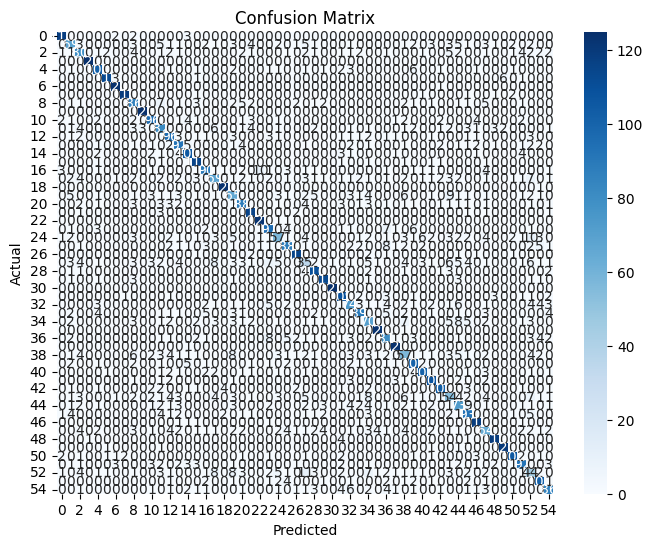

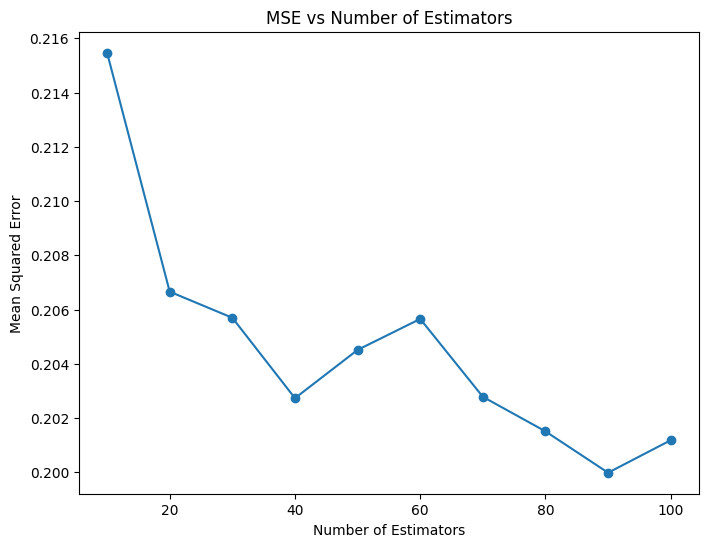


Classification Metrics:
Accuracy: 0.76865
Precision: 0.76261
Recall: 0.76865
F1-score: 0.76421

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       125
           1       0.64      0.55      0.59       125
           2       0.65      0.64      0.65       125
           3       0.99      1.00      1.00       125
           4       0.78      0.82      0.80       125
           5       0.95      0.91      0.93       124
           6       0.92      0.99      0.95       125
           7       0.98      0.95      0.96       125
           8       0.64      0.69      0.66       125
           9       0.98      1.00      0.99       125
          10       0.81      0.77      0.79       125
          11       0.62      0.66      0.64       125
          12       0.71      0.77      0.74       124
          13       0.70      0.74      0.72       124
          14       0.79      0.85      0.82       125
          15   

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Handle Missing Data
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Remove Outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encode Categorical Variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance
smote = SMOTE(random_state=42, k_neighbors=1)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Classification
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, "balanced"]
}

clf_base = RandomForestClassifier(random_state=42)
grid_search = RandomizedSearchCV(clf_base, param_grid, n_iter=15, cv=5, random_state=42, n_jobs=-1)
grid_search.fit(Xc_train, yc_train)
clf = grid_search.best_estimator_

# Train Classification Model
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Train Regression Model
reg = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                            max_depth=grid_search.best_params_['max_depth'],
                            random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Visualize Feature Distributions
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Visualize Confusion Matrix
conf_matrix = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize MSE vs Iterations
mse_values = []
for i in range(10, 110, 10):
    temp_reg = RandomForestRegressor(n_estimators=i, max_depth=20, random_state=42)
    temp_reg.fit(Xr_train, yr_train)
    temp_pred = temp_reg.predict(Xr_test)
    mse_values.append(mean_squared_error(yr_test, temp_pred))

plt.figure(figsize=(8, 6))
plt.plot(range(10, 110, 10), mse_values, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Number of Estimators")
plt.show()

# Output Metrics
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-score: {f1:.5f}")
print("\nClassification Report:")
print(classification_report(yc_test, yc_pred))

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Crop Recommendation and Yield Prediction Function
def recommend_crop_and_yield(season, state, area, rainfall, fertilizer, pesticide):
    season_encoded = label_encoders["Season"].transform([season])[0] if season in label_encoders["Season"].classes_ else -1
    state_encoded = label_encoders["State"].transform([state])[0] if state in label_encoders["State"].classes_ else -1

    input_class = np.array([[season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_class_scaled = scaler_class.transform(input_class)
    predicted_crop_idx = clf.predict(input_class_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_idx])[0]
    
    input_reg = np.array([[predicted_crop_idx, season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_reg_scaled = scaler_reg.transform(input_reg)
    predicted_yield = reg.predict(input_reg_scaled)[0]
    
    print("\nRecommended Crop:", predicted_crop)
    print("Predicted Yield:", round(predicted_yield, 2), "kg/ha")

# Example Usage
recommend_crop_and_yield(season="Kharif", state="Maharashtra", area=5000, rainfall=1500, fertilizer=200000, pesticide=5000)

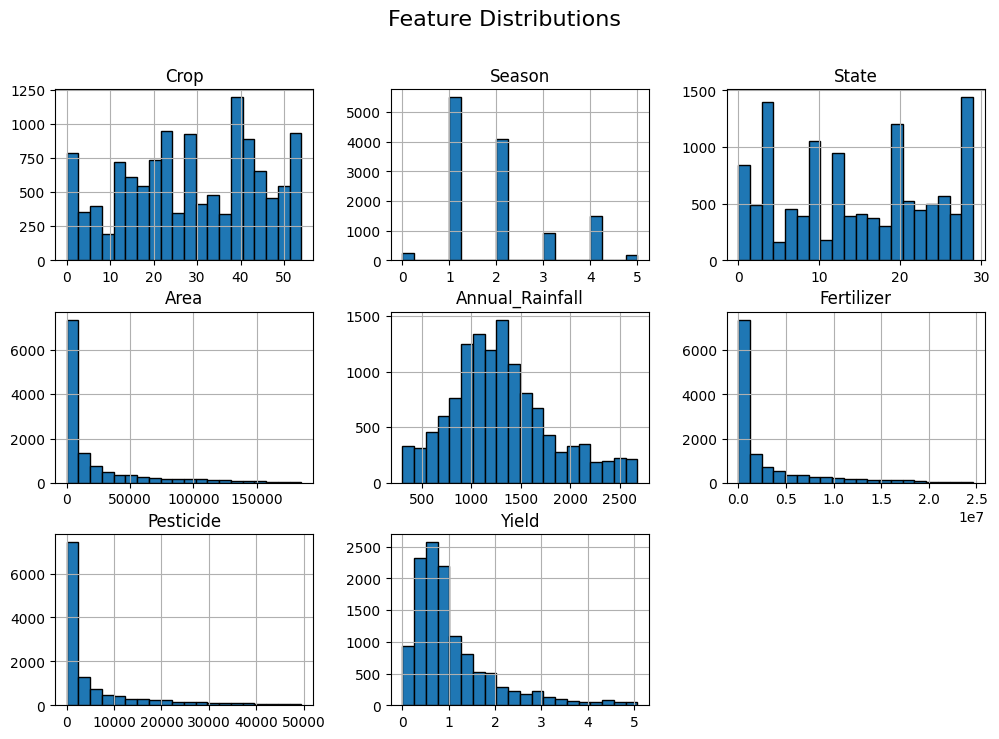

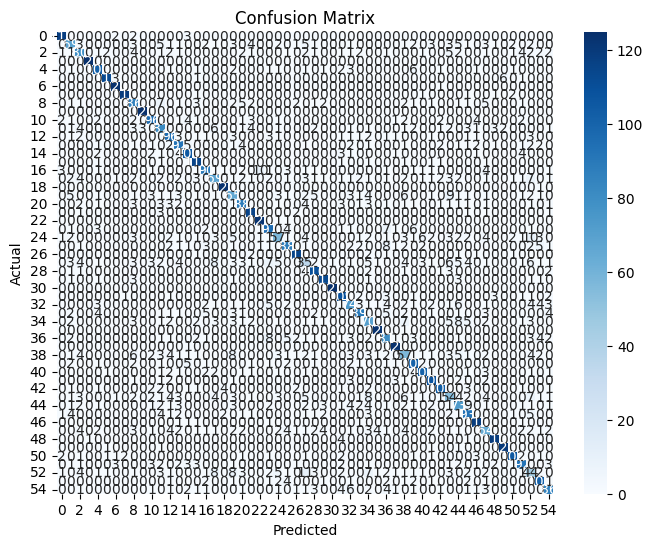

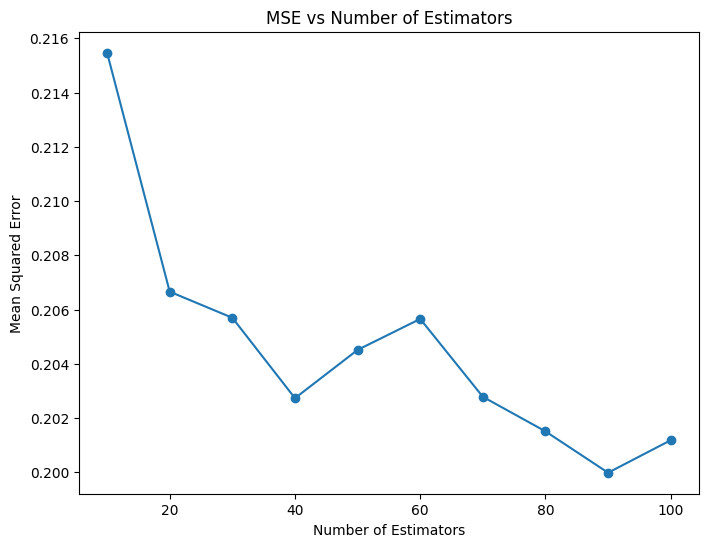


Classification Metrics:
Accuracy: 0.76865
Precision: 0.76261
Recall: 0.76865
F1-score: 0.76421

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       125
           1       0.64      0.55      0.59       125
           2       0.65      0.64      0.65       125
           3       0.99      1.00      1.00       125
           4       0.78      0.82      0.80       125
           5       0.95      0.91      0.93       124
           6       0.92      0.99      0.95       125
           7       0.98      0.95      0.96       125
           8       0.64      0.69      0.66       125
           9       0.98      1.00      0.99       125
          10       0.81      0.77      0.79       125
          11       0.62      0.66      0.64       125
          12       0.71      0.77      0.74       124
          13       0.70      0.74      0.72       124
          14       0.79      0.85      0.82       125
          15   

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Handle Missing Data
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Remove Outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encode Categorical Variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance
smote = SMOTE(random_state=42, k_neighbors=1)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Classification
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, "balanced"]
}

clf_base = RandomForestClassifier(random_state=42)
grid_search = RandomizedSearchCV(clf_base, param_grid, n_iter=15, cv=5, random_state=42, n_jobs=-1)
grid_search.fit(Xc_train, yc_train)
clf = grid_search.best_estimator_

# Train Classification Model
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Train Regression Model
reg = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                            max_depth=grid_search.best_params_['max_depth'],
                            random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Visualize Feature Distributions
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Visualize Confusion Matrix
conf_matrix = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize MSE vs Iterations
mse_values = []
for i in range(10, 110, 10):
    temp_reg = RandomForestRegressor(n_estimators=i, max_depth=20, random_state=42)
    temp_reg.fit(Xr_train, yr_train)
    temp_pred = temp_reg.predict(Xr_test)
    mse_values.append(mean_squared_error(yr_test, temp_pred))

plt.figure(figsize=(8, 6))
plt.plot(range(10, 110, 10), mse_values, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Number of Estimators")
plt.show()

# Output Metrics
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-score: {f1:.5f}")
print("\nClassification Report:")
print(classification_report(yc_test, yc_pred))

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Crop Recommendation and Yield Prediction Function
def recommend_crop_and_yield(season, state, area, rainfall, fertilizer, pesticide):
    season_encoded = label_encoders["Season"].transform([season])[0] if season in label_encoders["Season"].classes_ else -1
    state_encoded = label_encoders["State"].transform([state])[0] if state in label_encoders["State"].classes_ else -1

    input_class = np.array([[season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_class_scaled = scaler_class.transform(input_class)
    predicted_crop_idx = clf.predict(input_class_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_idx])[0]
    
    input_reg = np.array([[predicted_crop_idx, season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_reg_scaled = scaler_reg.transform(input_reg)
    predicted_yield = reg.predict(input_reg_scaled)[0]
    
    print("\nRecommended Crop:", predicted_crop)
    print("Predicted Yield:", round(predicted_yield, 2), "kg/ha")
    print("Model Accuracy (Classification):", round(accuracy * 100, 2), "%")

# Example Usage
recommend_crop_and_yield(season="Kharif", state="Maharashtra", area=5000, rainfall=1500, fertilizer=200000, pesticide=5000)

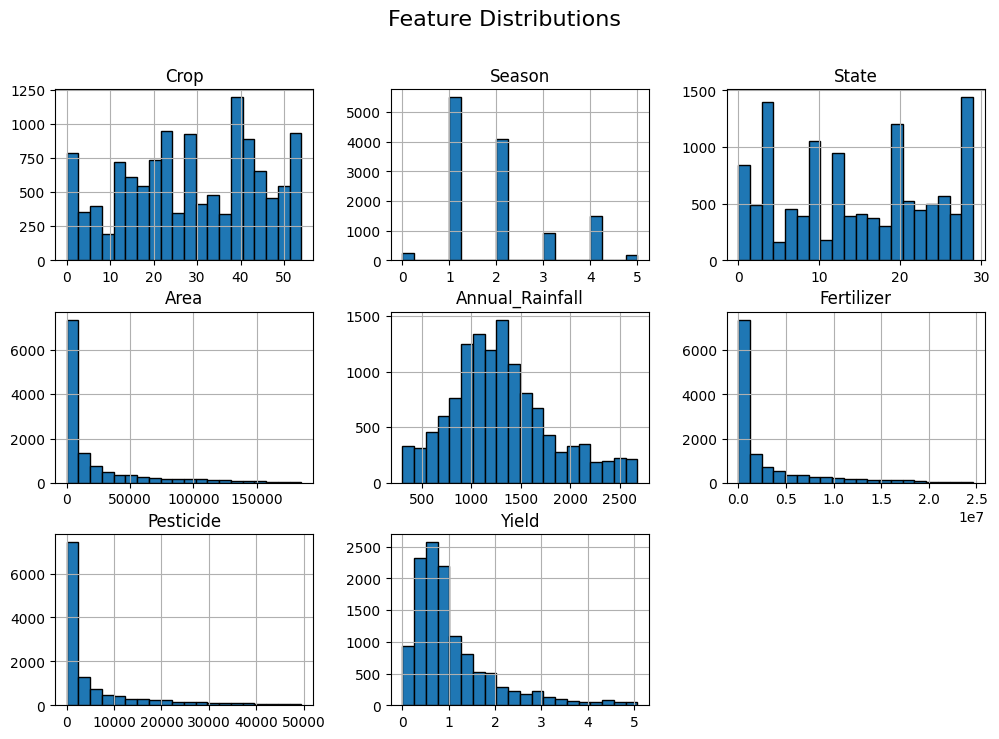

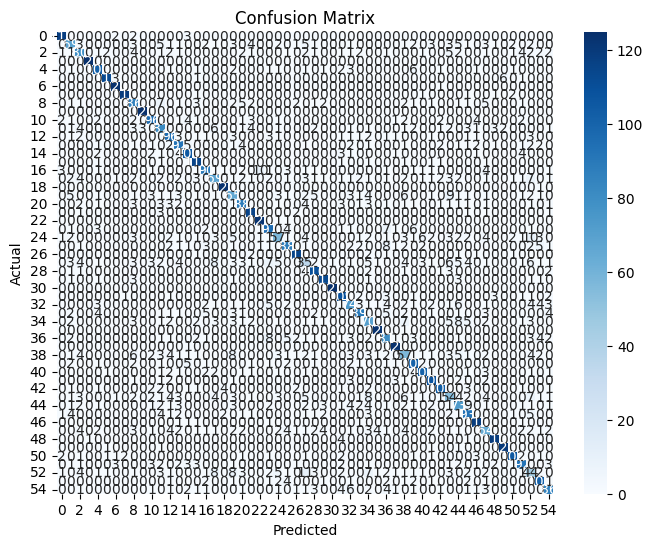

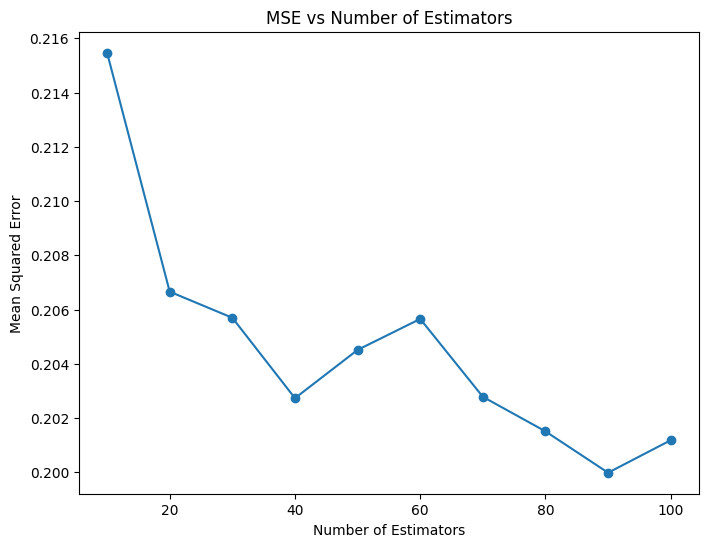

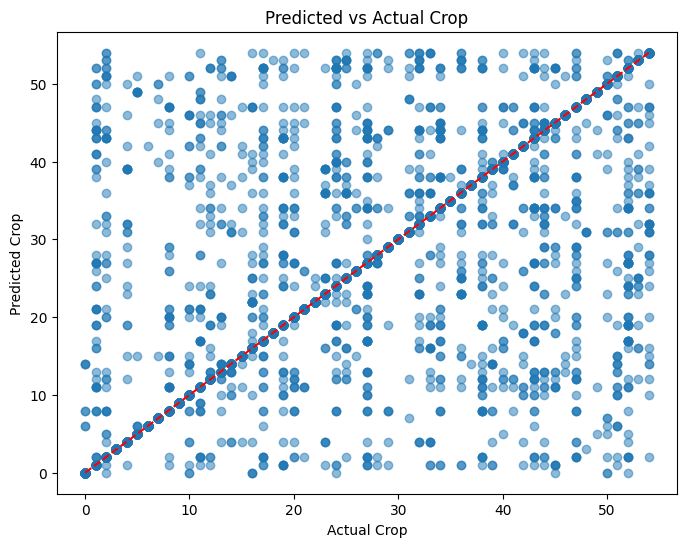

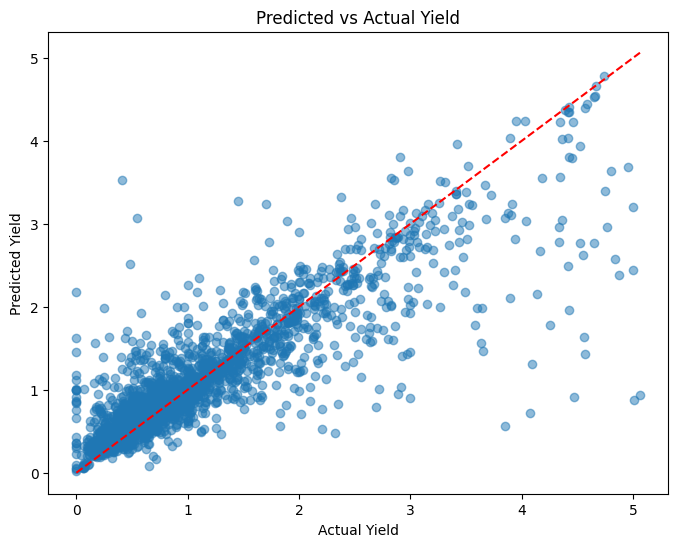


Classification Metrics:
Accuracy: 76.86480%
Precision: 0.76261
Recall: 0.76865
F1-score: 0.76421

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       125
           1       0.64      0.55      0.59       125
           2       0.65      0.64      0.65       125
           3       0.99      1.00      1.00       125
           4       0.78      0.82      0.80       125
           5       0.95      0.91      0.93       124
           6       0.92      0.99      0.95       125
           7       0.98      0.95      0.96       125
           8       0.64      0.69      0.66       125
           9       0.98      1.00      0.99       125
          10       0.81      0.77      0.79       125
          11       0.62      0.66      0.64       125
          12       0.71      0.77      0.74       124
          13       0.70      0.74      0.72       124
          14       0.79      0.85      0.82       125
          15 

C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ELWIN G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = "crop_yield2.csv"
df = pd.read_csv(file_path)

# Handle Missing Data
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Remove Outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encode Categorical Variables
label_encoders = {}
for col in ["Crop", "Season", "State"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare Data for Classification
X_class = df.drop(columns=["Crop", "Yield"])
y_class = df["Crop"]
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Prepare Data for Regression
X_reg = df.drop(columns=["Yield"])
y_reg = df["Yield"]
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Handle Class Imbalance
smote = SMOTE(random_state=42, k_neighbors=1)
X_class_resampled, y_class_resampled = smote.fit_resample(X_class_scaled, y_class)

# Split Data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_resampled, y_class_resampled, test_size=0.2, random_state=42, stratify=y_class_resampled)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Classification
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, "balanced"]
}

clf_base = RandomForestClassifier(random_state=42)
grid_search = RandomizedSearchCV(clf_base, param_grid, n_iter=15, cv=5, random_state=42, n_jobs=-1)
grid_search.fit(Xc_train, yc_train)
clf = grid_search.best_estimator_

# Train Classification Model
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

# Classification Metrics
accuracy = accuracy_score(yc_test, yc_pred)
precision = precision_score(yc_test, yc_pred, average="weighted", zero_division=1)
recall = recall_score(yc_test, yc_pred, average="weighted", zero_division=1)
f1 = f1_score(yc_test, yc_pred, average="weighted", zero_division=1)

# Train Regression Model
reg = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                            max_depth=grid_search.best_params_['max_depth'],
                            random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

# Regression Metrics
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

# Visualize Feature Distributions
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Visualize Confusion Matrix
conf_matrix = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize MSE vs Iterations
mse_values = []
for i in range(10, 110, 10):
    temp_reg = RandomForestRegressor(n_estimators=i, max_depth=20, random_state=42)
    temp_reg.fit(Xr_train, yr_train)
    temp_pred = temp_reg.predict(Xr_test)
    mse_values.append(mean_squared_error(yr_test, temp_pred))

plt.figure(figsize=(8, 6))
plt.plot(range(10, 110, 10), mse_values, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Number of Estimators")
plt.show()

# Predicted vs Actual for Crop Classification
plt.figure(figsize=(8, 6))
plt.scatter(yc_test, yc_pred, alpha=0.5)
plt.plot([min(yc_test), max(yc_test)], [min(yc_test), max(yc_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Crop")
plt.ylabel("Predicted Crop")
plt.title("Predicted vs Actual Crop")
plt.show()

# Predicted vs Actual for Yield Regression
plt.figure(figsize=(8, 6))
plt.scatter(yr_test, yr_pred, alpha=0.5)
plt.plot([min(yr_test), max(yr_test)], [min(yr_test), max(yr_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Predicted vs Actual Yield")
plt.show()

# Output Metrics
print("\nClassification Metrics:")
print(f"Accuracy: {(accuracy * 100):.5f}%")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-score: {f1:.5f}")
print("\nClassification Report:")
print(classification_report(yc_test, yc_pred))

print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Crop Recommendation and Yield Prediction Function
def recommend_crop_and_yield(season, state, area, rainfall, fertilizer, pesticide):
    season_encoded = label_encoders["Season"].transform([season])[0] if season in label_encoders["Season"].classes_ else -1
    state_encoded = label_encoders["State"].transform([state])[0] if state in label_encoders["State"].classes_ else -1

    input_class = np.array([[season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_class_scaled = scaler_class.transform(input_class)
    predicted_crop_idx = clf.predict(input_class_scaled)[0]
    predicted_crop = label_encoders["Crop"].inverse_transform([predicted_crop_idx])[0]
    
    input_reg = np.array([[predicted_crop_idx, season_encoded, state_encoded, area, rainfall, fertilizer, pesticide]])
    input_reg_scaled = scaler_reg.transform(input_reg)
    predicted_yield = reg.predict(input_reg_scaled)[0]
    
    print("\nRecommended Crop:", predicted_crop)
    print("Predicted Yield:", round(predicted_yield, 2), "kg/ha")
    print("Model Accuracy (Classification):", round(accuracy * 100, 2), "%")

# Example Usage
recommend_crop_and_yield(season="Kharif", state="Maharashtra", area=5000, rainfall=1500, fertilizer=200000, pesticide=5000)